# **BUSINESS CASE 3: Recheio Rocommendation System**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Project Overview  
This notebook utilizes the following datasets:  
- Case3_Recheio_2025 (1).xlsx <br>
- The goal of the project is to design a recomendation system so that the company can propose better products to existing costumers.

## 📊 Goal of the notebook

In this notebook we process with the EDA of the data <br>

**Table of Contents** <br>
* [1. Initial Setup and DataLoading](#setup)
* [2. Data Understanding/Preparation](#DU/P)
    * [2.1. Clients](#clients)
    * [2.2. Products](#products) 
    * [2.3. Transactions](#transactions)
    * [2.3. Cleaning Datasets](#cleaning)
    * [2.3. EDA](#eda)
* [3. Export](#export)


<hr>
<a class="anchor" id="setup">

 ## 1. Initial Setup and Data Loading
 </a>

In [1]:
#Packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

In [4]:
# Loading the data
data_clients = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='1. CLIENTS', usecols='B:D', skiprows=1)
data_products = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='2. PRODUCTS', usecols='B:D', skiprows=1)
data_transactions = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='3. TRANSACTIONS', usecols='B:D', skiprows=1)

<hr>
<a class="anchor" id="DU/P">

## 2. Data Understanding/Preparation
</a>

In [5]:
clients = data_clients.copy()
products = data_products.copy()
transactions = data_transactions.copy()

<hr>
<a class="anchor" id="clients">

### 2.1. Clients
</a>


In [6]:
clients.head()

,Client ID,ZIP Code,ID Client Type
0,210100002,4049,NaN
1,210100003,4000,NaN
2,210100004,4149,NaN
3,210100005,4100,Hotelaria
4,210100006,4405,NaN


In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Client ID       6462 non-null   int64 
 1   ZIP Code        6462 non-null   int64 
 2   ID Client Type  680 non-null    object
dtypes: int64(2), object(1)
memory usage: 151.6+ KB


In [8]:
clients.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Client ID,6462.0,NaN,NaN,NaN,210103526.874807,5023.309391,210100002.0,210101651.25,210103331.5,210104959.75,210199949.0
ZIP Code,6462.0,NaN,NaN,NaN,4176.482049,760.43223,0.0,4050.0,4400.0,4470.0,9950.0
ID Client Type,680,26,Hotelaria,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking for duplicates
print(clients.duplicated().sum())
print(clients['Client ID'].duplicated().sum())

0
0


In [10]:
# clients that don't have a ZIP code with 4 digits
clients[clients['ZIP Code'].apply(lambda x: len(str(x)) != 4)]

,Client ID,ZIP Code,ID Client Type
73,210100078,0,NaN
74,210100079,0,NaN
330,210100335,0,NaN
331,210100336,0,NaN
332,210100337,0,NaN
335,210100340,0,NaN
336,210100341,0,NaN
432,210100438,0,NaN
690,210100707,3,NaN
691,210100708,1,NaN


In [11]:
# Checking the different client types
clients['ID Client Type'].value_counts()

ID Client Type
Hotelaria                                    231
Coletiva/Instituição/Cantina                 139
Restaurante - Cozinha Portuguesa             135
Café/Pastelaria                               57
Catering                                      34
Bar/Discoteca                                 15
Restaurante - Cervejaria                      10
Restaurante - Japonês                         10
Restaurante - Churrasqueira                    8
Retail Outros                                  7
Padaria/Pastelaria                             7
Restaurante - Chinês                           4
Restaurante - Tapas & Petiscos                 4
Restaurante - Outra Cozinha Internacional      3
Restaurante - Steak House                      2
Frutaria                                       2
Restaurante - Italiano                         2
Restaurante - Marisqueira                      2
Restaurante - RodÃ­zio                         1
Mercearia                                      1
Garra

#### Insights 

- No duplicate clients

- ZIP code has some invalid numbers. In Portugal all zip codes should have 4 digits, but in some cases (38) the ZIP code is either 0, 1, or 3. None of these clients have a Client Type associated. If they have no transactions associated, they may be removed.

- ID Client has a lot of missing values (around 90%). This will need to be addressed. Additionally,  one client has the client type "Restaurante -  Rodãzio" associated. This is likely a typo, so it needs to be replaced by "Restaurante - Rodízio".

<hr>
<a class="anchor" id="products">

### 2.2. Products
</a>


In [19]:
products.head()

,ID Product,Product Description,ID Product Category
0,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


In [20]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID Product           4583 non-null   int64 
 1   Product Description  4583 non-null   object
 2   ID Product Category  4583 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.5+ KB


In [21]:
products.describe(include='object').T

,count,unique,top,freq
Product Description,4583,4573,CABO ESFREGONA VILEDA SUPER 1UN,2
ID Product Category,4583,268,VINHOS TINTOS,175


In [22]:
# Checking for duplicates
print(products.duplicated().sum())
print(products['ID Product'].duplicated().sum())

0
0


In [23]:
# Some products have the same description but different IDs
products[products['Product Description'].duplicated(keep=False)].sort_values('Product Description')

,ID Product,Product Description,ID Product Category
4018,975734,AREIAS DE MANTEIGA 300 G,BOLACHAS
3779,814295,AREIAS DE MANTEIGA 300 G,BOLACHAS
2883,946293,CABO ESFREGONA VILEDA SUPER 1UN,ACESSÓRIOS LIMPEZA GERAL
4044,969528,CABO ESFREGONA VILEDA SUPER 1UN,ACESSÓRIOS LIMPEZA GERAL
329,923162,CREME VEGETAL MCHEF KG,CREMES VEGETAIS
3590,973849,CREME VEGETAL MCHEF KG,CREMES VEGETAIS
1382,714976,DIP POT MOLHO ALHO HEINZ 100X 25GR,MOLHOS
4319,981288,DIP POT MOLHO ALHO HEINZ 100X 25GR,MOLHOS
2466,965058,"FEIJÃO PRETO CISTER BOLSA 3/1,8 KG",CONSERVAS VEGETAIS
2854,957861,"FEIJÃO PRETO CISTER BOLSA 3/1,8 KG",CONSERVAS VEGETAIS


#### Insights 

- No duplicate rows or product IDs. However, in some cases (10), different product IDs have the same Product Description and ID Product Category. These are duplicate entries, so this will need to be addressed.

In [53]:
for _,group in products.groupby('ID Product Category'):
    display(group.sort_values(by='Product Description'))

,ID Product,Product Description,ID Product Category
3029,966988,AÇÃO MASTER CHEF,0
4537,984282,AÇÃO MASTERCHEF,0
2730,971468,CAMPANHAS COMERCIAL,0
4135,969008,CAMPANHAS MARKETING,0


,ID Product,Product Description,ID Product Category
116,446689,AGRIÃO 250G 4G RCH,4A GAMA
785,500730,ALFACE ICEBERG 500G 4G RCH,4A GAMA
444,734898,ALHO SECO DESCASCADO 1KG RCH,4A GAMA
366,734897,ALHO SECO INTEIRO DESCASCAD 500GR 4G RCH,4A GAMA
1397,764559,BATATA CONS CAL 25-35 5KG VITACRESS RCH,4A GAMA
131,764560,BATATA CONS CAL 35-45 5KG VITACRESS RCH,4A GAMA
115,416242,BATATA COZER INT DESC 5KG 4G RCH,4A GAMA
2533,839702,BATATA DOCE INTEIRA 4G 3KG RCH,4A GAMA
3720,848318,BATATA DOCE PALITOS 4G 3KG RCH,4A GAMA
1400,416245,BATATA FORNO INT DESC 5KG 4G RCH,4A GAMA


,ID Product,Product Description,ID Product Category
2930,442771,ABSINTO MILBAR 70CL,ABSINTO


,ID Product,Product Description,ID Product Category
993,935622,104-CX.POOL PEQ. F&V CPP10,ACESSORIOS TRANSPORTE
596,931201,106-CX.POOL GRD. F&V CPG10,ACESSORIOS TRANSPORTE
4394,931200,154-CX.POOL PEQ. F&V CPP15,ACESSORIOS TRANSPORTE
2130,942230,186-04 CX POOL PRETA,ACESSORIOS TRANSPORTE
2750,931202,186-CX.POOL GRD. F&V CPG17,ACESSORIOS TRANSPORTE
173,911650,CUBA DAVVERO,ACESSORIOS TRANSPORTE
2785,740532,PALETE 1200X1000,ACESSORIOS TRANSPORTE
2598,740528,PALETE EUR E EPAL,ACESSORIOS TRANSPORTE
2599,740530,PALETES ESTRADOS/TARA PERDIDA,ACESSORIOS TRANSPORTE
595,701988,TABULEIRO INOX - COZINHA,ACESSORIOS TRANSPORTE


,ID Product,Product Description,ID Product Category
2142,938764,BALDE LIMPEZA AMANH RECTANG,ACESSÓRIOS LIMPEZA GERAL
2883,946293,CABO ESFREGONA VILEDA SUPER 1UN,ACESSÓRIOS LIMPEZA GERAL
2563,872136,CABO METALICO AMANH 120CM,ACESSÓRIOS LIMPEZA GERAL
3770,544229,DESENTUPIDOR C/CABO FAPIL REF10515,ACESSÓRIOS LIMPEZA GERAL
3493,908716,DOSEADOR ABS DE SAB LIQ/DESIF R:PD.AC.01,ACESSÓRIOS LIMPEZA GERAL
2239,875856,ESFREG AMANH ALGODÃO REC,ACESSÓRIOS LIMPEZA GERAL
1194,1234,ESFREGONA VILEDA SUAVE 1UN,ACESSÓRIOS LIMPEZA GERAL
2564,943387,ESPANADOR AGARRA PO AMANH +5REC,ACESSÓRIOS LIMPEZA GERAL
3349,918134,ESPANADOR PÓ SWIFFER SISTEMA+5REC,ACESSÓRIOS LIMPEZA GERAL
4028,938913,LIMPA VIDROS S/CABO AMANH,ACESSÓRIOS LIMPEZA GERAL


,ID Product,Product Description,ID Product Category
1188,948575,ACHOCOLATADO AMANHECER 400GR,ACHOCOLATADOS
1515,961627,ACHOCOLATADO NESQUIK 600G,ACHOCOLATADOS
1438,835310,CHOC QUENTE NESTLE 25X20GR,ACHOCOLATADOS


,ID Product,Product Description,ID Product Category
2665,959040,* ARROZ AGULHA INOX,ACOMPANHAMENTO
1682,924316,* ARROZ BASMATI,ACOMPANHAMENTO
2504,10007000,* ARROZ BASMATI INOX,ACOMPANHAMENTO
1655,940492,* ARROZ BRANCO INOX,ACOMPANHAMENTO
1712,10005972,* ARROZ BRANCO SI,ACOMPANHAMENTO
...,...,...,...
3971,10002561,MASSA PENNE *,ACOMPANHAMENTO
4250,10002560,MASSA TAGLIATELLI*,ACOMPANHAMENTO
4114,10005360,PENNE COM ESPINAFRES E RICOTA *,ACOMPANHAMENTO
3963,10004450,SALTEADO DE ERVILHAS COM CENOURA *,ACOMPANHAMENTO


,ID Product,Product Description,ID Product Category
3987,928312,BRANQ/REMOV NÓDOA BAIXA TEMP 20KG 101314,ADITIVOS ROUPA
4554,906853,DET BRA OXI ECOL 9038180 20KG,ADITIVOS ROUPA
3646,906858,DET PRE NOD ECOL 9085150 500ML,ADITIVOS ROUPA
3448,891329,TIRA NÓDOAS EM GEL VANISH OXIACTION 900G,ADITIVOS ROUPA
1436,950980,TIRA NÓDOAS SPRAY TOKE 200ML,ADITIVOS ROUPA


,ID Product,Product Description,ID Product Category
1901,885941,MIGAS DE BACALHAU SALGADAS BOLSAS 20KG,AFINS DE BACALHAU
23,478338,"MIGAS PALOCO 2,5 KG",AFINS DE BACALHAU


,ID Product,Product Description,ID Product Category
2241,705034,AG.ALDEIA VELHA BAGACEIRA 70CL,AGUARDENTE
1025,442372,AGUARDENTE BAGACEIRA ROCHEDO 1L,AGUARDENTE
2884,41062,AGUARDENTE BAGACEIRA SÃO DOMINGOS 1L,AGUARDENTE
421,67110,AGUARDENTE CR&F RESERVA 70CL,AGUARDENTE
3642,909306,AGUARDENTE LYSHOLM LINIE AQUAVIT LT,AGUARDENTE
3097,730649,AGUARDENTE MEDRONHO CASTELO SILVES 70CL,AGUARDENTE
3251,642324,AGUARDENTE NARDELLI GRAPPA 70CL,AGUARDENTE
4494,810781,AGUARDENTE VELHA ADEGA VELHA XO 12A 50CL,AGUARDENTE
2595,67104,AGUARDENTE VELHA ALIANÇA 70CL,AGUARDENTE
3446,876379,AGUARDENTE VELHA ALIANÇA XO 10 ANOS 50CL,AGUARDENTE


,ID Product,Product Description,ID Product Category
2431,514920,ALHEIRA COM CAÇA EUROFUMEIRO KG,ALHEIRAS
93,514921,ALHEIRA DETINHA EUROFUMEIRO KG,ALHEIRAS
973,529344,ALHEIRA MCHEF KG,ALHEIRAS
1762,605505,ALHEIRA VEGETARIANA EUROFUMEIRO 200G,ALHEIRAS


,ID Product,Product Description,ID Product Category
332,625743,CERELAC MULTIFRUTOS SEM GLÚTEN 250G,ALIMENTOS INFANTIS
2470,625990,CERELAC NÃO LÁCTEA ARROZ SEM GLÚTEN 250G,ALIMENTOS INFANTIS
334,913636,FAR LÁCT BLEDINA FRUTOS VARIADOS 200G,ALIMENTOS INFANTIS
335,913637,FAR LÁCT BLEDINA BOLACHA 200G,ALIMENTOS INFANTIS
2523,913250,FAR NLÁCT BLEDINA 7 CEREAIS 200G,ALIMENTOS INFANTIS
2895,913472,FAR NLÁCT BLEDINA S/GLUTEN PAP ARROZ200G,ALIMENTOS INFANTIS
3683,971707,FARINHA BLÉDINA FRUTOS VARIADOS 200G,ALIMENTOS INFANTIS
574,626048,FARINHA LÁCTEA AMANHECER 1 KG,ALIMENTOS INFANTIS
1246,949753,FARINHA LÁCTEA CERELAC -40% AÇÚCAR 900G,ALIMENTOS INFANTIS
1311,949743,FARINHA LÁCTEA CERELAC 900G,ALIMENTOS INFANTIS


,ID Product,Product Description,ID Product Category
4443,906849,AMA LIQ AZUL ECOL 9040760 20KG,AMACIADORES ROUPA
1375,921358,AMAC MCHEF CLASSIC 10LT,AMACIADORES ROUPA
4444,906873,DET CONDIC ECOL 9040680 20KG,AMACIADORES ROUPA


,ID Product,Product Description,ID Product Category
2976,107773,APERIT PERNOD 70 CL,APERITIVOS
1896,711233,APERITIVO APEROL 70CL,APERITIVOS
282,829719,APERITIVO MARTINI BIANCO 1LT,APERITIVOS
4386,888565,APERITIVO MARTINI FIERO 75CL,APERITIVOS
3708,973120,"APERITIVO MARTINI ROSSO 50X5,5 CL",APERITIVOS
2761,66916,CAMPARI 70CL,APERITIVOS
2970,66715,MARTINI EXTRA DRY 1LT,APERITIVOS
430,829720,MARTINI ROSSO 1LT,APERITIVOS
2018,100417,MARTINI ROSSO 50X6 CL,APERITIVOS
2091,66930,RICARD 70CL,APERITIVOS


,ID Product,Product Description,ID Product Category
3351,453547,APERITIVOS KRIT KRITITAS CUETARA 350G,APERITIVOS E BATATA FRITA
3749,641174,APERITIVOS STICKS & BREZEL 300GR,APERITIVOS E BATATA FRITA
612,855957,BAT DOCE FRITA AMANH 150GR,APERITIVOS E BATATA FRITA
1061,58645,BAT FRIT S. DOURADAS ONDULADAS SAL 150GR,APERITIVOS E BATATA FRITA
1020,58646,BAT FRITA SUPERDOURADAS LISAS 150G,APERITIVOS E BATATA FRITA
1021,734456,BAT FRITA SUPERDOURADAS PRESUNTO 150G,APERITIVOS E BATATA FRITA
2287,772407,BAT.FRIT S.DOUR CAMPONESA 40G,APERITIVOS E BATATA FRITA
2289,856973,BAT.FRIT S.DOUR.OND CHOURIÇO 40GR,APERITIVOS E BATATA FRITA
2145,772748,BAT.FRIT SUPER DOUR KETCHUP 150G,APERITIVOS E BATATA FRITA
2039,772801,BAT.FRIT. S.DOUR.PRES 40G CX,APERITIVOS E BATATA FRITA


,ID Product,Product Description,ID Product Category
921,672543,ARROZ AGULHA EUROPA AMANHECER 1 KG,ARROZ
72,521205,ARROZ AGULHA MASTERCHEF 1 KG,ARROZ
297,53425,ARROZ AGULHA MASTERCHEF 5 KG,ARROZ
216,808434,"ARROZ ARBÓRIO CAÇAROLA 2,5 KG",ARROZ
2079,727583,ARROZ ATLANTIC SUSHI 5 KG,ARROZ
228,847619,ARROZ BASMATI ATLANTIC 5KG,ARROZ
119,508875,"ARROZ BASMATI CACAROLA 2,5KG",ARROZ
457,521204,ARROZ BASMATI MASTERCHEF 1 KG,ARROZ
1640,850533,ARROZ BASMATI MASTERCHEF 5KG,ARROZ
3535,443505,ARROZ BOM SUCESSO CAROLINO 1 KG,ARROZ


,ID Product,Product Description,ID Product Category
4418,107462,AC REF 390 VELAS ANIVERSARIO,ARTIGOS DE FESTA
4523,756125,FOGUETES LUMNOSOS 47,ARTIGOS DE FESTA
1653,742611,VELAS ANIV HOME7 LISA AZUL 24UN,ARTIGOS DE FESTA
1654,742612,VELAS ANIV HOME7 LISA ROSA 24UN,ARTIGOS DE FESTA


,ID Product,Product Description,ID Product Category
2272,9999902,DESC. COMERCIAL,ARTIGOS DESCONTO
478,910728,DESC.COMERCIAL INCREMENTO,ARTIGOS DESCONTO
2433,925538,DESCONTO COMERCIAL-CAMPANHA HORECA,ARTIGOS DESCONTO
3326,9999107,RAPPEL ANUAL,ARTIGOS DESCONTO
2459,9999117,RAPPEL TRIMESTRAL,ARTIGOS DESCONTO


,ID Product,Product Description,ID Product Category
383,566882,AGUA BI-DESMINERALIZADA 5LT HOME 7,AUTOMÓVEL


,ID Product,Product Description,ID Product Category
1236,539715,COELHO CONGELADO RCH CC,AVES / CAÇA / COELHO
2377,957543,FOIE GRAS PATO EXTRA SARRADE CG 500/650G,AVES / CAÇA / COELHO
3584,906285,FOIE GRAS PATO SARRADE CONG 600/700G,AVES / CAÇA / COELHO
3583,973289,"FRANGO ASAS QUALIKO IQF CG 2,5KG",AVES / CAÇA / COELHO
3625,973314,"FRANGO COTO + 80 GR QUALIKO IQF CG 2,5KG",AVES / CAÇA / COELHO
1730,953433,FRANGO COXA C/PELE S/OSSO MARINADA CG KG,AVES / CAÇA / COELHO
1672,953434,FRANGO COXA C/PELE S/OSSO PANADA CG KG,AVES / CAÇA / COELHO
3526,973315,"FRANGO COXA QUALIKO IQF CG 2,5KG",AVES / CAÇA / COELHO
3580,973316,"FRANGO INTEIRO QUALIKO IVP CG 0,8KG",AVES / CAÇA / COELHO
3682,973318,"FRANGO INTEIRO QUALIKO IVP CG 1,2KG",AVES / CAÇA / COELHO


,ID Product,Product Description,ID Product Category
1530,769116,COELHO RCH C03,AVES / COELHO
3193,731820,FRANGO 0.8/0.9 CHURRASCO INT GRANEL C03,AVES / COELHO
1944,721341,"FRANGO 1.2-1,3 AVULSO S/M CX 12 UNID",AVES / COELHO
1845,939017,FRANGO ASAS CVT KG,AVES / COELHO
916,939016,FRANGO BIFE CVT KG,AVES / COELHO
4165,648075,FRANGO CAMPESTRE CAMPONÊS GRANEL C03,AVES / COELHO
1529,718991,FRANGO DO CAMPO KG,AVES / COELHO
3320,718986,FRANGO FIGADOS GRANEL CX 3 KG,AVES / COELHO
534,752197,FRANGO PEITO VACUO RCH CPP15,AVES / COELHO
1923,752196,FRANGO PERNA VACUO RCH CPP15,AVES / COELHO


,ID Product,Product Description,ID Product Category
2260,859288,"AZEITE BEIRÃO AZEITE 0,75L",AZEITES
643,912853,AZEITE EX VIRG TRUFA BCO BEST LOVED 250,AZEITES
1254,912854,AZEITE EX VIRG TRUFA NGO BEST LOVED 250,AZEITES
241,821151,AZEITE FIO DOURADO 1L,AZEITES
185,842630,AZEITE FIO DOURADO 5LT,AZEITES
4158,952907,AZEITE FLOR DO CÔA 500 ML,AZEITES
3412,707792,AZEITE GALLO LT,AZEITES
1096,710284,AZEITE GALLO SUBTIL POUPANÇA 3L,AZEITES
323,506776,"AZEITE GALLO VE 0,25L",AZEITES
3177,762585,AZEITE GALLO VE C.MAD.500ML,AZEITES


,ID Product,Product Description,ID Product Category
1038,882849,ACUCAR AMANH AMAR 1KG,AÇÚCAR
52,879894,ACUCAR AMANH BCO PAP KG,AÇÚCAR
651,905342,ACUCAR AMANH BCO PLA KG,AÇÚCAR
3183,891797,ACUCAR AMANH STICKS 250X4GR,AÇÚCAR
1749,959253,ACUCAR BRANCO MCHEF SID 2KG,AÇÚCAR
529,461321,ACUCAR BRANCO RAR 25KG,AÇÚCAR
4548,985776,ACUCAR JERONYMO TRICOLOR STICK CX800UN,AÇÚCAR
1280,933650,ACUCAR MASCAVADO AMANHECER 1KG,AÇÚCAR
1286,812198,ACUCAR MCHEF BRANCO SC 25KG,AÇÚCAR
1248,721171,ACUCAR RAR ICING SUGAR 10 KG,AÇÚCAR


,ID Product,Product Description,ID Product Category
3619,974767,BAC LOMBO P SAL BRASMAR 200/300G CG KG,BACALHAU
1523,866283,BAC POSTA TRAD 300/400 AMARRAS 6KG CONG,BACALHAU
3767,874438,BAC POSTAS LONGAS MASTERCHEF CG 3KG,BACALHAU
4493,985452,BACALHAU DEM DESFIADO AMARRAS 6KG CONG,BACALHAU
4533,985463,BACALHAU DEM INTEIRO EM POSTA AMARRAS 6K,BACALHAU
4571,985458,BACALHAU DEM LOMBO 200/300g AMARRAS 7KG,BACALHAU
4570,985459,BACALHAU DEM LOMBO 300/400g AMARRAS 7 KG,BACALHAU
4546,985461,BACALHAU DEM LOMBO EXTRA 400/600G SE10K,BACALHAU
2437,966936,BACALHAU DEM POSTA 600/800g AV CG 10KG,BACALHAU
2392,966937,BACALHAU DEM POSTA 800/1000g AV CG 10KG,BACALHAU


,ID Product,Product Description,ID Product Category
4318,377693,BAC CORRENTE NOR MCHEF 15 RCH,BACALHAU INTEIRO
3471,377769,BAC CRESC NOR MCHEF EMB,BACALHAU INTEIRO
2819,896927,BAC CRESCIDO CONSTANTINOS BOAS PESCAS KG,BACALHAU INTEIRO
4519,377714,BAC CRESCIDO NOR MCHEF 15 RCH,BACALHAU INTEIRO
2743,377816,BAC ESPECIAL + (5) NOR MCHEF RCH,BACALHAU INTEIRO
1591,377811,BAC GRA NOR MCHEF EMB RCH,BACALHAU INTEIRO
806,377812,BAC GRAUDO NOR MCHEF 15 RCH,BACALHAU INTEIRO


,ID Product,Product Description,ID Product Category
1011,923515,BACON METADES CASA PORTUGUESA KG,BACON
1373,927139,BACON CAETANOS CUBOS 500GR,BACON
4569,904804,BACON CUBOS PORMINHO 500GR,BACON
4088,840472,BACON DE PERÚ PRIMOR KG,BACON
54,901555,BACON EXTRA METADES MASTERCHEF KG,BACON
4368,772124,BACON FAT PORMINHO 500GR,BACON
4288,876280,BACON FATIADO ALMIREZ 2*500GR,BACON
772,954063,BACON FATIADO CASA PORTUGUESA 750G,BACON
537,841355,BACON FATIADO MASTERCHEF 750GR,BACON
4374,931923,BACON HORECA METADES PORMINHO KG,BACON


,ID Product,Product Description,ID Product Category
3632,963024,BAGUETE FRANCESA 200 G (CP),BAGUETE
2300,945054,PÃO BAGUETTINE B&B CONG 35X139GR,BAGUETE


,ID Product,Product Description,ID Product Category
14,721718,"BANHA MCHEF BALDE 4,75KG",BANHA


,ID Product,Product Description,ID Product Category
4275,938399,"BAT PALITO DIPSTER SKIN ON LUTOSA 2,5K",BATATA
2229,408331,"BAT PALITO OND CRINKLE CUT LUTOS CG 2,5K",BATATA
22,103212,"BAT. PAL. 10/10 MCHEF CONG 2,5KG",BATATA
2233,888221,"BAT. PAL. 7/7 ECOFROST CONG 2,5KG",BATATA
416,500078,"BAT. PAL. 7/7 MCHEF CONG 2,5KG",BATATA
2383,888222,"BAT. PAL. 9/9 ECOFROST CONG 2,5KG",BATATA
414,350286,"BAT.RODELAS MCHEF CONG.2,5KG",BATATA
2336,889989,"BATATA CUBOS 12/12 ECOFROST 2,5KG",BATATA
25,499923,"BATATA CUBOS 12/12 PRE-FRITA MCHEF 2,5KG",BATATA
1042,499924,"BATATA CUBOS 20/20 PRE-FRITA MCHEF 2,5KG",BATATA


,ID Product,Product Description,ID Product Category
1156,866220,BEB AMANH AMENDOA LT,BEBIDA VEGETAL
3647,850895,BEB SOJA AMANH LIGHT 1L,BEBIDA VEGETAL
181,758090,BEB.AMANHECER SOJA NATURAL 1LT,BEBIDA VEGETAL
4032,977395,BEBIDA AMANHECER SOJA NATURAL 1LT,BEBIDA VEGETAL
996,960227,BEBIDA DE AMÊNDOA ALPRO 1L,BEBIDA VEGETAL
3728,967610,BEBIDA DE AMÊNDOA ALPRO SEM AÇÚCAR 1L,BEBIDA VEGETAL
2588,847501,BEBIDA DE ARROZ E COCO ALPRO 1L,BEBIDA VEGETAL
2020,755549,BEBIDA DE ARROZ ORIGINAL ALPRO 1L,BEBIDA VEGETAL
1093,755550,BEBIDA DE AVEIA ALPRO 1L,BEBIDA VEGETAL
4070,968484,BEBIDA DE AVEIA ALPRO BARISTA 1L,BEBIDA VEGETAL


,ID Product,Product Description,ID Product Category
1074,628850,AMEIJOA C/CASCA MCHEF CONG 2KG,BIVALVES
1522,582240,MEXILHÃO MEIA CONCHA UN 800GR CX CONG,BIVALVES
2327,839708,MIOLO AMEIJOA AMANHECER 250GR,BIVALVES
2641,817666,MIOLO DE VIEIRA 900G CONG,BIVALVES
1075,764475,MIOLO MEXILHÃO 800G MCHEF,BIVALVES


,ID Product,Product Description,ID Product Category
3779,814295,AREIAS DE MANTEIGA 300 G,BOLACHAS
1045,13964,BISC CUETARA ROLITOS 225G,BOLACHAS
3700,971686,BOL AGUA SAL INTEGRAL DOSES VIEIRA 102G,BOLACHAS
2193,775868,BOL AMANH BIG COOKIES 225G,BOLACHAS
4381,834527,BOL AMANH MARIA DOURADA 4X200G,BOLACHAS
168,844304,BOL AMANH MARIA SAQ 25GR,BOLACHAS
3475,14156,BOL CRACKER CARR'S TABLE WATER 125G,BOLACHAS
3215,658373,BOL CRACKER JACOBS CREAM CRACKER 200G,BOLACHAS
3046,18883,BOL CRACKER LU TUC ORIGIN 100G,BOLACHAS
1910,908804,BOL DIGESTIVA AMANHECER AVEIA 425G,BOLACHAS


,ID Product,Product Description,ID Product Category
3565,107972,BISC.ALVORADA ARGOLA 500G,BOLOS E BISCOITOS
3478,107970,BISC.ALVORADA LARANJA 500,BOLOS E BISCOITOS
3071,851605,BISCOITO AMANHECER TRA INT SOJA LIM 250G,BOLOS E BISCOITOS
3309,851604,BISCOITO AMANHECER TRAD INT CANELA 250G,BOLOS E BISCOITOS
4045,834068,BISCOITOS BIO LIMÃO CHIA SEARA 220G,BOLOS E BISCOITOS
4350,640356,BISCOITOS DE ALFARROBA SEARA BIO 220G,BOLOS E BISCOITOS
1262,944222,MADALENAS AURORA LARANJA 420GR,BOLOS E BISCOITOS
3623,912859,MADALENAS AURORA MIX CHOC LARANJA 250G,BOLOS E BISCOITOS
2331,752527,MUFFIN CHOC CÉLIANE S/GLUTEN 210G,BOLOS E BISCOITOS
2333,964443,MUFFIN CÉLIANE FRAMBOESA SEM GLUTÉN 200G,BOLOS E BISCOITOS


,ID Product,Product Description,ID Product Category
3262,486561,"BOLO CHOCOLATE MCHEF 1,2 KG",BOLOS E SOBREMESAS FAMILIAR
4482,985447,"BOLO DE AMÊNDOA E COCO CG 1,4KG",BOLOS E SOBREMESAS FAMILIAR
4544,985451,"BOLO DE BOLACHA REDONDO CG 1,2KG",BOLOS E SOBREMESAS FAMILIAR
2090,916883,"BOLO TIRAMISU MASTERCHEF 1,1KG",BOLOS E SOBREMESAS FAMILIAR
1728,883599,"CHEESECAKE FRUT SILVESTRES CG 1,2KG",BOLOS E SOBREMESAS FAMILIAR
1911,438752,"MOUSSE CHOCOLATE MASTERCHEF BALDE 1,5 KG",BOLOS E SOBREMESAS FAMILIAR
2208,726700,"SOB. TRANCHE BOLACHA 1,5KG",BOLOS E SOBREMESAS FAMILIAR
4483,985450,SONHOS CG 24X60GR,BOLOS E SOBREMESAS FAMILIAR
3313,956842,"TARTE CARAMELO E AMENDOIM ALMONDY 1,2KG",BOLOS E SOBREMESAS FAMILIAR
615,864271,"TARTE DE MACA FATIADA CG 1,800KG",BOLOS E SOBREMESAS FAMILIAR


,ID Product,Product Description,ID Product Category
3068,829728,CREPES AMANHECER PASTEL NATA 6*90GR,BOLOS E SOBREMESAS INDIVIDUAIS
3485,802165,CREPES NEUTROS MASTERCHEF 6X60GR,BOLOS E SOBREMESAS INDIVIDUAIS
4277,982269,CROISSANT BRIOCHE INVICTA CG 90GR,BOLOS E SOBREMESAS INDIVIDUAIS
1685,490585,CROISSANT CHOCOLATE 105G (CP),BOLOS E SOBREMESAS INDIVIDUAIS
611,850347,CROISSANT SEMENTES 80 G (CP),BOLOS E SOBREMESAS INDIVIDUAIS
2726,472726,DAWNUT CHOCOLATE (CP),BOLOS E SOBREMESAS INDIVIDUAIS
2037,440729,DAWNUT'S AÇUCARADO (CP),BOLOS E SOBREMESAS INDIVIDUAIS
4339,983322,JESUÍTA DE AMÊNDOA CRU CG 100GR,BOLOS E SOBREMESAS INDIVIDUAIS
2164,832295,MERENDA CHOCOLATE (CP),BOLOS E SOBREMESAS INDIVIDUAIS
864,289959,MERENDA MISTA 95 G (CP),BOLOS E SOBREMESAS INDIVIDUAIS


,ID Product,Product Description,ID Product Category
2512,963513,BOV ACEM RED 1.5+ B ANGUS UR D. FIÚZA CG,BOVINO
3582,963452,BOV ACEM RED 2+ B ANGUS UR D.FIUZA CG K,BOVINO
3114,948375,BOV BIFE PÁ ANGUS BESTFARMER CONG KG CC,BOVINO
2801,965108,BOV BIFE RED 170GR ANGUS BESTFAR CG KG,BOVINO
3105,922419,BOV BIFE VAZIA MATURADO BC CONG KG,BOVINO
...,...,...,...
1927,922387,VITELÃO CORAÇAO DE ALCATRA BC KG,BOVINO
3292,922396,VITELÃO COSTELETA BC CONG KG,BOVINO
2284,922388,VITELÃO POJADOURO BC KG,BOVINO
84,806114,VITELÃO PÁ EKRO CC,BOVINO


,ID Product,Product Description,ID Product Category
15,724038,BEB ESPIRITUOSA 1920 1LT,BRANDY
279,492173,BEB ESPIRITUOSA MACIEIRA 1LT,BRANDY
3472,271411,BEBIDA ESPIRITUOSA CONSTANTINO 1 LT,BRANDY
1332,906442,BEBIDA ESPIRITUOSA D.RAMIRES 1LT,BRANDY
4098,975349,BRANDY ASBACH URBRAND 3 YEARS 40% 70 CL,BRANDY
1340,289343,BRANDY CROFT 1 LT,BRANDY
4205,975350,BRANDY NAPOLEON VSOP LT,BRANDY
1742,850848,BRANDY ROCHEDO LT,BRANDY


,ID Product,Product Description,ID Product Category
4511,983278,CABAZ ENCANTO,CABAZES
4526,965932,CABAZ ALEGRIA 99.95,CABAZES
4522,965568,CABAZ ESPERANÇA 39.95,CABAZES
4512,983279,CABAZ ESTRELA,CABAZES
4529,983276,CABAZ FAMILIA,CABAZES
4528,965564,CABAZ FELICIDADE 75.95,CABAZES
4527,981777,CABAZ HARMONIA 89.95,CABAZES
3295,965930,CABAZ MAGIA 19.95,CABAZES
3294,965931,CABAZ TRADIÇÃO 29.95,CABAZES


,ID Product,Product Description,ID Product Category
2810,710950,CACHACA MILBAR LT,CACHAÇA
1039,28017,CACHAÇA PIRASSUNUNGA 51 70CL,CACHAÇA


,ID Product,Product Description,ID Product Category
3460,969197,CAFE DELTA DESCAFEINADO 500GR,CAFÉS E MISTURAS
401,901444,"CAFE DESCAFEINADO GOURMES 100X6,5GR",CAFÉS E MISTURAS
400,863057,CAFE GOURMES GRÃO KG,CAFÉS E MISTURAS
4340,901161,CAFE JERONYMO BIO GRAO 250G,CAFÉS E MISTURAS
4390,974871,CAFE JERONYMO BIO MOAGEM UNIVERSAL 250G,CAFÉS E MISTURAS
2207,708429,CAFE LOTE HOTEL NESTLE 300GR,CAFÉS E MISTURAS
1979,56746,CAFÉ EM GRÃO CLÁSSICO SICAL 1KG,CAFÉS E MISTURAS
73,605418,CAFÉ EM GRÃO LOTE CHÁVENA DELTA 1KG,CAFÉS E MISTURAS
3293,104362,CAFÉ EM GRÃO LOTE SUPERIOR DELTA 1KG,CAFÉS E MISTURAS
4335,490728,CAFÉ JERONYMO 6 KG,CAFÉS E MISTURAS


,ID Product,Product Description,ID Product Category
3881,490583,CAMARAO 100/120 MOCAM MCHEF 2KG,CAMARÃO
2423,727634,CAMARAO 120/150 MOC.MCHEF CX2K,CAMARÃO
1541,889037,CAMARAO 20/30 VANNAMEI AQUAC CONG 2KG,CAMARÃO
1524,889038,CAMARAO 30/40 VANNAMEI AQUAC CONG 2KG,CAMARÃO
2097,889039,CAMARAO 40/50 VANNAMEI AQUAC CONG 2KG,CAMARÃO
2306,489966,CAMARAO 40/60 MOCAM MCHEF 2KG,CAMARÃO
2747,490580,CAMARAO 80/100 MOCAM MCHEF 2KG,CAMARÃO
2420,956878,CAMARAO SUSHI EBI 3L 50 pca 280 GR,CAMARÃO
493,861977,CAMARAO TIGRE 8/12 CONG S/CAB 10KG,CAMARÃO
3368,959065,CAMARAO TIGRE INDIA 2/4 CONG 2 KG,CAMARÃO


,ID Product,Product Description,ID Product Category
1786,722608,COLA LIVE AMANHECER 2LT,CARBONATADOS
2733,705155,GINGER ALE SCHWEPPES 1L,CARBONATADOS
433,945500,GINGER ALE SCHWEPPES TP 20CL,CARBONATADOS
2948,914813,GINGER BEER SCHWEPPES TP 20CL,CARBONATADOS
96,590007,"REF 7UP ORIGINAL 1,5LT",CARBONATADOS
2419,876402,"REF AMANHECER C/G ANANAS PET 1,5L",CARBONATADOS
1627,848610,REF C/G CHISPA LIMA LIMAO PET 2L,CARBONATADOS
3877,55268,REF CHAMPOMY MAÇÃ 75CL,CARBONATADOS
775,711248,REF.CHISPA GASOSA 2LT,CARBONATADOS
923,722609,REF.LIVE AMANHECER LIMA LIMAO 2LT,CARBONATADOS


,ID Product,Product Description,ID Product Category
4551,906818,DET DESINF WC ECOL 9051700 2L,CASA DE BANHO
4068,906819,DET WC CALCARI ECOL 9091780 2L,CASA DE BANHO
4552,906820,DET WC VISCOS ECOL 9091880 2L,CASA DE BANHO


,ID Product,Product Description,ID Product Category
1517,849078,ACENDALHA AMANHECER BCO 32 CUBOS,CASA E JARDIM
3393,873478,CARVAO CHURRASQUEIRA MCHEF 15K,CASA E JARDIM
3392,716063,FIO MASCOTE NR. 2 / 3 NORMAL,CASA E JARDIM
671,862257,FOSFOROS COZINHA HOME 7 HH100 PACK 4,CASA E JARDIM
1047,725336,GEL DE COMBUSTAO MCHEF 4 KG 5LT,CASA E JARDIM


,ID Product,Product Description,ID Product Category
2958,952096,ALECRIM DAREGAL CONG 250g,CEBOLA / ALHO E ERVAS AROMÁTICAS
2957,952095,TOMILHO DAREGAL CONG 250g,CEBOLA / ALHO E ERVAS AROMÁTICAS


,ID Product,Product Description,ID Product Category
4567,983522,CHOCO C/TINTA 100/200 MARFRESCO CG 1KG,CEFALÓPODES
1078,870720,CHOCO LIMPO AMARRAS U1 KG,CEFALÓPODES
2925,504879,LULA INTEIRA CG SACO 1KG,CEFALÓPODES
1282,841915,LULA LIMPA INDIA 10/20 MARFRESCO 800GR,CEFALÓPODES
689,945246,LULA PEQUENA INTEIRA MARIBERICA CG 900GR,CEFALÓPODES
2650,744835,LULA RECHEADA CONGELADA 7KG,CEFALÓPODES
4514,985150,POLVO AMARRAS 3000/4000 CG KG,CEFALÓPODES
2963,494399,POLVO CONGELADO MASTERCHEF 1000/2000,CEFALÓPODES
531,494401,POLVO CONGELADO MASTERCHEF 2000/3000,CEFALÓPODES
560,494402,POLVO CONGELADO MASTERCHEF 3000/4000,CEFALÓPODES


,ID Product,Product Description,ID Product Category
1554,908297,BARRA BE KIND AMENDOAS CARAMELO SALG 40G,CEREAIS
1555,908319,BARRA BE KIND CHOCOLATE E SAL 40G,CEREAIS
3782,941289,BARRAS MIX AMANH FRUTOS SECOS 30GR,CEREAIS
2355,770155,CER CORN FLAKES S/ GLUTEN NESTLÉ 375 GR,CEREAIS
2411,862963,CER CRI RICE KRISPIES KEL 340G,CEREAIS
1066,859723,CER MCHEF CRUN.MUESLI BOLSA 1K,CEREAIS
2842,767011,CER.AMC CORN FLAKES 500GR,CEREAIS
2497,925288,CERAIS ALPEN ORIGINAL 550GR,CEREAIS
2294,926044,"CEREAIS ALPEN ORIGINAL 1,1KG",CEREAIS
3637,903109,"CEREAIS ALPEN S/ADIÇÃO AÇUCAR 1,1KG",CEREAIS


,ID Product,Product Description,ID Product Category
2262,861091,CERV C/ALC SUPER BOCK CORUJA LAGER 33CL,CERVEJAS ARTESANAIS / ESPECIAIS
4208,976168,CERVEJA NORTADA LAGER 33CL,CERVEJAS ARTESANAIS / ESPECIAIS
2876,852730,CERVEJA SUPER BOCK 1927 WEISS 33CL,CERVEJAS ARTESANAIS / ESPECIAIS
3692,861092,CERVEJA SUPER BOCK CORUJA IPA 33CL,CERVEJAS ARTESANAIS / ESPECIAIS


,ID Product,Product Description,ID Product Category
3555,834685,CERV C/ALC SAGRES BOHEMIA BOCK 33CL,CERVEJAS BRANCAS
1871,865909,CERV C/ALC SUPER BOCK 6X20CL,CERVEJAS BRANCAS
1577,747770,CERV C/ALC SUPER BOCL 33CL,CERVEJAS BRANCAS
2061,880531,"CERVEJA 0,0% ÁLCOOL SAGRES 33CL",CERVEJAS BRANCAS
2486,840453,"CERVEJA 0,0% ÁLCOOL SUPER BOCK 20CL",CERVEJAS BRANCAS
455,484903,CERVEJA CERGAL 1L,CERVEJAS BRANCAS
1661,716132,CERVEJA COM ALCOOL SAGRES TP 33 CL (Cx),CERVEJAS BRANCAS
3638,683249,CERVEJA CRISTAL 33CL,CERVEJAS BRANCAS
2752,943786,CERVEJA SAGRES 25CL,CERVEJAS BRANCAS
2596,820986,CERVEJA SAGRES BOHEMIA 33CL,CERVEJAS BRANCAS


,ID Product,Product Description,ID Product Category
33,269462,CERV C/ALC BUDWEISER 33CL,CERVEJAS INTERNACIONAIS
2802,925536,CERV C/ALC GUINNESS 33CL,CERVEJAS INTERNACIONAIS
2877,880533,"CERVEJA 0,0% ÁLCOOL HEINEKEN 25CL",CERVEJAS INTERNACIONAIS
3785,57889,CERVEJA CARLSBERG 25CL,CERVEJAS INTERNACIONAIS
1999,279002,"CERVEJA CORONA EXTRA 35,5CL",CERVEJAS INTERNACIONAIS
3244,291139,CERVEJA ERDINGER DUNKEL 50CL,CERVEJAS INTERNACIONAIS
2477,536982,CERVEJA ERDINGER WEISSBIER 50CL,CERVEJAS INTERNACIONAIS
1949,754981,CERVEJA HEINEKEN TP 24X33CL,CERVEJAS INTERNACIONAIS
3360,801379,CERVEJA SAN MIGUEL 25CL,CERVEJAS INTERNACIONAIS


,ID Product,Product Description,ID Product Category
1785,273155,CERV C/ALC SAGRES PRETA TP 33CL,CERVEJAS PRETAS
1028,546140,CERVEJA SEM ÁLCOOL SUPER BOCK PRETA 33CL,CERVEJAS PRETAS
2261,831210,CERVEJA SUPER BOCK STOUT 20CL,CERVEJAS PRETAS
1024,404625,CERVEJA SUPER BOCK STOUT 33CL,CERVEJAS PRETAS


,ID Product,Product Description,ID Product Category
2684,731130,CERVEJA SAGRES RADLER 33CL,CERVEJAS SABORES


,ID Product,Product Description,ID Product Category
569,925609,"MOLHO QUEIJO CHEDDAR JM BALDE 2,2KG",CHEDDAR
1975,940539,QUEIJO CHEDDAR BARRA KERRYGOLD KG,CHEDDAR
431,842060,QUEIJO CHEDDAR FATIAS 1KG DV,CHEDDAR
1835,903512,QUEIJO CHEDDAR FIOS ARLA PRO 2KG,CHEDDAR
2940,869698,QUEIJO MCHEF CHEDDAR BARRA KG,CHEDDAR


,ID Product,Product Description,ID Product Category
1091,751903,BOMB.CHOC.PTO C/REC.FRU/CAF.2K,CHOCOLATE
3843,964716,BOMBONS LINDT MINI PRALINÉS 100G,CHOCOLATE
3689,850039,CHOC AMANH L.AMEND S/ACU 100GR,CHOCOLATE
2386,850034,CHOC AMANH PRETO S/ACU 100GR,CHOCOLATE
2399,896209,CHOC BB BULK ORIGINAL BACI KG,CHOCOLATE
3171,819382,CHOC CARRE CARAIBE 66% VRHONA 200UN,CHOCOLATE
3209,819381,CHOC CARRE GUANAJ 70%VRHONA 200UN,CHOCOLATE
3235,819370,CHOC CARRE JIVARA VRHONA 40% 200UN,CHOCOLATE
3207,819361,CHOC CARRE MANJAR VAL.64%VRHONA 200UN,CHOCOLATE
3210,819383,CHOC ECLAT LACTE VRHONA 244UN,CHOCOLATE


,ID Product,Product Description,ID Product Category
197,517213,CHOURICO CARNE CORRENTE MASTERCHEF,CHOURIÇOS
1861,958983,CHOURICO CARNE CORRENTE SERVIPAL KG,CHOURIÇOS
2400,543449,"CHOURICO FATIADO MASTERCHEF 0,750 Kg",CHOURIÇOS
1035,808337,CHOURICO MCHEF VINHO KG,CHOURIÇOS
3663,622302,CHOURICO SEIA MCHEF 840GR,CHOURIÇOS
4563,839318,CHOURIÇO CORRENTE CASA PORTUGUESA 200GR,CHOURIÇOS
1212,942393,CHOURIÇO DE CARNE EXTRA QUINT ALDEIA KG,CHOURIÇOS
2115,958982,CHOURIÇO DE CARNE QUINT ALDEIA KG,CHOURIÇOS
1221,942309,CHOURIÇO MOURO QUINTINHA DA ALDEIA KG,CHOURIÇOS
2712,926759,CHOURIÇO PORCO PRETO MASTERCHEF 1KG,CHOURIÇOS


,ID Product,Product Description,ID Product Category
538,842616,CHOURICAO FATIADO MASTERCHEF 750GR,CHOURIÇÃO
1122,545918,CHOURICAO MASTERCHEF KG,CHOURIÇÃO
4399,826125,CHOURIÇÃO FAT PORMINHO 500GR,CHOURIÇÃO
4461,980943,"CHOURIÇÃO SANDWICH PORMINHO FT 1,2KG",CHOURIÇÃO
3731,104921,SALSICHAO MONTANHES EL POZO KG,CHOURIÇÃO


,ID Product,Product Description,ID Product Category
4396,976292,CHA CAMOMILE RONNEFELDT 25 UN,CHÁS E INFUSÕES
3464,842038,CHA CUP GREEN DRAGON RONNEFELDT 15UN,CHÁS E INFUSÕES
3361,842044,CHA CUP REFRESH MINT RONNEFELDT 15UN,CHÁS E INFUSÕES
4090,976295,CHA EARL GREY RONNEFELDT 25 UN,CHÁS E INFUSÕES
4089,976291,CHA ENGLISH BREAKFAST RONNEFELDT 25 UN,CHÁS E INFUSÕES
575,647449,CHA GOURMES PRETO 25 SAQ,CHÁS E INFUSÕES
1417,647448,CHA GOURMES VERDE 25 SAQ,CHÁS E INFUSÕES
4279,976297,CHA JASMINE RONNEFELDT 25 UN,CHÁS E INFUSÕES
4300,976298,CHA LEMON SKY RONNEFELDT 25 UN,CHÁS E INFUSÕES
1569,709791,CHA LIPTON ENGLISH BREAKFAST 25SAQ,CHÁS E INFUSÕES


,ID Product,Product Description,ID Product Category
3170,958042,ARMAGNAC CHABOT XO 70CL,COGNAC
3863,314747,CALVADAS PERE MAGLOIRE VSOP,COGNAC
3016,958859,CALVADOS BERNEROY 70 CL,COGNAC
2977,107785,COGNAC COURVOISIER V.S.O.P. C/EMBALAGEM,COGNAC
3275,352626,COGNAC COURVOISIER VS 70CL,COGNAC
2984,635658,COGNAC HENNESSY V.S. 70 CL,COGNAC
3496,429302,COGNAC MARTELL V.S. C/CX,COGNAC
2764,695863,COGNAC REMY MARTIN VSOP 70CL,COGNAC
3159,107893,COGNAC REMY MARTIN X.O.,COGNAC


,ID Product,Product Description,ID Product Category
3806,974684,CONCENTRADO DE LIMA RANTCHO MONIN 70CL,CONCENTRADOS
2933,864276,CONCENTRADO LIMONADA MONIN 1L,CONCENTRADOS
2467,931967,CONCENTRADO MONIN SIROP COLD BREW 70 CL,CONCENTRADOS
3383,843823,CONCENTRADO SUNQUICK LARANJA 70CL,CONCENTRADOS
3805,974683,CONCENTRADO SWEET & SOUR MONIN 1L,CONCENTRADOS
1015,753632,SUMO SUNQUICK CONC.FRUTAS TROP.2LT re,CONCENTRADOS
666,753631,SUMO SUNQUICK CONCENTRADO LARANJA 2LT re,CONCENTRADOS
1425,753633,SUMO SUNQUICK CONCENTRADO MANGA 2LT re,CONCENTRADOS
4233,931970,XAROPE MONIN MATCHA CHA VERDE 70 CL,CONCENTRADOS


,ID Product,Product Description,ID Product Category
755,101589,CALDO GALINHA KNORR FCO96C KG,CONDIMENTOS
546,101581,CALDO GALINHA KNORR PASTAKG,CONDIMENTOS
1576,707273,CALDO KNORR CARNE 3KG,CONDIMENTOS
2754,707647,CALDO KNORR GALINHA 3KG,CONDIMENTOS
741,707646,CALDO KNORR GALINHA 5KG,CONDIMENTOS
549,709303,CALDO KNORR LEGUMES PASTA KG,CONDIMENTOS
3762,885739,CALDO KNORR LIQ CONC CARNE LT,CONDIMENTOS
4029,885738,CALDO KNORR LIQ CONC GALINN LT,CONDIMENTOS
4454,983826,CALDO LIQ CONCENTRADO VEGETAIS KNORR 1L,CONDIMENTOS
514,664213,CALDO MCHEF CARNE 96 CUBOS,CONDIMENTOS


,ID Product,Product Description,ID Product Category
735,956105,ATUM CLARO OLEO DUNIAFOOD BOLSA 82GR,CONSERVAS ATUM
1533,824013,ATUM AMANH POSTA OLEO 120GR,CONSERVAS ATUM
719,960263,ATUM CLARO AZEITE DUNIAFOOD BOLSA 65GR,CONSERVAS ATUM
718,960262,ATUM CLARO NATURAL DUNIAFOOD BOLSA 65GR,CONSERVAS ATUM
668,812548,ATUM GENERAL POSTA OLEO 110GR,CONSERVAS ATUM
715,839700,ATUM MARESIA NATURAL 1KG BOLSA,CONSERVAS ATUM
1846,942750,ATUM MARESIA OLEO BOLSA 500GR,CONSERVAS ATUM
744,697081,ATUM MARESIA POSTA 1.7KG,CONSERVAS ATUM
346,728689,ATUM MARESIA ÓLEO BOLSA 1KG,CONSERVAS ATUM
734,956104,ATUM MIGAS OLEO BOLSA MANABI 1KG,CONSERVAS ATUM


,ID Product,Product Description,ID Product Category
3305,598518,BACALHAU RAMIREZ À PORTUGUESA 120 GR,CONSERVAS MAR ESPECIALIDADES
1857,620658,FILETE ANCHOVA EM ÓLEO GENERAL 40/24G,CONSERVAS MAR ESPECIALIDADES
1575,598468,FILETE ANCHOVA RAMIREZ EM ÓLEO 40 GR,CONSERVAS MAR ESPECIALIDADES
1567,865005,FILETE CAVALA MANNA AZ 120G,CONSERVAS MAR ESPECIALIDADES
1469,954265,FILETES CAVALA HERSAN LT 900G,CONSERVAS MAR ESPECIALIDADES
2222,513001,LULAS DE CALDEIRADA GENERAL 120G,CONSERVAS MAR ESPECIALIDADES
2951,885562,SARDINHA DIAMIR EM OLEO RO 1000GR(700GR),CONSERVAS MAR ESPECIALIDADES
1614,598553,SARDINHA EM TOMATE RAMIREZ 125G,CONSERVAS MAR ESPECIALIDADES
3018,598551,SARDINHA EM ÓLEO PICANTE RAMIREZ 125 G,CONSERVAS MAR ESPECIALIDADES
2823,598548,SARDINHA EM ÓLEO RAMIREZ 125 G,CONSERVAS MAR ESPECIALIDADES


,ID Product,Product Description,ID Product Category
1336,888734,ALCAPARRAS CARMENCITA 700 GR.,CONSERVAS VEGETAIS
2214,889348,AZ.PRETA200/220 S/CAROÇ BOLS EXCEL 3.8KG,CONSERVAS VEGETAIS
1880,856138,AZEIT MCHEF PTA BOLS DESC 900G,CONSERVAS VEGETAIS
1007,881884,"AZEITO.PRET LAMIN.BOLSA EXCELENCIA 1,8KG",CONSERVAS VEGETAIS
219,881887,AZEITO.PRETA 240/260 EXCELENCIA 3KG/1850,CONSERVAS VEGETAIS
...,...,...,...
2202,773073,TOMATE TRITURADO DIAMIR 5 KG,CONSERVAS VEGETAIS
3569,734613,TOMATE TRITURADO ORLANDO TETRA BRICK 2 L,CONSERVAS VEGETAIS
2722,918125,TOMATE TRITURADO PORTOMATO 2.55KG,CONSERVAS VEGETAIS
1380,287966,TREMOCO COZIDO MASTER CHEF 3KG,CONSERVAS VEGETAIS


,ID Product,Product Description,ID Product Category
161,727073,PAPEL ALUM.MCHEF 30X200MT,CONSERVAÇÃO DE ALIMENTOS
342,906719,PAPEL VEGETAL MCHEF 38CMX50MT,CONSERVAÇÃO DE ALIMENTOS
485,715955,PAPEL VEGETAL SILVEX 50MT,CONSERVAÇÃO DE ALIMENTOS
217,821012,PELICULA ADER MCHEF PVC 30x300,CONSERVAÇÃO DE ALIMENTOS
1457,906716,PELICULA ADER MCHEF PVC 45X300,CONSERVAÇÃO DE ALIMENTOS
1131,753675,PELICULA ADER.SILVEX PL 29X300M,CONSERVAÇÃO DE ALIMENTOS
2139,875859,SACO CONG MCHEF C/F.HER.16X22,CONSERVAÇÃO DE ALIMENTOS
1885,823820,SACO P/CONG AMANH 50UN,CONSERVAÇÃO DE ALIMENTOS
1312,645221,SACO PEAD MCHEF ROLO 30X40 PK2,CONSERVAÇÃO DE ALIMENTOS
2398,645235,SACO PEBD MCHEF CRIS.15X25 2KG,CONSERVAÇÃO DE ALIMENTOS


,ID Product,Product Description,ID Product Category
701,888724,ESF MCHEF FIBRA VERDE 12UN,COZINHA
1174,102051,ESF.KRATZ-MIT GDE,COZINHA
2173,102048,ESFREGAO S BRITE LIMPEZA DE GRELHAS,COZINHA
942,262615,ESFREGÃO INOX BRAVO 1UN,COZINHA
1231,507892,ESFREGÃO SALVA UNHAS SCOTCH BRITE 2+1UN,COZINHA
1773,967909,HIGIENIZANTE SALADAS E VEGETAIS S44 5 LT,COZINHA


,ID Product,Product Description,ID Product Category
608,758743,CREME BARRAR NUTELLA 3KG,CREMES PARA BARRAR
182,758744,CREME BARRAR NUTELLA 60X15GR,CREMES PARA BARRAR
1098,921368,CREME DE AVELA E CACAU MCHEF 3KG,CREMES PARA BARRAR
2206,921726,CREME DE BARRAR NUTELLA 600G,CREMES PARA BARRAR
1185,936389,MANTEIGA DE AMENDOIM AMANH CREMOSA 340GR,CREMES PARA BARRAR
1898,80136,MANTEIGA DE AMENDOIM SKIPPY CREME 340G,CREMES PARA BARRAR


,ID Product,Product Description,ID Product Category
847,80105,CREME TULICREME P/ BARRAR CHOCOLATE 200G,CREMES VEGETAIS
1390,855384,CREME VEGETAL BECEL ORIGINAL 450G,CREMES VEGETAIS
1639,855842,"CREME VEGETAL MCHEF 2,5K",CREMES VEGETAIS
329,923162,CREME VEGETAL MCHEF KG,CREMES VEGETAIS
1945,609308,CREME VEGETAL PLANTA 1KG,CREMES VEGETAIS
194,101155,CREME VEGETAL PLANTA 2KG,CREMES VEGETAIS
166,947025,CREME VEGETAL PLANTA 400G,CREMES VEGETAIS
222,84120,CREME VEGETAL VAQUEIRO 1KG,CREMES VEGETAIS
183,824642,MARGARINA BECEL PK 100X10 GR,CREMES VEGETAIS
4499,738753,"MARGARINA CHEFE BOLO REI E MASSA 2,5KG",CREMES VEGETAIS


,ID Product,Product Description,ID Product Category
4342,976452,COLHER DE CAFÉ METÁLICA EMBAL 12 UN,CUTELARIAS
4456,976453,COLHER DE CHÁ METÁLICA EMB 12 UN,CUTELARIAS


,ID Product,Product Description,ID Product Category
771,859802,FORMA AL RED C/TCPE MC 1400 50,DESCARTÁVEIS ALUMÍNIO
2195,859799,FORMA AL RED C/TCPE MC 950 50,DESCARTÁVEIS ALUMÍNIO
3755,746578,FORMA AL.OVAL.C/T MCH.P50 6326,DESCARTÁVEIS ALUMÍNIO
2003,753871,FORMA AL.REC.C/T M.CH.P251365B,DESCARTÁVEIS ALUMÍNIO


,ID Product,Product Description,ID Product Category
2088,897852,"CJ TALHER MAD(FACA,GARF,GUARD)50 PACKS",DESCARTÁVEIS MADEIRA
655,924768,COLHER SOBR.MADEIRA 140MM 50UN,DESCARTÁVEIS MADEIRA
1622,622541,ESPETO 24CM CONJUNTO 25,DESCARTÁVEIS MADEIRA
1374,933587,ESPETOS KNOT 10CM 16770 250UN,DESCARTÁVEIS MADEIRA
4009,975755,ESPETOS KNOT 6CM 16769 250UN,DESCARTÁVEIS MADEIRA
3598,888118,FACA MESA MADEIRA 162MM 50UN,DESCARTÁVEIS MADEIRA
3765,897380,"FACAS MADEIRA 16,5 CM 250UN",DESCARTÁVEIS MADEIRA
1562,888119,GARFO MESA MADEIRA 160MM 50UN,DESCARTÁVEIS MADEIRA
1514,898374,PALETINES CAFÉ MAD IND 120UN,DESCARTÁVEIS MADEIRA
1734,102893,PALITOS FAPILOR COCKTAIL,DESCARTÁVEIS MADEIRA


,ID Product,Product Description,ID Product Category
2403,927482,PALHINHA PAPEL CAIPIRINH.150UN,DESCARTÁVEIS PAPEL
1394,927481,PALHINHA PAPEL PRET.FLEX 250UN,DESCARTÁVEIS PAPEL
393,924628,PALHINHA PAPEL RISC.FLEX 250UN,DESCARTÁVEIS PAPEL


,ID Product,Product Description,ID Product Category
4172,930373,BOLSA PAP.TRIANG.N.86724 300UN,DESCARTÁVEIS PAPEL E CARTÃO
3937,936035,CAIXA BOLO AUTOMONTAVEL C/PEGA 30X30X12,DESCARTÁVEIS PAPEL E CARTÃO
804,937323,COPO CAFÉ CART.MCHEF 120ML 50U,DESCARTÁVEIS PAPEL E CARTÃO
3402,822125,COPO CARTAO P/CERVEJA 50UN 300 ML,DESCARTÁVEIS PAPEL E CARTÃO
803,922421,COPO CARTÃO BRANCO 180CC 50UN,DESCARTÁVEIS PAPEL E CARTÃO
1548,937326,COPO CERV.CART.MCHEF 300ML 50U,DESCARTÁVEIS PAPEL E CARTÃO
3567,937322,COPO SUMO CART.MCHEF 220ML 50U,DESCARTÁVEIS PAPEL E CARTÃO
2954,924031,COPOS CARTAO 80UN 100ML,DESCARTÁVEIS PAPEL E CARTÃO
1172,822100,COPOS CARTAO P/ SUMO 50UN 200ML,DESCARTÁVEIS PAPEL E CARTÃO
4334,912363,CX BOLOS CARTÃO GRANDE 100UN,DESCARTÁVEIS PAPEL E CARTÃO


,ID Product,Product Description,ID Product Category
3570,574153,CAIXA USO FRIO MCHEF 500CC,DESCARTÁVEIS PLÁSTICO
4290,573032,CX. USO FRIO MCHEF(750CC),DESCARTÁVEIS PLÁSTICO
2012,572941,CX. USO QUENTE MCHEF(750CC),DESCARTÁVEIS PLÁSTICO
4167,920384,TAMPA BEB QUENTES 4 OZ S/ABERT 1000UN,DESCARTÁVEIS PLÁSTICO


,ID Product,Product Description,ID Product Category
4262,906813,DET LOI ALCA ECOL 9013940 12KG,DETERGENTE LOIÇA
327,802473,DET LOICA AMANH TRAD LIMÃO 1LT,DETERGENTE LOIÇA
104,915238,DET LOICA MCHEF 10LT,DETERGENTE LOIÇA
242,915237,DET LOICA MCHEF 5LT,DETERGENTE LOIÇA
2339,915236,DET LOICA MCHEF PUMP 1LT,DETERGENTE LOIÇA
373,928199,DET LOICA MQ LIQ MCHEF ALC 10LT,DETERGENTE LOIÇA
3982,906808,DET MAN LOI ECOL 9081910 2L,DETERGENTE LOIÇA
2692,921359,DET MULTIUSOS MCHEF CONC NEUT 5L,DETERGENTE LOIÇA
846,967906,DETERGENTE LIQUIDO MÁQUINA LOIÇA K12 5Lt,DETERGENTE LOIÇA
845,967905,DETERGENTE MANUAL LOIÇA K10 5 LT,DETERGENTE LOIÇA


,ID Product,Product Description,ID Product Category
4069,906854,DET GOMA LIQ ECOL 1016280 20KG,DETERGENTES ROUPA
2565,805676,DET MAQ LIQ WOOLITE BLACK 30 DOSES,DETERGENTES ROUPA
556,914843,DET PO MCHEF PROF 216D,DETERGENTES ROUPA
3986,906855,DET ROUP COR ECOL 1104060 20KG,DETERGENTES ROUPA


,ID Product,Product Description,ID Product Category
3240,960799,GELEIA MENTA TRACKLEMENTS 220G,DOCES E CREMES PARA BARRAR


,ID Product,Product Description,ID Product Category
2891,862337,QJ EDAM BARRA KG (CP),EDAM
3880,822053,QUEIJO EDAM FATIAS 1KG D.VILLAS,EDAM
4272,593588,QUEIJO EDAM MCHEF BARRA KG,EDAM
859,956632,QUEIJO EDAM OLDENBURG FATIADO 1KG,EDAM
55,956634,QUEIJO EDAM OLDENBURGUER BARRA KG,EDAM
127,732851,QUEIJO MCHEF EDAM FAT.1KG,EDAM


,ID Product,Product Description,ID Product Category
817,859291,QJ EMMENTAL AMANH RALADO 200GR,EMMENTAL
2662,922167,QUEIJO BARRA EMMENTAL KG,EMMENTAL
3533,294641,QUEIJO EMMENTAL PRÉSIDENT 250G,EMMENTAL
2273,949192,QUEIJO EMMENTAL RALADO DOM VILLAS KG,EMMENTAL


,ID Product,Product Description,ID Product Category
1893,100463,BEBIDA ENERGÉTICA RED BULL ORIGINAL 25CL,ENERGÉTICOS


,ID Product,Product Description,ID Product Category
1077,858515,ERVILHAS CONG 10KG,ERVILHA
3873,103188,"ERVILHAS CONG. BONDUELLE 2,5KG RCH",ERVILHA


,ID Product,Product Description,ID Product Category
2778,969397,SALSICHA CRIOULO CHURRASCO SORRAIA CG KG,ESPECIALIDADES DE CARNE


,ID Product,Product Description,ID Product Category
3905,925945,CALDEIRADA DE PEIXE BRASMAR UN,ESPECIALIDADES PEIXE


,ID Product,Product Description,ID Product Category
2593,906614,GOLDEN MYLK ORIGENS BIO 1KG,ESPECIARIAS
2071,945863,3PIMENTA+SAL ROSA CARMENCITA MOINHO 312G,ESPECIARIAS
2678,862755,5BAGAS PIMENTA MCHEF FCO 480G,ESPECIARIAS
1513,101472,ACAFRAO INDIA JANOTA PAC 1KG,ESPECIARIAS
699,862597,ACAFRAO INDIAS MCHEF FCO 500GR,ESPECIARIAS
...,...,...,...
1107,945713,SAL ROSA HIMALAIA CARMENCITA 250X1G MONO,ESPECIARIAS
2637,887354,SAL ROSA HIMALAYA CARMENCITA MOINHO 370G,ESPECIARIAS
2249,946540,SEMENTES COMINHOS TRS 400GR,ESPECIARIAS
2638,929467,SEMENTES DE COENTROS CARMENCITA 287 GR,ESPECIARIAS


,ID Product,Product Description,ID Product Category
1076,850742,ESPINAFRE FOLHAS PORÇÕES CG 10KG,ESPINAFRES / GRELOS/ ESPARREGADO
3945,621903,"ESPINAFRES CORTADOS BONDUELLE 2,5KG",ESPINAFRES / GRELOS/ ESPARREGADO


,ID Product,Product Description,ID Product Category
3152,906531,"CHAMP. DRAPPIER CARTE D'OR BRUT 37,5CL",ESPUMANTES ESTRANGEIROS
2519,906532,CHAMP. DRAPPIER CARTE D'OR BRUT 75CL,ESPUMANTES ESTRANGEIROS
4204,35910,"CHAMP.MOET CHANDON BRUT IMPERIAL 37,5CL",ESPUMANTES ESTRANGEIROS
2831,66001,CHAMP.MOET CHANDON BRUT IMPERIAL 75CL,ESPUMANTES ESTRANGEIROS
3162,204676,CHAMP.MOET CHANDON BRUT ROSE IMPERIAL 75,ESPUMANTES ESTRANGEIROS
3665,212719,CHAMP.MOET CHANDON NECTAR IMPERIAL 75CL,ESPUMANTES ESTRANGEIROS
4107,34391,CHAMPAGNE DOM PERIGNON 75CL,ESPUMANTES ESTRANGEIROS
3197,906533,CHAMPAGNE DRAPPIER BRUT ROSE 75CL,ESPUMANTES ESTRANGEIROS
3828,975243,CHAMPAGNE DRAPPIER MILLESIMÉ EXCEPTION,ESPUMANTES ESTRANGEIROS
3978,314293,ESP FREIXENET C.NEGRO BRUTO 20CL,ESPUMANTES ESTRANGEIROS


,ID Product,Product Description,ID Product Category
4575,912933,ESP. QTA DE LEMOS GERALDINE BCO2019 75CL,ESPUMANTES NACIONAIS
4545,912992,ESP. QTA DE LEMOS GERALDINE ROSÉ 2019,ESPUMANTES NACIONAIS
4132,719530,"ESPTE S.DOMINGOS TTO BRUT.0,75",ESPUMANTES NACIONAIS
426,709547,ESPTE.LEAO DOURADO M/SECO,ESPUMANTES NACIONAIS
2651,834679,ESPUMANTE ALIANÇA DANÚBIO BRUTO 75CL,ESPUMANTES NACIONAIS
2455,960256,ESPUMANTE BCO CAMALEÃO BRT ALVARINHO 75C,ESPUMANTES NACIONAIS
570,943883,ESPUMANTE BCO MARTINHEIRA BRUTO 75CL,ESPUMANTES NACIONAIS
1435,930447,ESPUMANTE CORTE REAL BRUTO 75CL,ESPUMANTES NACIONAIS
502,930448,ESPUMANTE CORTE REAL MEIO SECO 75CL,ESPUMANTES NACIONAIS
3340,899996,ESPUMANTE ELPÍDIO SUPERIOR 75CL,ESPUMANTES NACIONAIS


,ID Product,Product Description,ID Product Category
672,879455,AVENTAL DESC.PLAST MCHEF 100UN,FARDAMENTO
3455,908590,BATA POLIETILENO 5 UN,FARDAMENTO
3985,974094,"GORRO COZ 10UN PAPEL 23X27,7 CM UNIV BCO",FARDAMENTO
1165,916360,MASCARAS CIRURGICAS NIV F 50UN,FARDAMENTO
125,713836,TOUCA PLISSADA D93110 C/100,FARDAMENTO
4212,909027,VISEIRAS PROTECTORAS 508-231,FARDAMENTO


,ID Product,Product Description,ID Product Category
4011,819038,FARINH.TEG.BISCUIT 4X4-5 KG,FARINHAS
178,659150,FARINHA AMANH C/FERMENTO 1KG,FARINHAS
289,659149,FARINHA AMANH S/FERMENTO 1KG,FARINHAS
68,11001,FARINHA BRANCA DE NEVE FINA 1KG,FARINHAS
284,11005,FARINHA BRANCA DE NEVE SUPER FINA 1KG,FARINHAS
967,722454,FARINHA DE ARROZ CEIFEIRA 500G,FARINHAS
0,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
642,906331,FARINHA FUBA DE MILHO ESPIGA 500G,FARINHAS
2253,946571,FARINHA GRAO AURA 1KG,FARINHAS
56,101639,"FARINHA MAIZENA 2,5 KG",FARINHAS


,ID Product,Product Description,ID Product Category
1452,457234,"FARINHEIRA 1,25 KG MASTERCHEF",FARINHEIRAS
822,942394,FARINHEIRA QUINTINHA DA ALDEIA KG,FARINHEIRAS


,ID Product,Product Description,ID Product Category
1542,900477,LEVEDURA FRESCA 2 X 25 G,FERMENTO FRESCO


,ID Product,Product Description,ID Product Category
3175,692758,FIAMB PEITO FRANGO CAMPOFRIO KG (CP),FIAMBRES
249,250770,FIAMB PEITO PERU FLENHA CF KG (CP),FIAMBRES
27,699133,FIAMBRE CASA PORTUGUESA BARRA KG,FIAMBRES
155,592908,FIAMBRE CORRENTE BARRA MCHEF KG,FIAMBRES
4372,980933,FIAMBRE CORRENTE PORMINHO PALITOS 500G,FIAMBRES
70,457301,FIAMBRE DA PERNA EXTRA MASTERCHEF,FIAMBRES
4377,980934,FIAMBRE DA PÁ PORMINHO FT 500G,FIAMBRES
1183,954062,FIAMBRE FATIADO CASA PORTUGUESA 750G,FIAMBRES
3388,654446,FIAMBRE NEGRO FUMADO TIPO PRAGA HEIN KG,FIAMBRES
239,710328,FIAMBRE PA MCHEF FATIADO 750GR,FIAMBRES


,ID Product,Product Description,ID Product Category
240,811415,QJ FLAMENGO VILLAS FAT 1KG,FLAMENGO
3962,896917,QUEIJO FLAMENGO BARRA ILHA AZUL KG (CP),FLAMENGO
1004,963659,QUEIJO FLAMENGO BARRA OLVEGARDEN KG,FLAMENGO
2304,57202,QUEIJO FLAMENGO BOLA LIMIANO KG,FLAMENGO
4149,937486,QUEIJO FLAMENGO FATIADO GRESSO 2X350G,FLAMENGO
1698,968298,QUEIJO FLAMENGO LA BOCATERIA FATIAS 1KG,FLAMENGO
379,855841,QUEIJO FLAMENGO MCHEF AC FAT.1KG,FLAMENGO
2720,845475,QUEIJO FLAMENGO MCHEF BARRA KG,FLAMENGO
1094,950025,QUEIJO FLAMENGO MCHEF FAT.1KG,FLAMENGO


,ID Product,Product Description,ID Product Category
3163,640583,V. ESP. RUEDA MARQUES DE RISCAL BCO 75CL,FRISANTES BRANCOS
2547,634441,V.FRISANTE LAMBRUSCO CONT.CARL.BCO 75CL,FRISANTES BRANCOS
2756,820858,V.PROTOS VERDEJO 75CL,FRISANTES BRANCOS


,ID Product,Product Description,ID Product Category
2767,640585,V.ESPA.PROTOS ROBLE TTO,FRISANTES ROSÉ
2706,889945,V.FRISANTE CASAL DA BICA ROSÉ 75CL,FRISANTES ROSÉ
1181,653548,V.FRISANTE LAMBRUSCO CONT.CARL.ROSÉ 75CL,FRISANTES ROSÉ


,ID Product,Product Description,ID Product Category
3167,865695,V. ESP. RUEDA MARQUES DE RISCAL TTO 75CL,FRISANTES TINTOS
2546,634440,V.FRISANTE LAMBRUSCO CONT.CARL.TTO 75CL,FRISANTES TINTOS


,ID Product,Product Description,ID Product Category
2693,945881,ABACATE MET ARDO CG 1K,FRUTAS
1867,637948,AMORAS MCHEF 1KG,FRUTAS
4500,899255,CASTANHA PARTIDA CONG 10 KG,FRUTAS
4524,961941,FIGO VERDE CONG GELCAMPO 1KG,FRUTAS
1800,821133,FRAMBOESAS CONGELADAS GELCAMPO 300G,FRUTAS
2495,637949,FRAMBOESAS MCHEF 1KG,FRUTAS
11,637950,FRUTOS VERMELHOS MCHEF 1KG,FRUTAS
1916,954724,MANGA CUBOS GELCAMPO CG 1000 GR,FRUTAS
871,637951,MORANGOS MCHEF 1KG,FRUTAS
3620,943985,"POLPA AÇAÍ C/XAROPE GUARANÁ NATIVE 2,3LT",FRUTAS


,ID Product,Product Description,ID Product Category
3554,943146,"ANANAS CALDA UNCLE THOMAS 3,06 KG",FRUTAS EM CONSERVA
328,903661,ANANAS CALDA UNCLE THOMAS 825GR,FRUTAS EM CONSERVA
726,709848,"ANANAS DELMONTE 3,07KG",FRUTAS EM CONSERVA
1006,839699,"ANANAS GULOSO PEDACOS BOLSA 3,05KG",FRUTAS EM CONSERVA
1856,215923,CEREJA VERMELHA EM CALDA GLOBO 400GR,FRUTAS EM CONSERVA
716,866901,CONS SALADA DE FRUTA FERBA 840G,FRUTAS EM CONSERVA
1781,911060,"PERA CALDA UNCLE THOMAS 2,65 KG",FRUTAS EM CONSERVA
2275,911262,PERA CALDA UNCLE THOMAS 840 GR,FRUTAS EM CONSERVA
3483,913911,PESSEGO CALDA UNCLE THOMAS 820 GR,FRUTAS EM CONSERVA
2789,734699,"PESSEGO EM CALDA DELMONTE LATA 3,005 KG",FRUTAS EM CONSERVA


,ID Product,Product Description,ID Product Category
945,46551,ABACATE HASS MATURADO RCH,FRUTAS FRESCAS
35,276633,ABACATE RCH,FRUTAS FRESCAS
4297,724310,ABACAXI CAL 5 CX 2UN,FRUTAS FRESCAS
1040,276660,ABACAXI CAL 7/8 RCH,FRUTAS FRESCAS
188,385856,ABACAXI CAL5/6 DELMONTE RCH,FRUTAS FRESCAS
...,...,...,...
3131,280018,TORANJA POLPA BRANCA RCH,FRUTAS FRESCAS
1450,381202,UVA BRANCA RCH,FRUTAS FRESCAS
2127,276728,UVA BRANCA S/GRAINHA RCH,FRUTAS FRESCAS
4022,381474,UVA PRETA RCH KG,FRUTAS FRESCAS


,ID Product,Product Description,ID Product Category
439,819284,ALPERCE MCHEF SECO 1KG,FRUTOS SECOS
1064,819710,AMEIXA SECA MCHEF S/CAROCO 1KG,FRUTOS SECOS
49,818501,AMENDOA MCHEF LAMINADA S/P 1KG,FRUTOS SECOS
1411,818509,AMENDOA MCHEF PALIT S/PEL 1KG,FRUTOS SECOS
1442,819985,AMENDOA MCHEF S/PELE 1KG,FRUTOS SECOS
4237,736814,AMENDOIM FRITO C/SAL 150G,FRUTOS SECOS
3153,843196,AMENDOIM FRITO ITAC S/PELE 2KG,FRUTOS SECOS
2922,817732,AMENDOIM MCHEF FRIT.C/ME&SA.1K,FRUTOS SECOS
3000,817739,AMENDOIM MCHEF FRIT.C/P.PIR.1K,FRUTOS SECOS
1274,819443,AMENDOIM MCHEF FRITO C/S 1KG,FRUTOS SECOS


,ID Product,Product Description,ID Product Category
467,809489,QJ FUNDIDO TRIANG AMANH 140GR,FUNDIDO
2648,880981,QUEIJO CREME BRANCO IND. ARLA PRO 16KG,FUNDIDO
3307,571986,QUEIJO SNACKING PRÉSIDENT 180G,FUNDIDO


,ID Product,Product Description,ID Product Category
3332,959132,"GEL CAT NUTRIVA AVELÃ 4,5LT",GELADOS CATERING
3090,958959,"GEL CAT NUTRIVA BOLACHA LEITE COND 4,5L",GELADOS CATERING
3086,956846,"GEL CAT NUTRIVA CAFÉ 4,5 ML",GELADOS CATERING
1604,960254,"GEL CAT NUTRIVA CANELA 4,5 LT",GELADOS CATERING
2445,956497,"GEL CAT NUTRIVA CARAMELO SALGADO 4,5ML",GELADOS CATERING
3331,956498,"GEL CAT NUTRIVA PISTACHIO 4,5 ML",GELADOS CATERING
3482,857975,GEL COPO GOURM NAT/CHO/BAU/MOR 12X100ML,GELADOS CATERING
3618,870876,"GEL GOURMES LEITE CARAMELO 2,5L",GELADOS CATERING
1358,870882,"GEL GOURMES LEITE FR VERMELHOS 2,5L",GELADOS CATERING
2518,871262,"GEL GOURMES STRACCIATELLA 2,1L",GELADOS CATERING


,ID Product,Product Description,ID Product Category
3423,930177,GEL MPK MILKA CONE BAUN/ CHOCO 4X110 ML,GELADOS MULTI-PACK
3551,663860,GEL.CONES AMANHECER MORANGO.6X120ML,GELADOS MULTI-PACK
3764,832752,GELADO AMANHECER MINI AMENDOA 8X60ML,GELADOS MULTI-PACK
3915,748081,GELADO AMANHECER MINI MIX 8X60ML,GELADOS MULTI-PACK
3424,960594,GELADO CONES KIT KAT CLASSIC 4x100ML,GELADOS MULTI-PACK
3428,972798,GELADO MAXIBON SANDWICH MINI NATA 6X80ML,GELADOS MULTI-PACK
3422,928912,GELADO MAXIBON SANDWICH NATA 4X140ML,GELADOS MULTI-PACK
3427,961304,GELADO MILKA BOMBON 3x90ML,GELADOS MULTI-PACK
3426,961303,GELADO OREO BOMBON 3x90ML,GELADOS MULTI-PACK
3429,972799,GELADO OREO MILKA STICK SANDWICH 4X75ML,GELADOS MULTI-PACK


,ID Product,Product Description,ID Product Category
3676,775633,GEL.DELICIA AMANH NAT CHOC 1LT,GELADOS TAKE HOME
3059,671168,GELADO AMANHECER CARAMELO 950ML,GELADOS TAKE HOME
4378,671170,GELADO AMANHECER STRACCIATELLA 950ML,GELADOS TAKE HOME
4367,859804,GELADO CARAMELO SALGADO AMANHECER 950ML,GELADOS TAKE HOME
4379,866057,GELADO NATA&SORVET FVERM AMANHECER 950ML,GELADOS TAKE HOME
2444,909942,GELADO S/LACTOSE AMANHECER CHOCOLATE 500,GELADOS TAKE HOME


,ID Product,Product Description,ID Product Category
3969,857724,GELATINA AMANH MOR 100GR,GELATINAS
2105,859805,GELATINA AMANH MOR LIGHT 100GR,GELATINAS
74,629613,SOB GELLI SWEET ANANÁS 4X100G,GELATINAS
75,629616,SOB GELLI SWEET MORANGO 4X100G,GELATINAS


,ID Product,Product Description,ID Product Category
1385,614891,GELO EM CUBOS MCHEF 2KG,GELO
1179,956253,GELO PICADO GELITO 2KG,GELO
1177,2854,SACO CUBOS GELO GELITO 2KG,GELO


,ID Product,Product Description,ID Product Category
2887,640183,DRY GIN BOMBAY ORIGINAL 70 CL,GINS
826,826130,DRY GIN SPIRIT BAR 1 LT,GINS
3855,818775,GIN 13 70CL,GINS
2269,8813,GIN BEEFEATER 70 CL,GINS
1948,263891,GIN BOMBAY SAPPHIRE 70CL,GINS
4464,16789,GIN BOSFORD'S 70 CL,GINS
3461,735881,GIN BULLDOG LONDON DRY 70CL,GINS
3001,862948,GIN GORDON'S 1L,GINS
1036,831510,GIN GORDONS 70CL,GINS
2680,107784,GIN GORDONS MINIATURAS 5CL,GINS


,ID Product,Product Description,ID Product Category
1257,592897,QJ. GOUDA CHEESELAND BARRA,GOUDA
259,732852,QUEIJO MCHEF GOUDA FAT.1KG,GOUDA


,ID Product,Product Description,ID Product Category
154,494904,GUARD 33X33 FD MC 200UNX 3SX 4R01,GUARDANAPOS FOLHA DUPLA
1059,899073,GUARD AMANH 2F 33X33 90UN,GUARDANAPOS FOLHA DUPLA
1377,545847,GUARD MCHEF FD BCO 40X40 50UN,GUARDANAPOS FOLHA DUPLA
2770,820092,GUARD MCHEF FD PRETO 40X40 50UN,GUARDANAPOS FOLHA DUPLA
2657,801857,GUARD RENOVA A TABLE G BCO 39X39,GUARDANAPOS FOLHA DUPLA
1461,420744,GUARDANAPO MCHEF FD 22x22 100UN,GUARDANAPOS FOLHA DUPLA
2360,427718,GUARDANAPO RENOVA FOLHA DUPLA 90 UN,GUARDANAPOS FOLHA DUPLA
3820,22701,GUARDANAPO RENOVA TIPO B BRANCO,GUARDANAPOS FOLHA DUPLA
2749,640969,GUARDANAPOS RENOVA BLACK TIPOB,GUARDANAPOS FOLHA DUPLA


,ID Product,Product Description,ID Product Category
244,494907,GUARD 33X33 FS MC 200UN X3S X4R01,GUARDANAPOS FOLHA SIMPLES
3128,828366,GUARD AMANH AMAR 29X30 1F 70UN,GUARDANAPOS FOLHA SIMPLES
524,899074,GUARD AMANH FS 29X30 100UN,GUARDANAPOS FOLHA SIMPLES
669,813064,GUARD MCHEF TIPO L100 17X17 200UN,GUARDANAPOS FOLHA SIMPLES
3669,815141,GUARD MCHEF ZZ FS 50 200UN(521545),GUARDANAPOS FOLHA SIMPLES
1283,753395,GUARD.RENOVA BAR TIPO L200X30,GUARDANAPOS FOLHA SIMPLES
4371,920359,GUARDANAPO 22X22 FS PK 100,GUARDANAPOS FOLHA SIMPLES
2062,923878,GUARDANAPO 33X33 FS PK 90,GUARDANAPOS FOLHA SIMPLES
798,420768,GUARDANAPO MCHEF FS 22x22 100UN,GUARDANAPOS FOLHA SIMPLES


,ID Product,Product Description,ID Product Category
169,852092,GUARD AMANH 3F 33X33 P70,GUARDANAPOS FOLHA TRIPLA
3271,877781,GUARD MCHEF HOTEL 40X40 3F 100,GUARDANAPOS FOLHA TRIPLA


,ID Product,Product Description,ID Product Category
2135,937122,BOV ALMONDEGA ALHO/SALSA 30G GIC CG 5 KG,HAMBURGUERES / ALMONDEGAS / ESPETADAS
3405,967354,HAMB BOVINO ANGUS BESTFARMER CG 10X200GR,HAMBURGUERES / ALMONDEGAS / ESPETADAS
2953,961757,HAMB BOVINO ANGUS BESTFARMER CG 12X120GR,HAMBURGUERES / ALMONDEGAS / ESPETADAS
2464,961758,HAMB BOVINO ANGUS BESTFARMER CONG 10X150,HAMBURGUERES / ALMONDEGAS / ESPETADAS
1155,768679,SALSICHA CHURRASCO SORRAIA CONG KG,HAMBURGUERES / ALMONDEGAS / ESPETADAS
3474,818327,SALSICHA SORRAIA MINI PQ ALM CONG 45G KG,HAMBURGUERES / ALMONDEGAS / ESPETADAS


,ID Product,Product Description,ID Product Category
4543,765362,SORO FISIOLÓGICO AMANHECER 60ML,HIGIENE BEBÉ


,ID Product,Product Description,ID Product Category
648,666148,ALHOS SECOS CAL 40/60 SC 500G RCH,HORTÍCOLAS CONSERVAÇÃO
12,666149,ALHOS SECOS CAL 40/60 SC 6KG RCH,HORTÍCOLAS CONSERVAÇÃO
1643,771664,BAT BCA C45/75 3KG (COZER) AMANHECER RCH,HORTÍCOLAS CONSERVAÇÃO
2590,278760,BAT CONS BCA LAV CAL45+ 10KG RCH,HORTÍCOLAS CONSERVAÇÃO
303,478682,BAT CONS SEL P/ FRITAR CAL 50+ 10KG RCH,HORTÍCOLAS CONSERVAÇÃO
207,278794,BAT CONS VERM LAV CAL45+ 10KG RCH,HORTÍCOLAS CONSERVAÇÃO
930,278827,BAT CONS VERM LAVADA CAL45+ SC20KG RCH,HORTÍCOLAS CONSERVAÇÃO
1303,370063,BATATA CONS BCA CAL45+ 20KG RCH,HORTÍCOLAS CONSERVAÇÃO
66,370076,BATATA CONS VERM CAL45+ 20KG RCH,HORTÍCOLAS CONSERVAÇÃO
2524,370071,BATATA CONSERVAÇÃO ASSAR VERM 10KG RCH,HORTÍCOLAS CONSERVAÇÃO


,ID Product,Product Description,ID Product Category
4491,848551,QJ DE VACA SÃO JORGE DOP CURA 12M 300G,ILHA
3439,665745,QUEIJO AMANHECER ILHA RAL 200GR,ILHA
613,856017,QUEIJO ILHA CUNHA AMANH 400G,ILHA
2818,664997,QUEIJO S.JORGE DOP 3MESES FT.300G,ILHA
2757,491607,QUEIJO SAO JORGE DOP 4 MESES 1/4 KG,ILHA


,ID Product,Product Description,ID Product Category
3523,340748,INSETICIDA AE DUM DUM MAX ZERO 400ML,INSECTICIDAS
3372,768295,INSETICIDA AE RAID CASA E PLANTAS 400ML,INSECTICIDAS
3876,751618,INSETICIDA ELET RAID APA 30 NOITES 21ML,INSECTICIDAS
3283,665848,INSETICIDA ELET RAID N&D APA 300MG,INSECTICIDAS
3377,43997,INSETICIDA SPRAY BIO KILL 375ML,INSECTICIDAS
3284,754638,RAID LIQ.ELE.REC.30 NOITES 21M,INSECTICIDAS


,ID Product,Product Description,ID Product Category
2395,911685001,"IOG AMANH SOJA, FRT CÍTRICOS 4X120G",IOGURTES
3352,868386,IOG AMANH PED PESSEGO 125GR,IOGURTES
812,838480,IOG AMANHECER AROMA LIQ BANANA170ML,IOGURTES
86,838459,IOG AMANHECER AROMA LIQ MORANGO 170ML,IOGURTES
87,838479,IOG AMANHECER AROMA LIQ PINACOL.170ML,IOGURTES
261,838570,IOG AMANHECER LIQ.F.VERM170ML,IOGURTES
3975,554127,IOG BATIDO VIDRO DANONE MORANGO 2X130G,IOGURTES
550,849123,IOG GREGO AMANH NATURAL 500GR,IOGURTES
1323,966403,IOG GREGO NATURAL MCHEF 1KG,IOGURTES
1086,877327,IOG MAGRO MIMOSA 3MORANGO/3COCO 6X120G,IOGURTES


,ID Product,Product Description,ID Product Category
2290,876347,JEROPIGA PACIÊNCIA 75CL,JEROPIGA


,ID Product,Product Description,ID Product Category
4576,979174,CARANGUEJO-REAL PERNAS COZIDO AV KG,"LAGOSTA, SAPATEIRA E OUTROS"
3135,776375,CAUDAS DE LAGOSTA CONG,"LAGOSTA, SAPATEIRA E OUTROS"
4507,162127,LAGOSTA CONGELADA METADES KG,"LAGOSTA, SAPATEIRA E OUTROS"
2841,377182,LAGOSTA METADES RCH CONG,"LAGOSTA, SAPATEIRA E OUTROS"
2216,957062,LAGOSTIM 17/20 CONG 800 GR,"LAGOSTA, SAPATEIRA E OUTROS"
3568,957061,LAGOSTIM 5/8 CONG 800 GR,"LAGOSTA, SAPATEIRA E OUTROS"
3494,962959,LAGOSTIM 8/12 CONG 800GR,"LAGOSTA, SAPATEIRA E OUTROS"
4506,985640,LAVAGANTE DO CANADA 550/650GR CG,"LAGOSTA, SAPATEIRA E OUTROS"
2329,889934,PASTA SAPATEIRA COZIDA MARFRESCO 500GR,"LAGOSTA, SAPATEIRA E OUTROS"
4115,55470,SAPATEIRA 600/800 CONG VACUO KG,"LAGOSTA, SAPATEIRA E OUTROS"


,ID Product,Product Description,ID Product Category
4348,532320,ABOBORA HALLOWEN RCH,LEGUMES FRESCOS
647,277887,ABOBORA RCH,LEGUMES FRESCOS
1449,280028,ABÓBORA MANTEIGA RCH,LEGUMES FRESCOS
3557,278215,AGRIÃO RCH,LEGUMES FRESCOS
685,819377,AIPO CORTADO 500G RCH,LEGUMES FRESCOS
...,...,...,...
927,277609,TOMATE RAMA RCH,LEGUMES FRESCOS
320,848227,TOMATE SC1KG AMANHECER,LEGUMES FRESCOS
1331,372837,TOMILHO FRESCO 100G RCH,LEGUMES FRESCOS
3546,655214,TOMILHO LIMÃO FRESCO 100G RCH,LEGUMES FRESCOS


,ID Product,Product Description,ID Product Category
1467,914892,EDAMAME JVIRTO CG 1KG,LEGUMINOSAS E GRÃOS
300,103202,"ERVILHA MCHEF CONG 2,5 KG",LEGUMINOSAS E GRÃOS
453,103200,"FAVAS CONG. MCHEF 2,5KG",LEGUMINOSAS E GRÃOS
852,641443,"FEIJAO VDE PLANO MCHEF 2,5KG",LEGUMINOSAS E GRÃOS
344,103199,"FEIJAO VERDE CONG. MCHEFE 2,5 KG",LEGUMINOSAS E GRÃOS
1883,487728,"FEIJAO VERDE INTEIRO MCHEF 2,5 KG",LEGUMINOSAS E GRÃOS
2189,904416,LENTILHAS VERDES GELCAMPO CONG 1KG,LEGUMINOSAS E GRÃOS
3433,946116,PURE ERVILHAS ARDO CG 1KG,LEGUMINOSAS E GRÃOS
1162,904867,QUINOA JVIRTO CONG 1KG,LEGUMINOSAS E GRÃOS


,ID Product,Product Description,ID Product Category
4150,938931,LEITE DE COCO AMANHECER 400ML,LEITE DE COCO
17,857504,LEITE DE COCO ORIENTAL CHEF 400ML AF,LEITE DE COCO


,ID Product,Product Description,ID Product Category
2243,953130,LEITE EM PÓ MOLICO CALCIO PLUS 380 GR,LEITE EM PÓ


,ID Product,Product Description,ID Product Category
673,887021,LEITE AMANH ACHOC.200ML,LEITE UHT AROMATIZADO
484,676402,LEITE UHT AGROS CHOCOLATE 200ML,LEITE UHT AROMATIZADO
243,41045,LEITE UHT UCAL CHOCOLATE GRF 250ML,LEITE UHT AROMATIZADO


,ID Product,Product Description,ID Product Category
2897,920306,LEITE AMANH 0% LACTOSE 200ML,LEITE UHT ESPECIAL
4305,980562,LEITE AMANH S/LACT MG LT,LEITE UHT ESPECIAL
145,891803,LEITE AMANH S/LACT MG GFA LT,LEITE UHT ESPECIAL
593,574701,LEITE UHT MIMOSA M/GORDO SEM LACTOSE 1L,LEITE UHT ESPECIAL
2727,863256,LEITE UHT MIMOSA MGORDO S/LACTOSE 200ML,LEITE UHT ESPECIAL


,ID Product,Product Description,ID Product Category
1757,817101,LEITE AMANH UHT GORDO LT,LEITE UHT REGULAR
653,875215,LEITE AMANH UHT M/G 200ML,LEITE UHT REGULAR
85,817094,LEITE AMANH UHT MAGRO LT,LEITE UHT REGULAR
99,709049,LEITE EST.ATLANTICO UHT M/G LT,LEITE UHT REGULAR
210,622714,LEITE MCHEF UHT GORDO LT,LEITE UHT REGULAR
10,621958,LEITE MCHEF UHT M/GORDO LT,LEITE UHT REGULAR
2945,622713,LEITE MCHEF UHT MAGRO LT,LEITE UHT REGULAR
1227,39020,LEITE UHT AGROS MEIO GORDO 1L,LEITE UHT REGULAR
3324,26322,LEITE UHT MGORDO PARMALAT 1LT,LEITE UHT REGULAR


,ID Product,Product Description,ID Product Category
892,22765,LENÇOS FACIAS RENOVA ACTIVE MAXI BRANCO,LENÇOS DE PAPEL


,ID Product,Product Description,ID Product Category
4196,68630,BATIDA CÔCO MANGAROCA 70CL,LICORES
2979,392695,DISARONNO ORIGINALE 70CL,LICORES
2981,555828,FERNET BRANCA 70 CL,LICORES
2996,732641,LIC.AMARO AVERNA 70 CL,LICORES
3592,732642,LIC.BOLS CACAO WHITE 70 CL,LICORES
...,...,...,...
2739,107834,PONCHE ALBERGARIA 100CL,LICORES
2971,66905,TIOPEPE JEREZ 75CL,LICORES
3319,442768,TRIPLE SECO MILBAR,LICORES
427,710493,TRIPLE SECO OLAIAS LT,LICORES


,ID Product,Product Description,ID Product Category
1234,915548,LIMPA VIDROS AMANH SP 1LT,LIMPA VIDROS
1315,915624,LIMPA VIDROS MCHEF 5LT,LIMPA VIDROS
961,967916,"LIMPA VIDROS SUP SEC RÁP CONC C30 1,5LT",LIMPA VIDROS


,ID Product,Product Description,ID Product Category
1089,346583,LINGUICA MASTERCHEF,LINGUIÇA
4021,977761,LINGUIÇA QUINTINHA D ALDEIA KG,LINGUIÇA


,ID Product,Product Description,ID Product Category
1660,890938,LIXIVIA MCHEF PERFUMAD C 5L,LIXÍVIAS PERFUMADAS


,ID Product,Product Description,ID Product Category
4159,59087,LIXIVIA NEOBLANC GENTIL LT,LIXÍVIAS ROUPA


,ID Product,Product Description,ID Product Category
170,890937,LIXIVIA MCHEF TRADICIONAL 5LT,LIXÍVIAS TRADICIONAIS


,ID Product,Product Description,ID Product Category
3944,900892,COPO FLUTE CHAMPANHE MCHEF 6UN,LOUÇAS DE PLÁSTICO REUTILIZÁVEIS


,ID Product,Product Description,ID Product Category
4558,976581,CHAVENA CAFE + PIRES JERONYMO BIO,LOUÇAS PORCELANA
4357,976578,CHAVENA XL JERONYMO + FILTRO + TAMPA,LOUÇAS PORCELANA
4341,976409,CHÁVENA CAFÉ JERONYMO S/PIRES NOVA IMAG,LOUÇAS PORCELANA
4469,976411,CHÁVENA MEIA LEITE JERONYMO NOVA IMAGEM,LOUÇAS PORCELANA
4344,976410,PIRES DE CAFÉ JERONYMO NOVA IMAGEM,LOUÇAS PORCELANA


,ID Product,Product Description,ID Product Category
4409,832225,ASSADOR SOCERAMICA BARRO PINTADO Nº3,LOUÇAS REGIONAIS


,ID Product,Product Description,ID Product Category
4010,715928,"GARRAFA VINHO LUMINARC 0,5LT",LOUÇAS VIDRO


,ID Product,Product Description,ID Product Category
1834,870698,LUVAS AMANH UNIVERSAIS M/L,LUVAS
4463,887298,LUVAS DESC VILEDA COLORS 50 M,LUVAS
816,832309,LUVAS DESC.NIT.AZ.MCHEF L 100U,LUVAS
128,748027,LUVAS DESC.NIT.AZ.MCHEF M 100U,LUVAS
1366,832306,LUVAS DESC.NIT.AZ.MCHEF S 100U,LUVAS
1413,959684,LUVAS DESCART NITRILO PRETAS MCHEF L 100,LUVAS
1176,959683,LUVAS DESCART NITRILO PRETAS MCHEF M 100,LUVAS
1386,959682,LUVAS DESCART NITRILO PRETAS MCHEF S 100,LUVAS
4059,330814,LUVAS DESCARTÁVEIS VILEDA PREMIUM M/G,LUVAS
1810,832308,LUVAS MCHEF DESC LATEX L 100UN,LUVAS


,ID Product,Product Description,ID Product Category
89,962539,MANTEIGA COIMBRA COM SAL 1 KG,MANTEIGAS
2405,962898,MANTEIGA COIMBRA COM SAL 5KG,MANTEIGAS
863,962540,MANTEIGA COIMBRA SEM SAL 1KG,MANTEIGAS
908,915204,MANTEIGA GOURMÊS 100X8GR,MANTEIGAS
498,709047,MANTEIGA GRESSO C/SAL 1KG,MANTEIGAS
211,709054,MANTEIGA GRESSO S/SAL 1KG,MANTEIGAS
136,891782,MANTEIGA MCHEF C/SAL KG,MANTEIGAS
1498,891786,MANTEIGA MCHEF SEM SAL KG,MANTEIGAS
2569,335310,MANTEIGA MILHAFRE COM SAL 250G,MANTEIGAS
762,950870,MANTEIGA MIMOSA C/SAL 100X8GR,MANTEIGAS


,ID Product,Product Description,ID Product Category
4194,953811,MEXILHAO RCH RCH,MARISCO


,ID Product,Product Description,ID Product Category
397,876701,CAMARÃO COZIDO FRESCO 30/50 MCHEF,MARISCO COZIDO
1724,875729,MEXILHÃO COZIDO REFRIGERADO EMB. 1KG,MARISCO COZIDO


,ID Product,Product Description,ID Product Category
4026,53257,AMEIJOA BOA RCH,MARISCO FRESCO
1892,53284,AMEIJOA BRANCA KG RCH,MARISCO FRESCO
1589,307979,AMEIJOA JAPONESA RCH,MARISCO FRESCO
4453,53285,AMEIJOA MACHA RCH,MARISCO FRESCO
2527,53287,BERBIGÃO - LEGÍTIMO RCH,MARISCO FRESCO
3362,581522,LAGOSTA VIVA KG,MARISCO FRESCO
2371,581523,LAVAGANTE VIVO KG,MARISCO FRESCO
3397,53289,LONGUEIRÃO RCH,MARISCO FRESCO
2548,53291,MEXILHÃO KG,MARISCO FRESCO
2540,53292,OSTRAS,MARISCO FRESCO


,ID Product,Product Description,ID Product Category
2230,752520,ESPARG.HAMMER MÜHLE500G S/GLUTEN,MASSAS
71,475002,ESPARGUETE MASTERCHEF 1KG,MASSAS
3229,752522,FUSILI HAMMER MÜHLE 500G S/GLUTEN,MASSAS
4299,975385,FUSILI INTEGRAL DELVERDE 500GR,MASSAS
760,857762,MASSA AMANH CUSCUS 250GR,MASSAS
...,...,...,...
4309,851972,MASSA NAC PONTINHA 250GR,MASSAS
1379,834106,MASSA NACIONAL MACARRÃO RISCADO 500G,MASSAS
2006,927909,MASSA PENNE ZITI LIGUORI 500GR,MASSAS
3760,975693,NOODLES COM OVO DOUBLE PHOENIX 500G,MASSAS


,ID Product,Product Description,ID Product Category
2821,955887,MASSA FOLHADA PLACAS DELIFRANCE CG 660G,MASSAS CULINARIA


,ID Product,Product Description,ID Product Category
2165,764908,BASE PIZZA AMANHECER 230GR,MASSAS REFRIGERADAS
1573,766478,FOLHA DE BRICK DOBRADA JR 136G,MASSAS REFRIGERADAS
3747,911353,MASSA FILO MASTERCHEF 250GR,MASSAS REFRIGERADAS
1193,956452,MASSA FILO ZIMI 300 GR,MASSAS REFRIGERADAS
237,605429,MASSA FOLHADA AMANHECER 230GR,MASSAS REFRIGERADAS
590,834306,MASSA FOLHADA AMANHECER RETANGULAR 230GR,MASSAS REFRIGERADAS
479,766256,MASSA FRESCA P/LASANHA NONNA AMÉLIA 250G,MASSAS REFRIGERADAS
1205,605430,MASSA QUEBRADA AMANHECER 230GR,MASSAS REFRIGERADAS
2442,904344,MASSA TENRA PASTA DO DIA 300G,MASSAS REFRIGERADAS


,ID Product,Product Description,ID Product Category
3540,974324,CHUTNEY BRANDY COM MAÇÃ E SIDRA 270G,MEL E DOCES
4509,623035,COMPOTA ABÓBORA C AMÊN QUINTA JUGAIS280G,MEL E DOCES
3706,889418,COMPOTA CEBOLA TRACKLEMENTS 345GR,MEL E DOCES
4407,761443,COMPOTA FRUT VERM 60% CEM PORCENTO 280R,MEL E DOCES
2660,550946,COMPOTA MAÇA NATURAL ANDROS 750GR,MEL E DOCES
2864,960221,CREME AVELÃ E CACAU CASA DA PRISCA 3KG,MEL E DOCES
3671,960220,CREME AVELÃ/CACAU MONTE CALVO 120X15GR,MEL E DOCES
3257,962759,"DOCE ALPERCE BALDE MOCITOS 4,2 KG",MEL E DOCES
4402,771633,DOCE AMANH ABOBORA 355GR,MEL E DOCES
1947,772004,DOCE AMANH F SILVESTRES 355GR,MEL E DOCES


,ID Product,Product Description,ID Product Category
4109,936948,SERVIÇO CATERING,MENU


,ID Product,Product Description,ID Product Category
583,904879,MIST PIMENTO TRICO TIRAS JVIRTO CG 2.5KG,MISTURAS DE VEGETAIS
1772,904880,"RATATOUILLE JVIRTO CONG 2,5KG",MISTURAS DE VEGETAIS


,ID Product,Product Description,ID Product Category
1696,725773,BARBECUE SAUCE HEINZ 875,MOLHOS
3022,712485,DIP POT BARBECUE HEINZ 25GR,MOLHOS
1382,714976,DIP POT MOLHO ALHO HEINZ 100X 25GR,MOLHOS
751,908789,"KETCHUP DONA SARAH 4,750KG",MOLHOS
941,106699,KETCHUP DONA SARAH 500G,MOLHOS
...,...,...,...
1102,814334,MOSTARDA YELLOW TOP DOWN HEINZ 220ML,MOLHOS
1860,953280,OLEO DE SESAMO TOSTADO KIKKOMAN 125 ML,MOLHOS
90,106734,ROUX KNORR 1 KG,MOLHOS
2146,725442,"SALSA PIZZA ORLANDO 2,65",MOLHOS


,ID Product,Product Description,ID Product Category
1506,834796,MORTADELA MASTERCHEF KG,MORTADELA


,ID Product,Product Description,ID Product Category
4219,902733,QUEIJO MOZZARELLA BOLAS CONG EURIAL 1KG,MOZZARELA


,ID Product,Product Description,ID Product Category
2217,969544,MOZZARELLA FIORDILATTE LA GIUSTA 3 KG,MOZZARELLA
2910,972486,QJ MOZZARELA PEROLAS 8G VALCOLATE 1KG,MOZZARELLA
417,732857,QUEIJO MCHEF MOZZARELLA FT.1KG,MOZZARELLA
1043,865245,"QUEIJO MOZZARELLA BARRA ARLA PRO 2,3KG",MOZZARELLA
545,865246,QUEIJO MOZZARELLA FIOS ARLA PRO 2KG,MOZZARELLA
1526,967321,"QUEIJO MOZZARELLA FIOS CANTADORA 2,5KG",MOZZARELLA
4154,977660,QUEIJO MOZZARELLA STICKS ARLA PRO 2KG,MOZZARELLA


,ID Product,Product Description,ID Product Category
2829,709800,ALCOSAN VT 10 DESINFECT.750ML,MULTIUSOS
890,377802,CIF CREME BRANCO 500ML,MULTIUSOS
3741,906826,DESENGORDURANT ECOL 9042690 5L,MULTIUSOS
2456,967912,DESENGORDURANTE FORTE K90 750ML,MULTIUSOS
3407,967910,DESENGORDURANTE IMERSÃO HITEMP K92 10LT,MULTIUSOS
3597,503396,DESINCRUSTANTE MCHEF 5LT,MULTIUSOS
3605,906825,DESINFECT ECOL 9033070 750ML,MULTIUSOS
1538,716889,DESINFECTANTE ALCOOL ALCOSAN 20L,MULTIUSOS
2457,967913,DESINFECTANTE ÁLCOOL S12 750ML,MULTIUSOS
4553,906823,DET ANTI BOLOR ECOL 9050970 1L,MULTIUSOS


,ID Product,Product Description,ID Product Category
743,694267,MOLHO BECHAMEL AMANHECER 500ML,NATAS
46,708978,NATA BATER RENY PICOT 1L 35%GO,NATAS
3917,976773,NATA DE LEITE ACIDA 1L 18% MG,NATAS
3451,819166,NATA DE LEITE ACIDA 1L 24% UHT,NATAS
4582,889212,NATA PARMALAT PARA BATER UHT LT,NATAS
2729,937984,NATA UHT BATER 35% MG MCHEF 1LT,NATAS
739,937203,NATA UHT CULINARIA 20% MG MCHEF 1LT,NATAS
1264,876135,NATAS AMANHECER P/BATER 200ML,NATAS
425,708979,NATAS COZINHA RENY PICOT 1LT,NATAS
1743,286952,NATAS FRESCAS PRESIDENT CULINÁRIA 200ML,NATAS


,ID Product,Product Description,ID Product Category
1505,762892,ICE TEA AMANHECER LIMÂO PET 2LT,NÃO CARBONATADOS
299,61530,ICE TEA LIPTON LIMÃO LATA 33CL,NÃO CARBONATADOS
774,270693,ICE TEA LIPTON MANGA LATA 33CL,NÃO CARBONATADOS
411,61532,ICE TEA LIPTON PÊSSEGO LATA 33CL,NÃO CARBONATADOS
1942,582139,ICE TEA LIVE AMANHECER LIMAO 1.5LT,NÃO CARBONATADOS
95,582138,ICE TEA LIVE AMANHECER MANGA 1.5LT,NÃO CARBONATADOS
1393,582140,ICE TEA LIVE AMANHECER PESSEGO 1.5LT,NÃO CARBONATADOS
2161,876151,"REF AMANHECER S/G LARANJA PET 1,5L",NÃO CARBONATADOS
532,711213,REF.CHISPA ANANAS S/G 2LT,NÃO CARBONATADOS
60,711215,REF.CHISPA LARANJA S/G 2LT,NÃO CARBONATADOS


,ID Product,Product Description,ID Product Category
783,703405,COMPAL ANANÁS GRF 200ML - CP,NÉCTARES
1111,509325,COMPAL CLÁSSICO TUTTIFRUTTI GRF 200ML C&,NÉCTARES
782,509327,COMPAL PÊRA ROCHA GRF 200ML - CP,NÉCTARES
781,509326,COMPAL PÊSSEGO GRF 200ML - CP,NÉCTARES
437,619207,NÉCTAR COMPAL CLÁSSICO ANANÁS 1L,NÉCTARES
2640,890686,NÉCTAR COMPAL CLÁSSICO FR VERMELHOS 1L,NÉCTARES
1695,637914,NÉCTAR COMPAL CLÁSSICO LARANJA 1L,NÉCTARES
69,317962,NÉCTAR COMPAL CLÁSSICO MANGA 1L,NÉCTARES
1151,61525,NÉCTAR COMPAL CLÁSSICO PERA 1L,NÉCTARES
435,61524,NÉCTAR COMPAL CLÁSSICO PÊSSEGO 1L,NÉCTARES


,ID Product,Product Description,ID Product Category
3869,925498,AMB GLADE ABS ODORES GEL PEONY 1UN,OUTROS AMBIENTADORES


,ID Product,Product Description,ID Product Category
4421,935493,CJ.GFAS 1FLOR CÔA RES. TTO +1GFA AZEITE,OUTROS CONJUNTOS


,ID Product,Product Description,ID Product Category
4478,920054,CUPITA PORCO PRETO MONTARAZ 150GR,OUTROS ENCHIDOS
1493,108018,SALAME IZIDORO FOOD SERVICE,OUTROS ENCHIDOS
4467,980932,SALAME PORMINHO FT 500G,OUTROS ENCHIDOS
3732,750718,SALPICAO PALITO JMATOS KG,OUTROS ENCHIDOS
3679,920061,SALSICHÃO EXTRA NOBREZA ELPOZO KG (CP),OUTROS ENCHIDOS
3308,953774,SORTIDO ENCHIDOS ALENTEJO MCHEF FAT 240G,OUTROS ENCHIDOS
1348,913907,TÁBUA MISTA ALENTEJANA DOURIQUE 80GR,OUTROS ENCHIDOS
1372,917095,TÁBUA MISTO DE PORCO PRETO MONTARAZ 80GR,OUTROS ENCHIDOS


,ID Product,Product Description,ID Product Category
1392,808336,CABECA PORCO FUMADA MCHEF KG,OUTROS FUMADOS
3222,942409,PAIO CACHAÇO PEDAÇOS QUINTINHA ALDEIA KG,OUTROS FUMADOS
3453,942410,PAIO LOMBO PEDAÇOS QUINTINHA ALDEIA KG,OUTROS FUMADOS
1751,564330,PASTRAMI NEW YORK,OUTROS FUMADOS
1351,712226,PERNIL FUMADO MCHEF KG,OUTROS FUMADOS


,ID Product,Product Description,ID Product Category
2574,967914,"DET DESINF CONCENTRADO ACTIVE S10 1,5LT",OUTROS PRODUTOS LIMPEZA
3110,967915,"DET DESINF SUPERF WC CONCEN C20 1,5LT",OUTROS PRODUTOS LIMPEZA
2585,271460,SAL REGENERADOR SACO 25 KG,OUTROS PRODUTOS LIMPEZA


,ID Product,Product Description,ID Product Category
1383,944866,PAO ALHO E ERVAS AMANHECER CONG 2X175GR,OUTROS PÃES E ESPECIALIDADES
2737,768614,PAO C/CHOURICO MCHEF 170GR,OUTROS PÃES E ESPECIALIDADES
1924,949775,PÃO DE QUEIJO MASTERCHEF CONG 1KG,OUTROS PÃES E ESPECIALIDADES
2152,854145,SORTIDO MINI QUEIJADAS CG CX100 UN,OUTROS PÃES E ESPECIALIDADES


,ID Product,Product Description,ID Product Category
1887,865247,"PIZZATOPPING BARRA ARLA PRO 2,3KG",OUTROS QUEIJOS
29,865304,PIZZATOPPING FIOS ARLA PRO 2KG,OUTROS QUEIJOS
704,733270,PIZZATOPPING FIOS MIX ARLA 2 KG,OUTROS QUEIJOS
2822,902714,QUEIJ CABRA BRIE FAT.CONG IQF EURIAL500G,OUTROS QUEIJOS
2571,904671,QUEIJO AZUL EM CUBOS IQF EURIAL 750G,OUTROS QUEIJOS


,ID Product,Product Description,ID Product Category
3040,942028,CREME FRAICHE FLOR DE BURGOS 200G,OUTROS QUEIJOS ESTRANGEIROS
3367,949685,GRANA PADANO FORMA INTERA GIOVANE KG,OUTROS QUEIJOS ESTRANGEIROS
2235,901476,GRANA PADANO GIOVANE DOP CUNHA KG,OUTROS QUEIJOS ESTRANGEIROS
1905,901475,GRANA PADANO GIOVANE DOP RALADO 1 KG,OUTROS QUEIJOS ESTRANGEIROS
1130,666513,QJ CAMEMBERT CREMIERE DE FRANCE 250G,OUTROS QUEIJOS ESTRANGEIROS
1500,903938,QJ MANCHEGO DOP FLOR MI PUEBLO 3KG,OUTROS QUEIJOS ESTRANGEIROS
184,835424,QJ MCHEF BRIE KG,OUTROS QUEIJOS ESTRANGEIROS
981,657090,QJ PARMIGIANO REGGIANO FERRARINI 180G,OUTROS QUEIJOS ESTRANGEIROS
135,865322,QUEIJO BRANCO CUBOS ARLA PRO 1KG,OUTROS QUEIJOS ESTRANGEIROS
3431,735455,QUEIJO BRIE CAPRICE DES DIEUX 200G,OUTROS QUEIJOS ESTRANGEIROS


,ID Product,Product Description,ID Product Category
3438,934656,ABOBORA CUBOS 20MM GRELHADA CG 10KG,OUTROS VEGETAIS
2567,952097,ACELGA FOLHAS PORÇÕES 40G JVIRTO CG 10KG,OUTROS VEGETAIS
3513,904503,"BERINGELA CUBOS GRELHADOS CONG20MM 2,5KG",OUTROS VEGETAIS
2566,915557,BERINGELA ROD GRELHADAS JVIRTO CG 10KG,OUTROS VEGETAIS
134,858516,BRÓCOLO 40-60 CONG 10 KG,OUTROS VEGETAIS
2838,904421,BULGUR GELCAMPO CONG 1KG,OUTROS VEGETAIS
4123,960425,CENOURA CUBOS 10/10 CONG 10KG,OUTROS VEGETAIS
1081,908348,CENOURA RODELAS ONDULAD JVIRTO CG 10KG,OUTROS VEGETAIS
582,858386,"COGUMELOS GELCAMPO LAMINADOS 2,5KG",OUTROS VEGETAIS
2278,908444,COURGETE CUBOS GRELH. 20MM JVIRTO CG 10K,OUTROS VEGETAIS


,ID Product,Product Description,ID Product Category
2575,528143,BORREGO CHAMBAO PERNA CONG,OVINO / CAPRINO
3212,530518,BORREGO FRENCH RACK CONGELADO CC,OVINO / CAPRINO
2622,470302,BORREGO PERNA S/CHAMBAO (MINI LEG) CONG,OVINO / CAPRINO
2583,282504,BORREGO VÃO COST LOMBO CONG KG CC,OVINO / CAPRINO
2341,378076,CABRITO CONG KG RCH,OVINO / CAPRINO
2914,332861,COSTELETAS DE BORREGO MCHEF CG KG CC,OVINO / CAPRINO
2393,288672,DIANTEIRO BORREGO CONG KG CC,OVINO / CAPRINO
3051,282431,PERNA BORREGO C/OSSO CONG KG CC,OVINO / CAPRINO


,ID Product,Product Description,ID Product Category
318,491800,OVOS CODORNIZ MASTERCHEF12 UNI,OVOS CODERNIZ


,ID Product,Product Description,ID Product Category
3709,733733,OVO AGRO OVO L 15DUZ IND,OVOS GAIOLA
3702,740988,OVO AGRO OVO L 5DUZ IND,OVOS GAIOLA
3712,733725,OVO AGRO OVO M 15DUZ IND,OVOS GAIOLA
3691,740987,OVO AGRO OVO M 5DUZ IND,OVOS GAIOLA
2359,483560,OVOS MCHEF 5DZ L INDUSTRIA,OVOS GAIOLA
24,483561,OVOS MCHEF 5DZ M INDUSTRIA,OVOS GAIOLA
370,851557,OVOS NOSTRUM CLASSE L CARTAO 15 DZ IND,OVOS GAIOLA
133,851558,OVOS NOSTRUM CLASSE M CARTAO 15 DZ IND,OVOS GAIOLA


,ID Product,Product Description,ID Product Category
238,646007,CLARA PASTEURIZADA TETRA BRIK 1 Lt,OVOS PROCESSADOS
198,646006,GEMA PASTEURIZADA TETRA BRIK 1 Lt,OVOS PROCESSADOS
258,704578,OVO COZIDO DDO BALDE 70 UN,OVOS PROCESSADOS
451,709978,OVO DOVO EM SPRAY 300G,OVOS PROCESSADOS
177,646028,OVO PASTEURIZADO TETRA BRIK 1 Lt,OVOS PROCESSADOS


,ID Product,Product Description,ID Product Category
4200,956252,BAGEL MULTICEREAIS B&B CG 100G,PADARIA
3470,961940,BAGUETE INT C/SEMENTES EUROPASTY CG 250G,PADARIA
2224,949445,BAGUETE SÃO MIGUEL NUTRIVA CONG 270 G,PADARIA
2155,908414,BAGUETTE MAXI CSM CG 278G R10148990,PADARIA
2129,905979,BAGUETTE PAN CG 250G R177006,PADARIA
...,...,...,...
831,863022,QUEQUES DE TOMAR CG 12X84G,PADARIA
3564,905454,QUEQUES MIX PAN CG 70GR R167070,PADARIA
644,942644,SORTIDO PAOZINHOS CG 35GR R01735,PADARIA
3758,974597,"TARTELETE TATIN SYSCO CG 4,8KG",PADARIA


,ID Product,Product Description,ID Product Category
3145,946809,BASE VIT TARTELETES DOCE 85MM,PADARIA E PASTELARIA


,ID Product,Product Description,ID Product Category
2027,868453,PAINHO PORCO PRETO AMANHECER 300GR,PAIOS
1409,942408,PAINHO QUINTINHA DA ALDEIA KG,PAIOS
3503,943065,PAIO DO LOMBO BOA ESCOLHA FAT 70G,PAIOS
3272,457302,PAIO DO LOMBO METADES MASTERCHEF,PAIOS
1121,346580,PAIO YORK METADES MASTERCHEF,PAIOS
3703,942397,PAIOLA QUINTINHA DA ALDEIA KG,PAIOS


,ID Product,Product Description,ID Product Category
2450,42372,PANO COZ JAF MARQ 48X60 R/ALCOY,PANOS
536,818100,PANO MCHEF MULT ROLO 4MT,PANOS
2469,817940,PANO MCHEF UNIVERSAL ROLO 6MT,PANOS
1732,815006,PANO MICROF MCHEF60X40 COR3UN,PANOS
3491,682880,PANO MICROFIBRAS VILEDA COLORS XL 4UN,PANOS
1765,535408,PANO MULTIUSOS VILEDA SUAVE 4+2UN,PANOS


,ID Product,Product Description,ID Product Category
1232,699652,P.HIG.AMANHECER 2F.BCO 12R.,PAPEL HIGIÉNICO
273,877837,PAP HIG MCHEF FD BCO 32R,PAPEL HIGIÉNICO
192,491674,PAP.HIGIENICO JUMBO FD MC 120MTS,PAPEL HIGIÉNICO
3369,412509,PAPEL HIG RENOVA 4F CREME 12R,PAPEL HIGIÉNICO
262,843606,PAPEL HIG RENOVA 4F ROYAL 9R,PAPEL HIGIÉNICO
1776,714948,PAPEL HIG.JUMBO REN 180M FD 12,PAPEL HIGIÉNICO


,ID Product,Product Description,ID Product Category
2203,120465,PAPEL VEGETAL 50X75 RESMA 38GR,PAPEL VEGETAL


,ID Product,Product Description,ID Product Category
4492,917651,CX CARTAO CAB.NATAL36X28X36 XL,PAPELARIA
1666,929788,ETIQ. RASTREABILIDADE HACCP 2F FSC MIX,PAPELARIA
1671,929794,ETIQ. RASTREABILIDADE HACCP 3F FSC MIX,PAPELARIA
1667,929789,ETIQ. RASTREABILIDADE HACCP 4F FSC MIX,PAPELARIA
1668,929790,ETIQ. RASTREABILIDADE HACCP 5F FSC MIX,PAPELARIA
1669,929791,ETIQ. RASTREABILIDADE HACCP 6F FSC MIX,PAPELARIA
1670,929793,ETIQ. RASTREABILIDADE HACCP DOM FSC MIX,PAPELARIA
1683,929792,ETIQ. RASTREABILIDADE HACCP SAB FSC MIX,PAPELARIA
481,846594,ETIQUETAS VALIDADE 60X60 500UN,PAPELARIA
761,940350,PAPEL DE FOTOCOPIA 80G A4,PAPELARIA


,ID Product,Product Description,ID Product Category
2890,927859,* PASTA DE ATUM 300G,PASTAS


,ID Product,Product Description,ID Product Category
962,968698,AZEVIAS DE GRÃO CG 40X 80G,PASTELARIA
4016,974120,BARRA TRIGO SARRACENO SAINT HONORÉ 280G,PASTELARIA
3194,734109,BOLO ALENTEJANO C.PROF CG FAT. R43022,PASTELARIA
1355,749463,BOLO BOLACHA FATIADO C.PROF CG R43023,PASTELARIA
3488,919462,BOLO CENOURA C/ NOZ AVÓ 500GR,PASTELARIA
...,...,...,...
3219,861935,"TARTE MARACUJA FAT CPROFIT 1,5KG(43222)",PASTELARIA
3328,861936,TARTE MORANGO FATI.CPROFIT 1.8KG(43400),PASTELARIA
3116,734124,TARTE NATA CPROFIT CONG R63022,PASTELARIA
3122,861937,TARTE NATA FATIADA CPROFIT 1.8KG (43122),PASTELARIA


,ID Product,Product Description,ID Product Category
1528,934943,HUMMUS AMANHECER 180GR,PATÉS
1954,707279,PASTA GOURMES ATUM 100X22GR,PATÉS
1955,707652,PASTA GOURMES SARDINHA 100X22G,PATÉS


,ID Product,Product Description,ID Product Category
1349,928305,GUACAMOLE MASTERCHEF 500GR,PATÉS E SIMILARES
3933,976850,GUACAMOLE SUAVE LOS CURSOS 500GR,PATÉS E SIMILARES
3330,928884,MAGRET PATO FUMADO INTEIRO SARRADE KG,PATÉS E SIMILARES
1886,906373,PERNA PATO CONFIT.SARRADE 12UN 3.8KG LT,PATÉS E SIMILARES
3221,913646,TRUFAS PRETAS DE VERÃO EM SUMO LIMÃO 20G,PATÉS E SIMILARES


,ID Product,Product Description,ID Product Category
120,563180,FILETE PEIXE GATO RISCADO CG EMB 1KG,PEIXE CONG EMBALADO
3077,899711,FILETE PEIXE-GALO C/PELE MARFRESCO 800GR,PEIXE CONG EMBALADO
1610,922819,FILETE PESCADA MASTERCHEF 1KG,PEIXE CONG EMBALADO
350,895979,FILETES DE PESCADA DO CABO CG EMB 800GR,PEIXE CONG EMBALADO
606,725342,LOMBOS SALMAO AMANHECER 300GR,PEIXE CONG EMBALADO
314,966939,PESCADA CABO HG H5++ 2.5kg/UP ENV CG 15K,PEIXE CONG EMBALADO
1476,966940,PESCADA CHILE HG 5L 2.7kg/UP ENV CG 11KG,PEIXE CONG EMBALADO
4422,984935,PESCADA FIL S/P A.SUL 4 200g/UP KG,PEIXE CONG EMBALADO
878,725349,PESCADA LOMBOS MCHEF 1KG,PEIXE CONG EMBALADO
226,725348,PESCADA MEDALHOES MCHEF 1KG,PEIXE CONG EMBALADO


,ID Product,Product Description,ID Product Category
3106,103141,"PESCADA 3 CHILE CONG 800/1,500 GR SOLTA",PEIXE CONG GRANEL
1737,734901,TAMBORIL LOMBO CONG + DE 1KG,PEIXE CONG GRANEL


,ID Product,Product Description,ID Product Category
4310,969579,FILETE SALMÃO 800/1500 MARFRESCO CONG KG,PEIXE CONG HIGIENIZADO
1609,852893,LOMBO ESCOLAR +2K (PEIXE MANTEIGA)CG KG,PEIXE CONG HIGIENIZADO
2498,971312,PESCADA CABO HG H5++ 2.0kg/UP ENV CG KG,PEIXE CONG HIGIENIZADO
2462,971313,PESCADA CHILE HG 5L 2.7kg/UP ENV CG KG,PEIXE CONG HIGIENIZADO
2136,920736,RED FISH 300/500 HIG MASTERCHEF KG,PEIXE CONG HIGIENIZADO
3892,974246,SOLHA FILETE S/PELE S/ESPINHA CG 800 GR,PEIXE CONG HIGIENIZADO


,ID Product,Product Description,ID Product Category
4269,949789,PREGADO 1500/2000 RCH,PEIXE FRESCO AQUICULTURA


,ID Product,Product Description,ID Product Category
3972,957464,CAVALA FILETE C/PELE AV CONG 6 KG,PEIXES INTEIROS / CORTADOS
3481,933148,FILETE ALABOTE 200/400 GR SACO CG 800G,PEIXES INTEIROS / CORTADOS
2554,832616,FILETE DE ROBALO CONG CX5KG,PEIXES INTEIROS / CORTADOS
4183,944103,FILETE PALMETA S/PELE AV CONG 7 KG,PEIXES INTEIROS / CORTADOS
3576,878008,FILETE PERCA EMBR 500/1000GR 6KG CG,PEIXES INTEIROS / CORTADOS
2773,899767,FILETE PESCADA A.SUL 200/UP AV CG 7KG,PEIXES INTEIROS / CORTADOS
2809,957465,GAROUPA FILETE S/P 4/6OZ CONG 800 GR,PEIXES INTEIROS / CORTADOS
4125,821135,LOMBO ATUM CONG SUSHI,PEIXES INTEIROS / CORTADOS
418,873233,PESCADA AF SUL FILETE S/PELE +9OZ CX 10K,PEIXES INTEIROS / CORTADOS
1619,954266,RECORTES SALMÂO FUM PREMIUM UBAGO CG KG,PEIXES INTEIROS / CORTADOS


,ID Product,Product Description,ID Product Category
1402,638231,CORVINA AQUACULTURA 2000/3000 RCH KG,PESCADO AQUICULTURA
4146,861984,CORVINA AQUACULTURA 3000/4000 RCH KG,PESCADO AQUICULTURA
2824,776034,CORVINA BANDA/FILETE KG,PESCADO AQUICULTURA
4193,855275,DOURADA +800 BANDA/FILETE KG,PESCADO AQUICULTURA
4091,967854,DOURADA +800 GR MARROCOS RCH,PESCADO AQUICULTURA
1873,672647,DOURADA +800 GR RCH,PESCADO AQUICULTURA
750,661194,DOURADA 200/300 RCH,PESCADO AQUICULTURA
2959,972368,DOURADA 200/300 TURQUIA RCH,PESCADO AQUICULTURA
1519,819483,DOURADA 300/400 AMANHADA KG,PESCADO AQUICULTURA
1594,855272,DOURADA 300/400 BANDA/FILETE KG,PESCADO AQUICULTURA


,ID Product,Product Description,ID Product Category
369,776042,ATUM LOMBO DESCONG PLT KG,PESCADO ESPECIALIDADES
266,722590,ATUM LOMBO DESCONGELADO RCH CX 1 UN,PESCADO ESPECIALIDADES
3479,714693,LOMBO DE ESPADARTE DESCONGELADO,PESCADO ESPECIALIDADES
4066,743954,LOMBO DE SALMÃO CX 6 KGS RCH,PESCADO ESPECIALIDADES
4331,483169,LULA GRANDE DESCONGELADA CF2,PESCADO ESPECIALIDADES


,ID Product,Product Description,ID Product Category
3886,621138,ATUM KG,PESCADO SELVAGEM
2067,722586,ATUM LOMBO FRESCO PLT,PESCADO SELVAGEM
2931,761224,CARAPAU MEDIO RCH KG,PESCADO SELVAGEM
2502,410596,CHOCO FRESCO PEQ RCH,PESCADO SELVAGEM
2525,734277,CORVINA 3/4 KGS AMANHADA (CX 1 UNI),PESCADO SELVAGEM
1418,734283,CORVINA 3/4KGS (CX 1 UNI),PESCADO SELVAGEM
3398,721328,CORVINA LEGITIMA 4/6 KGS PLT CX 1 UN,PESCADO SELVAGEM
2326,720119,GAROUPA + 5KGS - CX 1 UN RCH,PESCADO SELVAGEM
4083,640554,PEIXE ESPADA PRETO GRANDE CX 5UN RCH P05,PESCADO SELVAGEM
2436,570054,PEIXE ESPADA PRETO KG,PESCADO SELVAGEM


,ID Product,Product Description,ID Product Category
3809,776129,MINI PIZZA AMANH QJ E FIAM 360GR,PIZZAS
3662,507774,PICCOLINIS BUITONI QUEIJO FIAMBRE 270G,PIZZAS
746,769546,PIZZA AMANH 4 ESTACOES F.L.350GR,PIZZAS
3552,752926,PIZZA AMANHECER ATUM 350GR,PIZZAS
1428,655863,PIZZA HAWAIANAF. LENHA AMANHECER 350 GRS,PIZZAS
1430,655865,PIZZA MARGARITF. LEN.AMANHECER 2X300 GRS,PIZZAS
1429,655864,PIZZA PEPERONI F.LENHA AMANHECER 350 GRS,PIZZAS
742,655862,PIZZA ROMANA F. LENHA AMANHECER 350 GRS,PIZZAS


,ID Product,Product Description,ID Product Category
4240,980612,POLPA FRUTA ABACAXI DE MARCHI CONG 100G,POLPAS DE FRUTA
4241,980613,POLPA FRUTA ACEROLA DE MARCHI CONG 100G,POLPAS DE FRUTA
4536,980614,POLPA FRUTA CAJU DE MARCHI CONG 100G,POLPAS DE FRUTA
2939,866264,POLPA FRUTA CONG COCO BRASFRUT 100G,POLPAS DE FRUTA
4007,966930,"POLPA FRUTA CONG MORANGO DE MARCHI 1,02",POLPAS DE FRUTA
4242,980615,POLPA FRUTA GOIABA DE MARCHI CONG 100G,POLPAS DE FRUTA
4243,980617,POLPA FRUTA MANGA DE MARCHI CONG 100G,POLPAS DE FRUTA
4239,980600,POLPA FRUTA MARACUJÁ DE MARCHI CONG 100,POLPAS DE FRUTA
1370,877333,SUMO LARANJA NATURAL POMAR CONG 5L,POLPAS DE FRUTA


,ID Product,Product Description,ID Product Category
1983,911467,* ALMÔNDEGAS,PRATO DE CARNE
3109,10005971,* ALMÔNDEGAS INOX,PRATO DE CARNE
1200,945207,* ARROZ DE FRANGO NO FORNO INOX,PRATO DE CARNE
2179,951867,* ARROZ DE FRANGO SI,PRATO DE CARNE
3837,920801,* ARROZ DE PATO AMC 270 G,PRATO DE CARNE
...,...,...,...
4450,973594,PIANO DE PORCO COZINHADO KG,PRATO DE CARNE
3834,10000078,ROTI DE PERU C/ FARINHEIRA E ESPARGOS *,PRATO DE CARNE
2347,10006738,ROTI DE PERU COM MOSTARDA E MEL *,PRATO DE CARNE
3854,10000384,SALMÃO COM CRUMBLE DE BROA DE MILHO *,PRATO DE CARNE


,ID Product,Product Description,ID Product Category
1754,10005659,* BACALHAU C/ BROA INOX,PRATO DE PEIXE
1933,940495,* BACALHAU C/ BROA SI,PRATO DE PEIXE
1815,940494,* BACALHAU C/ NATAS INOX,PRATO DE PEIXE
1480,10005657,* BACALHAU C/NATAS SI,PRATO DE PEIXE
2364,944712,* BACALHAU COM CAMARÃO INOX,PRATO DE PEIXE
...,...,...,...
3616,10000104,PATANISCAS DE BACALHAU *,PRATO DE PEIXE
1972,10001213,PATANISCAS DE CAMARÃO *,PRATO DE PEIXE
1648,10003883,PENNE COM ATUM E VEGETAIS*,PRATO DE PEIXE
4163,10005318,PESCADA Á BRÁS COM CAMARÃO *,PRATO DE PEIXE


,ID Product,Product Description,ID Product Category
1706,924314,* BURGER VEGETARIANO,PRATO VEGETARIANO
2609,949523,* BURGER VEGETARIANO C CEBOLADA INOX,PRATO VEGETARIANO
2717,939343,* CARIL DE GRÃO INOX,PRATO VEGETARIANO
2180,952902,* CARIL DE GRÃO SI,PRATO VEGETARIANO
992,913099,* CARIL GRÃO C LEGUMES AMC 270 G,PRATO VEGETARIANO
2686,939342,* CHILLI VEGETARIANO INOX,PRATO VEGETARIANO
1831,10006989,* CHILLI VEGETARIANO SI,PRATO VEGETARIANO
680,10006517,* COUVE FLOR COZIDA SI,PRATO VEGETARIANO
2177,941873,* EMPADÃO DE LENTILHAS SI,PRATO VEGETARIANO
2688,952212,* FEIJOADA DE SOJA INOX,PRATO VEGETARIANO


,ID Product,Product Description,ID Product Category
1870,821329,2 CORDON BLEU IGLO 200G,PREPARADOS CARNE
1645,937008,"ALMONDEGA BOVINO S/G MASTERCHEF CG 2,52K",PREPARADOS CARNE
2197,934949,BOVINO ALMÔNDEGA 70G CONG CX 6 KG,PREPARADOS CARNE
2782,969491,CHICKEN BURGUER ROYAL OSI CG 1KG,PREPARADOS CARNE
4293,977813,"ESCALOPE DE FRANGO PANADO CG 1,5KG",PREPARADOS CARNE
2175,939232,ESCALOPES FRANGO PANADO KILOM CONG KG,PREPARADOS CARNE
2912,38712,ESCALOPES PERU PANADO KILOM,PREPARADOS CARNE
724,961872,FRANGO 'CHICKEN TENDERS' CORNFLAKES CG 1,PREPARADOS CARNE
709,873887,FRANGO 'CHICKEN WINGS'BUFFALO FW 1KG CON,PREPARADOS CARNE
4559,985040,FRANGO ASAS CROCANTES QUALIKO CG 1KG,PREPARADOS CARNE


,ID Product,Product Description,ID Product Category
1306,892460,COCKTAIL MARISCO S/GLUT MASTERCHEF 1KG,PREPARADOS PEIXE
364,609898,DELICIAS LAGOSTA NOS SEM GLUTEN 250GR,PREPARADOS PEIXE
371,865150,DELÍCIAS DO MAR MASTERCHEF S/GLUTEN 1KG,PREPARADOS PEIXE
3934,866794,DELÍCIAS DO MAR S/GLÚTEN MI 250G,PREPARADOS PEIXE
1143,895449,PREP.ARROZ MARISCO S/GLUT MASTERCHEF 1KG,PREPARADOS PEIXE
953,842489,SALMAO FUMADO UBAGO PRECORT CG +1100GR,PREPARADOS PEIXE
429,829128,SALMÃO FUMADO NOR.PRÉ CORT CONG +900,PREPARADOS PEIXE


,ID Product,Product Description,ID Product Category
227,744384,BARRINHAS PESCADA NOS EMB.1KG,PREPARADOS PEIXE E MARISCO
4437,889194,CAMARÃO PANADO MASTERCHEF 800GR,PREPARADOS PEIXE E MARISCO
374,967713,CAPRICHOS DO MAR S/G PESCANOVA CONG 1K,PREPARADOS PEIXE E MARISCO
3862,974733,GYOZAS COM CAMARÃO VICI CONG 600G,PREPARADOS PEIXE E MARISCO
442,439872,MUSLITOS MAR IBÉRICA 1KG,PREPARADOS PEIXE E MARISCO
1531,874787,POTA TIRAS PANADA MARNATURA SACO 1KG,PREPARADOS PEIXE E MARISCO


,ID Product,Product Description,ID Product Category
4257,902889,PALETA IBÉRICA ALMIREZ FATIAS 300GR,PRESUNTOS
3490,392700,PRES LEGADO IBERICO ELPOZO C/OSSO INT,PRESUNTOS
2114,750878,PRESUNTO INT C/OSSO 6M. JMATOS KG,PRESUNTOS
176,558667,PRESUNTO 6M 1/4 MASTERCHEF KG,PRESUNTOS
4286,976562,PRESUNTO ALMIREZ FATIAS 500G,PRESUNTOS
103,896475,PRESUNTO DUROC 12M ARTYSAN FAT 500GR,PRESUNTOS
4289,981383,PRESUNTO DUROC ELPOZO 225GR,PRESUNTOS
592,953487,PRESUNTO FATIAS MASTERCHEF 3X250GR,PRESUNTOS
1494,346573,PRESUNTO METADES MASTERCHEF,PRESUNTOS
4270,896295,PRESUNTO PORCO PRETO MONTARAZ 24M KG,PRESUNTOS


,ID Product,Product Description,ID Product Category
3868,964752,CROUTONS AMANH AZEITE/ALHO 100GR,PRODUTOS DE PADARIA
876,574002,CROUTONS TRIGO MCHEF 210G,PRODUTOS DE PADARIA
855,729478,GRESSINOS GOURMES 240G,PRODUTOS DE PADARIA
4171,911711,MINI TORTILHA DE TRIGO OLD EL PASO 220G,PRODUTOS DE PADARIA
749,574003,MINI TOSTA TRIGO MCHEF 500GR,PRODUTOS DE PADARIA
2862,25749,MINI TOSTAS MINIGRILL CLÁSSICAS 350GR,PRODUTOS DE PADARIA
1197,953278,PANKO PÃO RALADO KIKKOMAN 227GR,PRODUTOS DE PADARIA
2174,104220,PAO FORMA NORMAL HOTELARIA BIMBO 1KG,PRODUTOS DE PADARIA
98,622341,PAO RALADO MCHEF 1 KG,PRODUTOS DE PADARIA
1783,847560,PÃO DE FORMA BRANCO SEM CÔDEA BIMBO 650G,PRODUTOS DE PADARIA


,ID Product,Product Description,ID Product Category
372,910217,ALCOOL GEL GELPRO 5LT,PRODUTOS DE SAÚDE
3981,906807,DESINF MAOS ECOL 9054480 500ML,PRODUTOS DE SAÚDE
2586,630261,DESINFECTANTE MAOS MCHEF 1LT,PRODUTOS DE SAÚDE
3406,967904,GEL DESINFECTANTE BASE ÁLCOOL P50 5 LT,PRODUTOS DE SAÚDE
4185,974757,MÁSCARA FFP2 10 UN,PRODUTOS DE SAÚDE
3521,724908,PENSO RAPIDO AMANHECER 30UNI,PRODUTOS DE SAÚDE
215,768707,ÁLCOOL ETÍLICO SANITÁRIO 70% 250ML AMANH,PRODUTOS DE SAÚDE
189,729539,ÁLCOOL ETÍLICO SANITÁRIO 96% 250ML AMANH,PRODUTOS DE SAÚDE


,ID Product,Product Description,ID Product Category
2552,919558,CACAU EM PÓ JERÓNIMOS 125G,PRODUTOS PARA CULINÁRIA
1099,729585,CACAU EM PÓ MCHEF KG,PRODUTOS PARA CULINÁRIA
2200,774556,OLEO COCO BIO EXT VIRGEM SEARA 250ML,PRODUTOS PARA CULINÁRIA


,ID Product,Product Description,ID Product Category
4264,979628,AGAR AGAR EM PÓ NATUREFOODS 50GR,PRODUTOS PARA DOÇARIA
2855,731195,ANGOSTURA BITTER 200ML,PRODUTOS PARA DOÇARIA
338,15831,AROMA DE BAUNILHA GLOBO 28ML,PRODUTOS PARA DOÇARIA
1649,672176,BAUNILHA EM VAGEM VAHINÉ 2 UN 3G,PRODUTOS PARA DOÇARIA
3694,104149,BAUNILHA PO SOLIBOM FCO 15GR,PRODUTOS PARA DOÇARIA
2017,901335,BICARBONATO SOD.SOLIBOM FC125G,PRODUTOS PARA DOÇARIA
3958,15742,CARAMELO LIQUIDO MICAU 400GR,PRODUTOS PARA DOÇARIA
475,662082,"CARAMELO LÍQUIDO MCHEF 1,3KG",PRODUTOS PARA DOÇARIA
1291,326833,COBERTURA CREDICAU BARRA 5 KG,PRODUTOS PARA DOÇARIA
339,664722,COCO RALADO AMANHECER 200 GR,PRODUTOS PARA DOÇARIA


,ID Product,Product Description,ID Product Category
3983,906830,DET CON PAV COZ ECOL 9081870 2L,PRODUTOS PARA O CHÃO
4446,928310,DET LAVA TUDO SUPER ACTIVO5LT 9484500,PRODUTOS PARA O CHÃO
3467,959951,"GEL ATIVO CIF COM LIXÍVIA 1,3L",PRODUTOS PARA O CHÃO
530,467680,GEL LAVATUDO COM LIXIVIA MC 5LT,PRODUTOS PARA O CHÃO
1175,913391,L TUDO MCHEF AMON GEL 10LT,PRODUTOS PARA O CHÃO
324,916835,L TUDO MCHEF BOSQUE 10LT,PRODUTOS PARA O CHÃO
220,916836,L TUDO MCHEF FLORAL 10LT,PRODUTOS PARA O CHÃO
919,916837,L TUDO MCHEF LAVANDA 10LT,PRODUTOS PARA O CHÃO
1060,916838,L TUDO MCHEF MARINHO 10LT,PRODUTOS PARA O CHÃO
1796,467679,LAVA TUDO ANTICALCARIO MC 5LT,PRODUTOS PARA O CHÃO


,ID Product,Product Description,ID Product Category
2920,758232,HAMBURGUER DE SOJA CEM PORCENTO 160G,PROTEÍNA VEGETAL
1230,931170,SEITAN PROTEIN VEGETAL CEM PORCENTO 300G,PROTEÍNA VEGETAL
697,836089,SOJA FINA CEM PORCENTO 400G,PROTEÍNA VEGETAL
452,47233,SOJA GROSSA CEM PORCENTO 400G,PROTEÍNA VEGETAL
1421,906493,TOFU FUMADO BIO SEARA 250GR,PROTEÍNA VEGETAL
1907,930418,TOFU NATURAL BIO CEM PORCENTO 300G,PROTEÍNA VEGETAL


,ID Product,Product Description,ID Product Category
3661,958043,MINI PÃO HAMBURGUER BRIOCHE CG 35G,PÃO DE HAMBÚRGUER
1207,965420,PÃO HAMBURGUER SOFT EUROPASTRY CONG 85G,PÃO DE HAMBÚRGUER


,ID Product,Product Description,ID Product Category
638,846790,MINI PAO 5 CEREAIS MCHEF 33GR,PÃO MINI
637,846788,MINI PAO AGUA MCHEF 33GR,PÃO MINI
1788,846789,MIX PAO MINIATURA MCHEF 33GR,PÃO MINI


,ID Product,Product Description,ID Product Category
620,886539,PAO FAT MULTICEREAIS 24FAT,PÃO TAMANHO GRANDE
793,950462,PÃO PREMIUM BRANCO 24FATIAS,PÃO TAMANHO GRANDE


,ID Product,Product Description,ID Product Category
2950,813485,CACETE GALEGO PRECOZ CONG (CP),PÃO TAMANHO INDIVIDUAL
1630,943984,CACETINHO FLAUTIN MCHEF 32x100GR,PÃO TAMANHO INDIVIDUAL
2031,936564,CACETINHO S/GLÚTEN PAN CG 60GR R167772,PÃO TAMANHO INDIVIDUAL
2909,959669,CARCACA FORNO LENHA CONG 70G,PÃO TAMANHO INDIVIDUAL
1767,889419,FOCCACIA MEDITERRÂNEA CG 120GR,PÃO TAMANHO INDIVIDUAL
952,605070,PANINI EGEO CG 90GR,PÃO TAMANHO INDIVIDUAL
2215,933593,PAO DA AVO ALONGADO MASTERCHEF 12U/360G,PÃO TAMANHO INDIVIDUAL
1141,847537,PAO DA AVO MASTERCHEF 90GR,PÃO TAMANHO INDIVIDUAL
1391,846787,PAO DO CHEF MCHEF 50GR,PÃO TAMANHO INDIVIDUAL
866,696195,PAO MALTE CG 100GR,PÃO TAMANHO INDIVIDUAL


,ID Product,Product Description,ID Product Category
1217,665501,QUEIJO CABRA AMANHECER 2X100GR,QUEIJO PRATINHO
4485,771992,QUEIJO DE VACA MONTIQUEIJO CESTO 3UN,QUEIJO PRATINHO
36,396200,QUEIJO GOURMES VO CURADO 3X75GR,QUEIJO PRATINHO


,ID Product,Product Description,ID Product Category
501,930155,BURRATA FRESCA VALCOLATTE 125G X 2,QUEIJOS FRESCOS
1105,889780,QJ MOZZ. FRESCA PEROLAS LA FUENTE 1KG,QUEIJOS FRESCOS
767,895090,QJ MOZZARELLA BUFALA BRAVO BIS 125G,QUEIJOS FRESCOS
1906,895089,QJ MOZZARELLA FRESCA FLOR DI LATTE8X125G,QUEIJOS FRESCOS
2160,590024,QJ MOZZARELLA FRESCA GALBANI MINI 150G,QUEIJOS FRESCOS
867,835423,QUEIJO FRESCO MCHEF BARRAR 500GR,QUEIJOS FRESCOS
634,734892,QUEIJO FRESCO MCHEF LD KG,QUEIJOS FRESCOS
179,708812,QUEIJO RENY PICOT FRESCO 1KG,QUEIJOS FRESCOS
622,908439,REQUEIJÃO AMANHECER SEIA 260GR,QUEIJOS FRESCOS
1290,266826,REQUEIJÃO DE VACA SALOIO NATURAL 170G,QUEIJOS FRESCOS


,ID Product,Product Description,ID Product Category
4417,597501,PHILADELPHIA REGULAR 2KG,QUEIJOS PARA BARRAR
278,465342,PHILADELPHIA BALDE 5 KG,QUEIJOS PARA BARRAR
686,865306,"QJ CREME ARLA PRO 1,5KG",QUEIJOS PARA BARRAR
355,950727,QJ P/BARRAR PHILADELPHIA ORIGINAL 150G,QUEIJOS PARA BARRAR
4363,856641,QJ P/BARRAR PHILADELPHIA ORIGINAL 270G,QUEIJOS PARA BARRAR
4392,856642,QJ PARA BARRAR PHILADELPHIA LIGHT 270G,QUEIJOS PARA BARRAR
248,101149,QUEIJO CREME ERU REAL 24X15GR,QUEIJOS PARA BARRAR


,ID Product,Product Description,ID Product Category
3057,648424,Q.AMAR.B.BAIXA DOP S.GARDUN.KG RCH,QUEIJOS PRATO
2308,842046,QJ ALAVAO TRAD KG,QUEIJOS PRATO
1344,842047,QJ ALAVAO TRAD PIM KG,QUEIJOS PRATO
2698,816308,QJ AZEITÃO DOP SANTIAGO UN,QUEIJOS PRATO
1208,558202,QJ OV TAVARES AMANT GDE EMB KG,QUEIJOS PRATO
2965,840493,QJ VCO SERRA VILA R7 190G,QUEIJOS PRATO
3813,661556,QJ.D.VILLAS MIN.PIME+ALHO 6X50,QUEIJOS PRATO
4065,974048,QUEIJO COMTÉ 4 MONTHS kg,QUEIJOS PRATO
3062,721262,QUEIJO AMANHECER REG. MISTURA CURADO,QUEIJOS PRATO
3052,467280,QUEIJO DE NISA DOP MASTERCHEF KG,QUEIJOS PRATO


,ID Product,Product Description,ID Product Category
1766,711553,QUEIJO CURADO QUEIJ.RABAÇAL KG,QUEIJOS REGIONAIS
3562,961114,QUEIJO DE OVELHA NISA DOP,QUEIJOS REGIONAIS
3913,976906,QUEIJO VACA MINI DOM VILLAS 6 X50GR,QUEIJOS REGIONAIS


,ID Product,Product Description,ID Product Category
4562,813042,CARAMELO AMANH FRUTA 100GR,REBUÇADOS GOMAS E PASTILHAS
4274,262838,DROPS WERTHER'S ORIGINAL SC 1KG,REBUÇADOS GOMAS E PASTILHAS
3228,705481,GOMA BANANA INTERDOCES KG,REBUÇADOS GOMAS E PASTILHAS
1462,705496,GOMA JELLY BEANS INTERDOCES KG,REBUÇADOS GOMAS E PASTILHAS
1464,834887,GOMAS AMANH SORTIDO ACUCAR 100,REBUÇADOS GOMAS E PASTILHAS
1463,708203,MARSH SORTIDO INTERDOCES 350G,REBUÇADOS GOMAS E PASTILHAS
2812,314939,PAST EL DR TRIDENT FRESH SPEARM 14,REBUÇADOS GOMAS E PASTILHAS
1817,108008,REB. BALS DR. BAYARD PEITORAL 100G,REBUÇADOS GOMAS E PASTILHAS
1199,699304,REB.DE NEVE MCHEF KG,REBUÇADOS GOMAS E PASTILHAS
1090,699430,REBUCADOS MCHEF FRUTA KG,REBUÇADOS GOMAS E PASTILHAS


,ID Product,Product Description,ID Product Category
3214,608160,BACALHAU C/NATAS MCHEF 2.5KG,REFEIÇÕES PRONTAS
1833,868463,BASE PIZZA GELPORTUGAL 3X125GR,REFEIÇÕES PRONTAS
3730,104498,FECULA BATATA SOLIBOM 225GR,REFEIÇÕES PRONTAS
1694,655376,FOLHADO SALSICHA AMANH.C/6 360,REFEIÇÕES PRONTAS
1592,489379,MASSA FOLHADA MCHEF 4X900G,REFEIÇÕES PRONTAS
2285,876611,MINI QUICHES MASTERCHEF 15X55GG,REFEIÇÕES PRONTAS
348,820432,PURE BATATA FERBAR 2KG,REFEIÇÕES PRONTAS
665,747112,PURE BATATA KNORR 1X4KG,REFEIÇÕES PRONTAS
2394,469480,PURE DE BATATA COM LEITE MASTERCHEF 1KG,REFEIÇÕES PRONTAS
3518,917553,QUICHE QUEIJO E FIAMBRE MASTERCHEF 1KG,REFEIÇÕES PRONTAS


,ID Product,Product Description,ID Product Category
3401,947038,GNOCCHI DE BATATA RANA RISTORANTE 1K,REFEIÇÕES REFRIGERADAS
1940,764865,LASANHA BOLONHESA AMANHECER KG,REFEIÇÕES REFRIGERADAS
3185,910056,PIZZA FRESCA AMANHECER CARBONARA 415GR,REFEIÇÕES REFRIGERADAS
3182,823966,PIZZA FRESCA AMANHECER FIAMB QUEIJO 405G,REFEIÇÕES REFRIGERADAS
2713,808424,RAVIOLI GOURM QJ CABRA/CEB CAR RANA 250G,REFEIÇÕES REFRIGERADAS
3140,947037,TAGIATELLE RANA RISTORANTE 1K,REFEIÇÕES REFRIGERADAS
2151,765775,TORTELLINI RICOTA/ESPINAFR RANA 250G,REFEIÇÕES REFRIGERADAS
3084,947036,TORTELLINI RICOTTA/ESP RANA RISTORANTE 1,REFEIÇÕES REFRIGERADAS


,ID Product,Product Description,ID Product Category
862,902169,ROLO COZ AMANH COMPACTO 2R,ROLOS DE COZINHA
163,756648,ROLO COZ.AMANHECER XXL 2F.1=10,ROLOS DE COZINHA
1069,707526,ROLO IND.RENOVA GRE.2F 225M 2R,ROLOS DE COZINHA
691,551351,ROLO INDUSTRIAL MCHEF 450 MTS S/ 2 RLS,ROLOS DE COZINHA
1471,815176,ROLO MCHEF 2F ADD SY AZ 400M2R,ROLOS DE COZINHA
949,815175,ROLO MCHEF AIRLAID 1F 160M 1R,ROLOS DE COZINHA
3266,809066,ROLO MCHEF MULTI 2F ADD SY 2ROLOS,ROLOS DE COZINHA


,ID Product,Product Description,ID Product Category
2376,778416,RUM BACARDI CARTA BLANCA 1L,RUM
1897,771873,RUM BACARDI CARTA BLANCA 70CL,RUM
3100,869658,RUM BACARDI OCHO 70CL,RUM
3469,891076,RUM BACARDI SPICED 70CL,RUM
3172,819404,RUM BACARDI SUP.MINI PET 60X5CL,RUM
2228,711285,RUM CAPTAIN MORGAN SPICED GOLD 70CL,RUM
3903,824006,RUM DIPLOMÁTICO RESERVA EXCLUSIVA 70CL,RUM
2506,684023,RUM HAVANA 3ANOS,RUM
1967,100387,RUM HAVANA CLUB ANEJO 7 ANOS 70 CL,RUM
3204,485405,RUM HAVANA CLUB ANEJO 75 CL,RUM


,ID Product,Product Description,ID Product Category
4190,347722,SAB LIQ SOFTCARE PLUS H41 2X5L/FRESKOGEL,SABONETES
4550,906816,SAB MAOS 3 ECOL9063800 500ML,SABONETES
4557,958398,SAB MAOS EPICARE 5 ECOL9103290 500ML,SABONETES
2265,394128,SABONETE CREME LIQUIDO BRANCO MCHEF 5LT,SABONETES
1775,394129,SABONETE CREME LIQUIDO ROSA MCHEF 5LT,SABONETES
2191,561723,SABONETE LIQUIDO MCHEF BACTERICIDA 5LT,SABONETES
2719,967911,SABONETE LÍQUIDO DESINFECTANTE P40 5 LT,SABONETES


,ID Product,Product Description,ID Product Category
1818,527740,SACO DO LIXO SILVEX WC 5L 30UN,SACOS LIXO
2244,920375,SACO LIXO 100L ROLO 10 UN,SACOS LIXO
789,920360,SACO LIXO 110/130L ROLO 25 UN,SACOS LIXO
354,945592,SACO LIXO AMANHECER AT 30L 20 UN,SACOS LIXO
858,945593,SACO LIXO AMANHECER AT 50L 15 UN,SACOS LIXO
1019,945590,SACO LIXO AMANHECER FF 30L 20 UN,SACOS LIXO
353,945591,SACO LIXO AMANHECER FF 50L 15 UN,SACOS LIXO
1252,645446,SACO LIXO MCHEF 1150X1300 240L,SACOS LIXO
347,752025,SACO LIXO MCHEF AT 100LT 10 UN,SACOS LIXO
162,752027,SACO LIXO MCHEF AT 130LT 10 UN,SACOS LIXO


,ID Product,Product Description,ID Product Category
3746,961835,SAC.ALÇ.80%MCH B.35X40 55M 250 UN,SACOS TRANSPORTE


,ID Product,Product Description,ID Product Category
1159,908047,FLOR DE SAL MCHEF 500GR,SAL
3480,738212,FLOR DE SAL VATEL 175G,SAL
156,658661,SAL AMANHECER CRISTAL KG,SAL
159,690488,SAL AMANHECER MESA 250GR,SAL
3824,698463,SAL MCHEF GROSSO 5KG,SAL
1720,766108,SAL MCHEF MARINHO FINO 10KG,SAL
447,559192,SAL MCHEF MESA 750G,SAL
503,10368,SAL VATEL GROSSO 1 KG,SAL
1070,721145,SAL VATEL MARINHO GROSSO 10 KG,SAL
765,707259,SAL VATEL MARINHO GROSSO 5 KG,SAL


,ID Product,Product Description,ID Product Category
3875,847915,4CREPES CHINESES GELPEIXE CHEF UC 310G,SALGADOS / SNACKS E ENTRADAS
2335,950866,AROS CEBOLA ECOFROST CONG 1 KG,SALGADOS / SNACKS E ENTRADAS
1433,876242,BOLINHAS DE ALHEIRA MASTERCHEF 30X25GR,SALGADOS / SNACKS E ENTRADAS
1740,956876,CAMARAO PANADO TORPEDO CG 250 GR,SALGADOS / SNACKS E ENTRADAS
3857,515874,"CHAMUCAS CARNE MCHEF CG 30UN 1,2K",SALGADOS / SNACKS E ENTRADAS
1758,772026,CHAMUCAS MINI MCHEF CG 55UN 605G,SALGADOS / SNACKS E ENTRADAS
1360,863226,COXINHAS DE FRANGO MASTERCHEF 20X60GR,SALGADOS / SNACKS E ENTRADAS
936,521631,"CROQUETES CARNE MCHEF CG 40UN 1,28K",SALGADOS / SNACKS E ENTRADAS
1602,521629,CROQUETES CARNE MINI MCHEF CG 55UN 825G,SALGADOS / SNACKS E ENTRADAS
4199,974103,CROQUETES ESPINAFRES ATRIAN CG 350GR,SALGADOS / SNACKS E ENTRADAS


,ID Product,Product Description,ID Product Category
766,851562,SALMÃO FUMADO ROYAL KG,SALMÃO FUMADO


,ID Product,Product Description,ID Product Category
1198,56019,SALSICHA FRANKFURT MASTERCHEF LATA 50 UN,SALSICHAS
519,366105,SALSICHA IZIDORO BOCKWURST FRASCO 8UN,SALSICHAS
757,591105,SALSICHA MCHEF ALEMA 3KG 50UNID,SALSICHAS
881,590249,SALSICHA MCHEF HOT-DOG 250GR,SALSICHAS
905,478750,SALSICHAS ALEMAS MASTERCHEF 10UN 680G,SALSICHAS
174,322238,SALSICHAS ALEMAS MASTERCHEF 8UN 1030G,SALSICHAS
926,708763,SALSICHAS AMANHECER 4 PARES,SALSICHAS
1097,865251,"SALSICHAS COCKTAIL IZIDORO 1,500KG",SALSICHAS
3766,224710,SALSICHAS SICASAL HOT DOG 30UN,SALSICHAS


,ID Product,Product Description,ID Product Category
3056,643034,SALSICHA AVES BRANCA GRELHAR HEIN 360GR,SALSICHAS FRESCAS
3306,643035,SALSICHA BRATWURS BCA PICANTE HEIN360G,SALSICHAS FRESCAS
487,651657,SALSICHA CHURRASCO SORRAIA 18 UNID KG,SALSICHAS FRESCAS
2800,651656,SALSICHA CHURRASCO SORRAIA KG,SALSICHAS FRESCAS
4294,926713,SALSICHA HOT DOG ALMIREZ 1KG,SALSICHAS FRESCAS
2949,750105,SALSICHA MINI-BCA GRELH T/NUR HEIN 300GR,SALSICHAS FRESCAS
3384,845431,SALSICHA NUREMBERGER KUPFER 300G,SALSICHAS FRESCAS
3279,750092,SALSICHA T/VIENA HEIN 80GR EMB.2KG,SALSICHAS FRESCAS
4268,876801,SALSICHAS COCKTAIL ALMIREZ 1KG,SALSICHAS FRESCAS


,ID Product,Product Description,ID Product Category
2334,832091,"SANGRIA AMANHECER BRANCO PET 1,5LT",SANGRIAS BRANCAS


,ID Product,Product Description,ID Product Category
2828,764670,"SANGRIA AMANHECER TINTO PET 1,5LT",SANGRIAS TINTAS
2960,933352,SANGRIA TTO ABDEGAS 5 LT,SANGRIAS TINTAS


,ID Product,Product Description,ID Product Category
4565,918293,CX CARTÃO 340X240X350MM NATAL,SAZONAIS


,ID Product,Product Description,ID Product Category
4503,952455,BISCOITOS CANELA SABORES DE NATAL 280 G,SAZONAIS NATAL
2903,539215,BOL ESP FIN ANNA'S GENGIBRE 150G,SAZONAIS NATAL
4226,977186,BOLACHA ESTRELA 300G,SAZONAIS NATAL
3123,263844,BOMB CHOC FRUTOS DO MAR GUYLIAN 250G,SAZONAIS NATAL
4215,563384,BOMBONS LINDOR CORNET SORTIDO 200 GR,SAZONAIS NATAL
4481,980815,BOMBONS LINDOR GIFT BOX SORTIDO 137GR,SAZONAIS NATAL
2734,919562,BUTTER COOKIES DAN CAKE LATA NATAL 340G,SAZONAIS NATAL
4484,636720,BUTTER COOKIES DANCAKE 200G,SAZONAIS NATAL
4487,885753,CONJ 3X30G MINIATURAS DOCES CASA PRISCA,SAZONAIS NATAL
4486,812424,CV AMEIXA SECA SEM CAROÇO FRUTORRA 200G,SAZONAIS NATAL


,ID Product,Product Description,ID Product Category
3299,708331,AMEND.CHOC.LEITE SAQ.100GR,SAZONAIS PÁSCOA
3142,707951,AMEND.LISA CORES SC.1KG,SAZONAIS PÁSCOA
3300,880914,AMÊND. T. FRANCÊS ROSA/BCA FERBAR 400G,SAZONAIS PÁSCOA
3301,880920,AMÊNDOA C/ CHOCOLATE BRANCO FERBAR 160G,SAZONAIS PÁSCOA
3190,956080,AMÊNDOA LISA CORES MAGNETIC 150G,SAZONAIS PÁSCOA
3298,696909,GOLD BUNNY LINT 100 GR,SAZONAIS PÁSCOA
3267,903933,OVO RAMALHETE 100GR,SAZONAIS PÁSCOA
3189,903934,OVO RAMALHETE 150GR,SAZONAIS PÁSCOA
3141,707945,OVOS CHOC.RECH.CR.AVELA SC.1KG,SAZONAIS PÁSCOA


,ID Product,Product Description,ID Product Category
1768,967907,ABRILHANTADOR K15 5 Lt,SECANTES ABRILHANTADORES LOIÇA
516,921360,ABRILHANTADOR MCHEF SEC 5LT,SECANTES ABRILHANTADORES LOIÇA
1769,967908,LAVA E ENCERA C16 5 Lt,SECANTES ABRILHANTADORES LOIÇA


,ID Product,Product Description,ID Product Category
3736,892497,BAGAS DE ZIMBRO CARMENCITA LATA 6X40GR,SEMENTES
3599,731176,BAGAS GOJI 150GR FRUTORRA,SEMENTES
2544,811617,BULGUR BIO SEARA 500G,SEMENTES
2905,808385,SEMENTE QUINOA FRUTORRA150GR,SEMENTES
1872,898618,SEMENTES CHIA TREVIJANO 900 GR,SEMENTES
2170,875568,SEMENTES DE ABOBORA PURA VIDA 150G,SEMENTES
1067,915555,SEMENTES DE ABOBORA TREVIJANO 950GR,SEMENTES
1552,868521,SEMENTES DE SESAMO CARMENCITA 490G PET,SEMENTES
1065,850872,SEMENTES GIRASSOL AMANHECER 200GR,SEMENTES
1553,898616,SEMENTES LINHAÇA TREVIJANO 900 GR.,SEMENTES


,ID Product,Product Description,ID Product Category
507,864883,SIDRA SOMERSBY 15X33CL,SIDRAS
1652,700573,SIDRA SOMERSBY 33CL,SIDRAS
506,768906,SIDRA SOMERSBY BLACKBERRY 33CL,SIDRAS


,ID Product,Product Description,ID Product Category
2668,940491,* CHEESECAKE CHOCOLATE BRANCO E MARACUJÁ,SOBREMESAS
4203,928789,* MOUSSE CHOCOLATE AMC 500 G,SOBREMESAS
3865,905278,* PUDIM DE OVOS AMC 800 G,SOBREMESAS
3949,725751,BABA DE CAMELO MICAU 110G,SOBREMESAS
41,581519,GELATINA 5 FOLHAS JERONIMOS 9G,SOBREMESAS
3144,690886,GELATINA BRANCA FOLHAS MCHEF,SOBREMESAS
965,225701,GELATINA BRONZE 300 F KG,SOBREMESAS
813,959858,GELATINA DE MORANGO ALSA 105G,SOBREMESAS
1415,961334,GELATINA LIGHT AMANHECER ANANAS 31G,SOBREMESAS
472,509814,GELATINA MCHEF ANANAS 4X340GR,SOBREMESAS


,ID Product,Product Description,ID Product Category
1581,850962,MOUSSE CHOC AMANH 4X60GR,SOBREMESAS REFRIGERADAS
2007,839880,PUDIM BAUNILHA C/CARAMELO AMANH 6X100G,SOBREMESAS REFRIGERADAS


,ID Product,Product Description,ID Product Category
1202,10001810,* CALDO VERDE,SOPAS
1826,10005576,* CREME DE ABOBORA SS 3LT,SOPAS
1784,10001851,* CREME DE CENOURA,SOPAS
677,10005577,* CREME DE CENOURA SS 3LT,SOPAS
1664,10001811,* CREME DE LEGUMES,SOPAS
1709,10005578,* CREME DE LEGUMES SS 3LT,SOPAS
4459,10006534,* CREME DE LEGUMES 3LT SI,SOPAS
2169,10005250,* CREME DE LEGUMES SEM BATATA,SOPAS
1708,10005575,* CREME DE VEGETAIS SS 3LT,SOPAS
2853,10001815,* CREME SEM BATATA ABOBORA C/MANJERICAO,SOPAS


,ID Product,Product Description,ID Product Category
998,101572,CREME KNORR TOMATE 810GR,SOPAS INSTANTANEAS
480,752200,CREME MARISCO KNORR 683GR,SOPAS INSTANTANEAS
1912,743961,SOPA CEBOLA KNORR 813GR FS,SOPAS INSTANTANEAS
578,670231,SOPA DE CEBOLA KNORR 50G,SOPAS INSTANTANEAS
4177,690340,SOPA DE COZIDO KNORR 69G,SOPAS INSTANTANEAS
4197,11203,SOPA DE ESPARGOS KNORR 70G,SOPAS INSTANTANEAS
589,738714,SOPA RABO DE BOI KNORR 800GRS,SOPAS INSTANTANEAS


,ID Product,Product Description,ID Product Category
4017,975675,OVAS DE TRUTA DITTMANN 50G,SUCEDÂNIO DE CAVIAR
3053,471558,SUCEDÂNEO DE CAVIAR PRETO SKANDIA 50G,SUCEDÂNIO DE CAVIAR
3054,471560,SUCEDÂNEO DE CAVIAR VERMELHO SKANDIA 50G,SUCEDÂNIO DE CAVIAR


,ID Product,Product Description,ID Product Category
4296,982455,"BACON ENTREMEADO FUMADO CLÁSSICO CG2,5KG",SUINO
1794,344198,COSTELETAS DE PORCO MASTERCHEF KG CC,SUINO
4218,332859,ENTRECOSTO MCHEF FATIADO KG CC,SUINO
1618,332860,ENTREMEADA MCHEF FATIADA KG CC,SUINO
3549,811532,LEITAO MATISILVA 4/6 CONGELADO KG CC,SUINO
2550,515860,"LEITÃO CONGELADO 4-6,5 KGS CC",SUINO
1359,589772,LEITÃO ENTREMEADA C/OSSO CONG CC,SUINO
3211,377365,LOMBO PORCO MCHEF C/CORD VC KG RCH CC,SUINO
2661,844908,PERNA PORCO C/ OSSO C/ COURATO CONG. VC,SUINO
2871,968942,PORCO BIFANA AMACIADA CONG KG,SUINO


,ID Product,Product Description,ID Product Category
2537,753735,COMPAL CLASSICO MANGA GRF 200ML - CP,SUMOS
975,723028,COMPAL LARANJA ALGARVE GRF 200 ML - CP,SUMOS
2109,508737,COMPAL LIGHT ANANÁS/COCO GRF 200ML - CP,SUMOS
971,509321,COMPAL LIGHT MANGA/LARAN GRF 200 ML -CP,SUMOS
972,516151,COMPAL VITAL FRUTOS VERM GRF 200ML - CP,SUMOS
2281,578856,NÉCT COMPAL VIT VEGGIE TOMATE 20CL,SUMOS
1495,445228,NÉCTAR COMPAL CLÁSSICO MARACUJÁ 1L,SUMOS
1092,720074,NÉCTAR COMPAL ORIG LARANJA ALGARVE 1L,SUMOS
3394,895094,NÉCTAR COMPAL ORIGENS AMEIXA 1L,SUMOS
1453,517787,NÉCTAR COMPAL VITAL AOX FRUT VERM 1L,SUMOS


,ID Product,Product Description,ID Product Category
265,941964,COMPAL 100% FRUTA LARANJA TP 20CL,SUMOS 100 %
1013,509322,COMPAL MAÇA GRF 200ML - CP,SUMOS 100 %
3095,643568,SUMO 100% ANDROS TORANJA 1LT,SUMOS 100 %
1146,724948,"SUMO AMANHECER 100% LAR.0,20",SUMOS 100 %
2025,724950,"SUMO AMANHECER 100% LARANJA 1,5LT",SUMOS 100 %
1170,724949,"SUMO AMANHECER 100% MAÇÃ 0,20",SUMOS 100 %
1535,724945,"SUMO AMANHECER 100% MAÇÃ 1,5LT",SUMOS 100 %
1171,766191,SUMO AMANHECER 100% PÊRA ROCHA TET 20CL,SUMOS 100 %
886,724946,"SUMO AMANHECER 100% TROPICAL 1,5LT",SUMOS 100 %
2057,11825,SUMO COMPAL 100% FRUTA LARANJA 1L,SUMOS 100 %


,ID Product,Product Description,ID Product Category
3648,892962,SUMO DE LIMA LIMONINO 1LT,SUMOS REFRIGERADOS
2024,934730,SUMO ESPREMIDO LARANJA AMANHECER 1L,SUMOS REFRIGERADOS


,ID Product,Product Description,ID Product Category
3192,963209,TEQUILA BLANCO SILVER DIAMOND 70CL,TEQUILAS
3323,973815,TEQUILA HERRADURA PLATA 40% 70 CL,TEQUILAS
1761,761118,TEQUILA JOSÉ CUERVO REPOSADO 70CL,TEQUILAS
2998,761128,TEQUILA JOSÉ CUERVO SILVER 70CL,TEQUILAS
2556,866277,TEQUILA OLMECA BLANCO 70CL,TEQUILAS
4180,711266,TEQUILA RIO GRANDE BLANCO 70CL,TEQUILAS
3652,2961,TEQUILA SIERRA SILVER 70CL,TEQUILAS


,ID Product,Product Description,ID Product Category
4322,965125,CJ2GF V.REG.TRANS.V.TÁVORAS RES TTO75CL,TINTO | BRANCO
4495,916861,V. COELHEIROS TTO 6X75CL + DROP STOP,TINTO | BRANCO
3256,947198,V.REG.AÇORES TERRAS DE LAVA TTO 75 CL,TINTO | BRANCO
3253,732342,V.TERRAS DE LAVA ROSE 75CL,TINTO | BRANCO


,ID Product,Product Description,ID Product Category
3925,936200,TOALHA MESA MCHEF 80X80 220 UN,TOALHAS DE MESA
470,101202,TOALHA MESA RENOVA 30X45 MACOS 500,TOALHAS DE MESA
3202,101201,TOALHA MESA RENOVA 70X70 MACOS 200UN,TOALHAS DE MESA
1777,101199,TOALHA MESA RENOVA 80X80 MACOS 200UN,TOALHAS DE MESA


,ID Product,Product Description,ID Product Category
3436,714927,TOAL.MAO BARRIL REN.180M 2F 3R,TOALHAS DE MÃO
696,809065,TOALHA MAO MCHEF 1F 21X23,TOALHAS DE MÃO
1789,820091,TOALHA MAO MCHEF 21X25 20X160,TOALHAS DE MÃO
631,551468,TOALHA MAO MCHEF ESP.B 149.5 6 ROL,TOALHAS DE MÃO
191,101213,TOALHA ZIGZAG RENOVA C/180,TOALHAS DE MÃO
893,600665,TOALHAS MAO MCHEF ROLO TOALHEIRO 6R,TOALHAS DE MÃO


,ID Product,Product Description,ID Product Category
3989,963448,TOALHETES JERONYMOS 305X225MM 500UN,TOALHETES
1330,356600,TOALHETES REFR LIM GOURMET 500,TOALHETES
4077,975899,TOALHITAS REFRESCANTES LIMAO 500 UN,TOALHETES


,ID Product,Product Description,ID Product Category
3227,681437,CRACKIES CAÇAROLA ARR BIO.S/G S/SAL 130G,TORTITAS
3070,850205,MIN.TORTITAS MIL.AMANH C/S 200,TORTITAS


,ID Product,Product Description,ID Product Category
3553,696200,"CAIXA HERMÉTICA HOME 7 RECTANGULAR 1,85L",UTENSILIOS COZINHA
3672,463335,"CAIXA HERMÉTICA HOME7 REDONDA 2,3L",UTENSILIOS COZINHA
4076,978424,RECHAUD CHAFING DISH ELECTRICO,UTENSILIOS COZINHA
1137,508507,SACO PASTELEIRO (ROLO),UTENSILIOS COZINHA
3595,889988,TESTE QUALIDADE OLEO ALIM.CJ.10,UTENSILIOS COZINHA


,ID Product,Product Description,ID Product Category
3506,195620,TARA GDE VMPS 25CL,VASILHAME
3505,161770,TARA GFA VMPS 25CL,VASILHAME


,ID Product,Product Description,ID Product Category
313,953572,"BROCULO 40-60 CONG 2,5 KG",VEGETAIS DE FOLHA E CRUCÍFEROS
1621,388924,"COUVE BRUXELAS CONG MASTERCHEF 2,5KG",VEGETAIS DE FOLHA E CRUCÍFEROS
118,483563,"COUVE FLOR MCHEF 2,5KG",VEGETAIS DE FOLHA E CRUCÍFEROS
1305,694826,"ESPARREGADO MASTERCHEF CONG 1,3KG",VEGETAIS DE FOLHA E CRUCÍFEROS
302,381369,"ESPINAFRES FOLHAS CONG MASTERCHEF 2,5",VEGETAIS DE FOLHA E CRUCÍFEROS
1557,965346,"GRELOS CONGELADOS GELCAMPO 2,5KG",VEGETAIS DE FOLHA E CRUCÍFEROS
107,939014,"GRELOS MIL-FOLHAS BONDUELLE 2,5KG",VEGETAIS DE FOLHA E CRUCÍFEROS


,ID Product,Product Description,ID Product Category
1058,894652,ABOBORA EM CUBOS MASTERCHEF 1KG,VEGETAIS DE RAÍZ E BULBOS
349,895135,ALHO FRANCÊS MASTERCHEF 750GR,VEGETAIS DE RAÍZ E BULBOS
3773,895136,CEBOLA EM CUBOS MASTERCHEF 1 KG,VEGETAIS DE RAÍZ E BULBOS
3653,913305,"CEBOLA PEROLA JVIRTO CG 2,5KG",VEGETAIS DE RAÍZ E BULBOS
875,894653,CENOURA BABY MASTERCHEF 1KG,VEGETAIS DE RAÍZ E BULBOS
3432,445470,PURE DE CENOURA ARDO 1KG,VEGETAIS DE RAÍZ E BULBOS


,ID Product,Product Description,ID Product Category
1266,614540,CASTANHA ULTRACONGELADA MASTERCHEF 1KG,VEGETAIS DIVERSOS E MISTURAS
1350,445385,COCKTAIL DE COGUMELOS ARDO 600G,VEGETAIS DIVERSOS E MISTURAS
1142,872968,COGUMELOS LAMINADOS MASTERCHEF CG 1KG,VEGETAIS DIVERSOS E MISTURAS
1357,613759,ESPARGOS VERDES BONDUELLE CONG 1KG,VEGETAIS DIVERSOS E MISTURAS
738,754172,JARDINEIRA MCHEF 2.5KG,VEGETAIS DIVERSOS E MISTURAS
1073,103179,"MACEDONIA CONG. MCHEF 2,5KG",VEGETAIS DIVERSOS E MISTURAS
1281,459000,"MILHO DOCE CONG MCHEF 2,5KG",VEGETAIS DIVERSOS E MISTURAS
1881,942497,MISTURA ORIENTAL MASTERCHEF 1KG,VEGETAIS DIVERSOS E MISTURAS
230,912884,"MISTURA VEG.SOPA JULIANA MCHEF CG.2,5KG",VEGETAIS DIVERSOS E MISTURAS
3572,864995,MISTURA VEGETAIS P/SALTEAR MASTERCHEF 1K,VEGETAIS DIVERSOS E MISTURAS


,ID Product,Product Description,ID Product Category
3558,973173,ALMÔNDEGAS VEGAN TVB 1X2KG (RMC),VEGETARIANOS / VEGAN
2154,902917,FALAFEL ARDO CG 1KG,VEGETARIANOS / VEGAN
3017,958507,FINGERS VEGAN PLANT POWERED CONG 1 KG,VEGETARIANOS / VEGAN
2001,900150,HAMB BEYOND BURGER 100% PROT VEG 10X113G,VEGETARIANOS / VEGAN
2104,946766,HAMBURGUER DE BETERRABA ARDO CG 1KG,VEGETARIANOS / VEGAN
2008,868464,"HAMBURGUER QUINOA E LEGUMES ARDO 1,2KG",VEGETARIANOS / VEGAN
2156,941228,"HAMBURGUER VEGAN TVB CONG 2,4KG",VEGETARIANOS / VEGAN
3081,941231,HAMBÚRGUER PREMIUM TVB CONG 20X113G,VEGETARIANOS / VEGAN
2942,941230,"NUGGETS FRANGO VEGAN TVB CONG 1,75KG",VEGETARIANOS / VEGAN
2237,958505,NUGGETS VEGAN PLANT POWERED CONG 1 KG,VEGETARIANOS / VEGAN


,ID Product,Product Description,ID Product Category
1187,945806,CREME VIN. BALSAMICO PONTI 500ml,VINAGRES
4189,979685,PÉROLAS BALSÂMICO BRANCO COM LIMÃO 50GR,VINAGRES
2578,955153,SUMO CRISTAL LIMÃO PET 3LT,VINAGRES
1363,819961,TEMP MCHEF SUMO LIMAO 500ML,VINAGRES
675,708277,TEMP PENINSULAR SUMO LIMAO 500ML,VINAGRES
399,667277,VINAGRE MCHEF V.BRANCO PET 2LT,VINAGRES
861,665648,VINAGRE AMANHECER DE FRUTA 750ML,VINAGRES
157,665738,VINAGRE AMANHECER DE VINHO BRANCO 1000M,VINAGRES
3887,52016,VINAGRE AR FRAMBOESA CHATEL 250ML,VINAGRES
1561,870587,VINAGRE ARROZ UCHIBORI BIB 20LTS,VINAGRES


,ID Product,Product Description,ID Product Category
3976,874765,V.PACIENCIA S.MARTINHO TTO 75CL,VINHO ABAFADO


,ID Product,Product Description,ID Product Category
4151,392719,CJ 6 GF MINIATURAS CALEM 5CL,VINHO DO PORTO
3302,287037,PORTO TAYLOR'S CHIP DRY,VINHO DO PORTO
3285,345355,V PORTO GRAHAMÝS 20 ANOS,VINHO DO PORTO
3356,194995,V PORTO NIEPOORT 10Y 75CL,VINHO DO PORTO
3784,39138,V PORTO NIEPOORT 20Y 75CL,VINHO DO PORTO
3744,107890,V PORTO ROYAL OPORTO R.C.V.20 ANOS 75CL,VINHO DO PORTO
4202,907019,V. PORTO BULAS LBV 2015 75CL,VINHO DO PORTO
3381,907016,V. PORTO BULAS TAWNY 20 ANOS 75CL,VINHO DO PORTO
3786,907017,V. PORTO BULAS TAWNY 30 ANOS 75CL,VINHO DO PORTO
3245,907014,V. PORTO BULAS TAWNY RES 75CL,VINHO DO PORTO


,ID Product,Product Description,ID Product Category
2655,200324,"V MADEIRA BLANDYS 10A MALMSEY 0,75LT",VINHO MADEIRA
1607,746834,V.MADEIRA J.FARIA M/SECO 3ANOS 75CL,VINHO MADEIRA


,ID Product,Product Description,ID Product Category
2227,654238,MOSCATEL DOURO FAVAIOS 75CL,VINHO MOSCATEL
2406,864829,MOSCATEL ENCOSTA ARRABIDA 75CL,VINHO MOSCATEL
2875,649828,MOSCATEL SETÚBAL ADEGA COOP.PALMELA 75CL,VINHO MOSCATEL
4038,42000,MOSCATEL SETÚBAL ALAMBRE JMFONSECA 75CL,VINHO MOSCATEL
4560,805284,V MOSCATEL ALAMBRE ROXO SETUBAL 75CL,VINHO MOSCATEL
1364,840803,"V.MOSCATEL FAVAITO 50X5,5CL",VINHO MOSCATEL


,ID Product,Product Description,ID Product Category
3735,974283,"ENCOSTA DO SOBRAL LATE HARVEST 37,5 CL",VINHOS BRANCOS
2011,916859,V AL COELHEIROS BCO 75CL,VINHOS BRANCOS
2350,916866,V AL TAPADA COELHEIROS BCO 75CL,VINHOS BRANCOS
2198,959240,"V ALENTEJO TERRAS MONSARAZ BCO 37,5CL",VINHOS BRANCOS
1119,850198,V ALENTEJO TERRAS MONSARAZ BCO 75CL,VINHOS BRANCOS
...,...,...,...
3498,957535,VINHO BRANCO DOC DOURO OMNIA 75 CL,VINHOS BRANCOS
3613,974471,VINHO BRANCO DOC DOURO PERSPECTIVA 75 CL,VINHOS BRANCOS
2052,870161,VINHO MESA FORTIS BCO 250ML,VINHOS BRANCOS
2814,863555,VINHO MESA MC BRANCO 2018 75CL,VINHOS BRANCOS


,ID Product,Product Description,ID Product Category
3248,968300,V. DOC BEIRA INT QTA TERMOS ROSÉ 75CL,VINHOS ROSÉ
2276,921743,V. DOURO FLOR DO CÔA ROSÉ 75CL,VINHOS ROSÉ
1242,944635,V. DÃO QUINTA DE LEMOS MOUCHE ROSÉ 75 CL,VINHOS ROSÉ
1816,928826,V. QUINTA DE LEMOS ROSÉ 75 CL,VINHOS ROSÉ
3317,907202,V. REDOMA 2019 ROSÉ 75CL,VINHOS ROSÉ
4436,926342,"V. ROSÉ ABDEGAS 11,5% BIB 5 LT",VINHOS ROSÉ
3617,910018,V. SOBRO 2019 ROSÉ 75CL,VINHOS ROSÉ
2878,941697,V. TEJO ENCOSTA SOBRAL SELECTION ROSÉ 75,VINHOS ROSÉ
3005,902267,V.0% ORIGINAL S/ALCOOL ROSE 75CL,VINHOS ROSÉ
3010,940932,V.AL.HERDADE SAO MIGUEL COL.SEL.ROS 75CL,VINHOS ROSÉ


,ID Product,Product Description,ID Product Category
4398,918139,CJ2GF V DOU FLOR CÔA COLHEITA TTO 75 CL,VINHOS TINTOS
4397,918138,CJ2GF V DOU FLOR CÔA RESERVA TTO 75 CL,VINHOS TINTOS
3856,941925,V ALENTEJO DUQ MARIA PRIV SELECT TTO 75,VINHOS TINTOS
1120,959241,"V ALENTEJO TERRAS MONSARAZ TTO 37,5CL",VINHOS TINTOS
1118,848486,V ALENTEJO TERRAS MONSARAZ TTO 75CL,VINHOS TINTOS
...,...,...,...
2051,870160,VINHO MESA FORTIS TTO 250ML,VINHOS TINTOS
3348,942218,VINHO TEJO SUBLINHADO TINTO 75 CL,VINHOS TINTOS
2628,957536,VINHO TINTO DOC DOURO OMNIA 75 CL,VINHOS TINTOS
3612,974470,VINHO TINTO DOC DOURO PERSPECTIVA 75 CL,VINHOS TINTOS


,ID Product,Product Description,ID Product Category
2681,877305,VODKA ABSOLUT BLUE 5CL,VODKA
2297,393968,VODKA ABSOLUT BLUE 70CL,VODKA
4127,100365,VODKA ABSOLUT CITRON 70CL,VODKA
2559,960257,VODKA BAG IN BOX 5 LT,VODKA
3643,948681,VODKA BELVEDERE PREMIUM 70 CL,VODKA
2549,755333,VODKA ERISTOFF 70CL,VODKA
3587,535631,VODKA ERISTOFF BLACK 70CL,VODKA
2994,711287,VODKA GREY GOOSE 70CL,VODKA
4144,976520,VODKA J. J. WHITLEY VANILLA 70 CL,VODKA
3006,906628,VODKA KETEL ONE 70CL,VODKA


,ID Product,Product Description,ID Product Category
3173,877304,THE FAMOUS GROUSE 12X5CL,WHISKY
3387,832028,WH NIKKA FROM THE BARREL 50CL,WHISKY
2983,635657,"WH.GLENMORANGIE 10 ANOS 0,70",WHISKY
2005,738202,WH.J&B RARE 1LT,WHISKY
3522,711252,WH.JAMESON LT,WHISKY
3003,885170,WHISKEY BOURBON MAKER'S MARK 70CL,WHISKY
4030,868518,WHISKEY BULLEIT BOURBON 70CL,WHISKY
1632,67804,WHISKY BALLANTINES FINEST 70CL,WHISKY
3696,107789,WHISKY BALLANTINES MINIATURAS,WHISKY
3200,100323,WHISKY BOURBON FOUR ROSES 70 CL,WHISKY


,ID Product,Product Description,ID Product Category
3794,711226,CONCENTRADO DE LIMÃO RANTCHO MONIN 70CL,XAROPES
4324,974261,MONIN PUREE PEAR 1LT,XAROPES
3795,974673,PURE DE COCO MONIN 1L,XAROPES
2901,864620,PURE DE MANGA MONIN 1L,XAROPES
3796,974674,PURE DE MARACUJA MONIN 1L,XAROPES
986,864621,PURE DE MORANGO MONIN 1L,XAROPES
2902,931969,PURÉ MONIN LIMA 1 L,XAROPES
4082,931968,PURÉ MONIN TANGERINE 1 L,XAROPES
4122,957936,XAROPE ABACAXI MONIN 70 CL,XAROPES
3104,957935,XAROPE AMÊNDOA MONIN 70 CL,XAROPES


,ID Product,Product Description,ID Product Category
83,716133,AGUA C/GAS PEDRAS SALGADAS 25CL,ÁGUAS COM GÁS
3421,537297,AGUA CARVALHELHOS C/G PET 33CL,ÁGUAS COM GÁS
143,718863,"AGUA FRIZE LIMAO 0,25 TP",ÁGUAS COM GÁS
3504,100546,AGUA PED SALGADAS 25CL T/R,ÁGUAS COM GÁS
1764,823419,"ÁGUA C/GAS CAMPILHO 0,75TP",ÁGUAS COM GÁS
1546,221424,"ÁGUA C/GÁS CARVALHELHOS PET 1,5LT",ÁGUAS COM GÁS
1279,328663,ÁGUA C/GÁS CASTELLO 25CL,ÁGUAS COM GÁS
1537,383382,ÁGUA C/GÁS FRIZE LIMÃO 25CL,ÁGUAS COM GÁS
363,507008,ÁGUA C/GÁS PEDRAS LIMÃO 25CL,ÁGUAS COM GÁS
1964,881437,ÁGUA C/GÁS PEDRAS MARACUJÁ 25CL,ÁGUAS COM GÁS


,ID Product,Product Description,ID Product Category
139,960298,"AGUA AMANHECER NASCENTE PET 1,5L",ÁGUAS LISAS
295,960299,AGUA AMANHECER NASCENTE PET 50CL,ÁGUAS LISAS
2738,100566,AGUA CARVALHELHOS NAT.PET 33CL,ÁGUAS LISAS
3722,710987,"AGUA EVIAN PURE M 0,33 TP",ÁGUAS LISAS
1454,749441,AGUA MINERAL CALDAS DE PENACOVA 5LT,ÁGUAS LISAS
1426,822708,"AGUA VIMEIRO LISA 0,75L VIDR",ÁGUAS LISAS
380,932724,ÁGUA AMANHECER NASCENTE PET 33CL,ÁGUAS LISAS
193,932725,ÁGUA AMANHECER NASCENTE PET 6LT,ÁGUAS LISAS
224,700041,"ÁGUA LUSO 1,5LT",ÁGUAS LISAS
968,279138,ÁGUA LUSO 33CL,ÁGUAS LISAS


,ID Product,Product Description,ID Product Category
3289,946519,CHUTNEY MANGA DOCE RAJAH 340GR,ÉTNICOS
2577,868013,MOLHO RANCHERA GUACAMOLE 2L,ÉTNICOS
3935,964343,MOLHO SRIRACHA TABASCO 300G,ÉTNICOS
2404,946570,PASTA DE SESAMO THAINI 300GR,ÉTNICOS
3452,843199,PASTA DE WASABI SAITAKU 43G,ÉTNICOS
1968,891490,SAZONADOR GUACAMOLE OLD EL PASO 20G,ÉTNICOS
3437,843198,SUSHI NORI SAITAKU 14G,ÉTNICOS
3180,780380,TEMPURA ESPIGA 125 GR,ÉTNICOS


,ID Product,Product Description,ID Product Category
1123,221827,GORDURA PHASE AROMA MANT.900GR,ÓLEOS
1756,106578,GORDURA VEGETAL FRIT 20 L BALDE,ÓLEOS
65,968777,OLEO ALIM PROFIS MESA PORTUGUESA 10LT,ÓLEOS
4046,968775,OLEO ALIM TEMPERO MESA PORTUGUESA 1L,ÓLEOS
1389,968776,OLEO ALIM TEMPERO MESA PORTUGUESA 5 LT,ÓLEOS
322,101674,OLEO ALIMENTAR FULA 10 LT,ÓLEOS
121,578319,OLEO ALIMENTAR MCHEF 1 LT,ÓLEOS
26,578318,OLEO ALIMENTAR MCHEF 10 LT,ÓLEOS
97,593662,OLEO ALIMENTAR MCHEF 5 LT,ÓLEOS
468,828925,OLEO ALIMENTAR SERRATA 10L,ÓLEOS


<hr>
<a class="anchor" id="transactions">

### 2.3. Transactions
</a>


In [28]:
transactions.head()

,Date,Client ID,ID Product
0,2022-01-02,210100281,224780
1,2022-01-02,210100281,276806
2,2022-01-02,210100281,276809
3,2022-01-02,210100281,277674
4,2022-01-02,210100281,277917


In [29]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884099 entries, 0 to 884098
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        884099 non-null  datetime64[ns]
 1   Client ID   884099 non-null  int64         
 2   ID Product  884099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 20.2 MB


In [30]:
# checking for duplicate rows
transactions[transactions.duplicated(keep=False)].sort_values('Client ID')

,Date,Client ID,ID Product
102730,2022-03-01,210100804,904364
104615,2022-03-01,210100804,904364
102923,2022-03-01,210102196,521205
105040,2022-03-01,210102196,521205
103175,2022-03-01,210103577,931201
105329,2022-03-01,210103577,931201
103239,2022-03-01,210103706,935622
105452,2022-03-01,210103706,935622
103627,2022-03-01,210104607,372332
106122,2022-03-01,210104607,372332


In [31]:
# checking if all clients have made transactions
client_list = clients['Client ID'].unique()

missing_clients = [client for client in client_list if client not in transactions['Client ID'].values]

print(f'There are {len(client_list)} clients in the clients table. Of those, {len(missing_clients)} clients have not made any transactions.')

There are 6462 clients in the clients table. Of those, 4933 clients have not made any transactions.


In [32]:
# Checking if the clients with invalid ZIP codes have made transactions
invalid_clients = clients[clients['ZIP Code'].apply(lambda x: len(str(x)) != 4)]['Client ID'].unique()

transactions[transactions['Client ID'].isin(invalid_clients)]['Client ID'].unique()

print(f'There are {len(invalid_clients)} clients with invalid ZIP codes. Of those, {len(transactions[transactions["Client ID"].isin(invalid_clients)]["Client ID"].unique())} clients have made transactions.')

There are 38 clients with invalid ZIP codes. Of those, 0 clients have made transactions.


In [33]:
# checking if all products have been sold
product_list = products['ID Product'].unique()

missing_products = [product for product in product_list if product not in transactions['ID Product'].values]
print(f'There are {len(product_list)} products in the products table. Of those, {len(missing_products)} products have not been sold.')

There are 4583 products in the products table. Of those, 0 products have not been sold.


#### Insights 

- There are some duplicates. This likely corresponds to the same client purchasing the same product twice in the same day. As such, we will keep these rows

- The clients with invalid ZIP codes have no transactions associated. As such, they may be removed.

- Around 75% of the clients dataset have no transactions associated.

<hr>
<a class="anchor" id="cleaning">

### 2.4. Cleaning Datasets
</a>


In [34]:
# removing the clients with invalid ZIP codes (38 cases), since they have no valid ZIP code or client type, and they have no transactions
clients = clients[clients['ZIP Code'].apply(lambda x: len(str(x)) == 4)]

In [35]:
# correcting the typo in the client type
clients.loc[clients['ID Client Type'] == 'Restaurante - RodÃ­zio', 'ID Client Type'] = 'Restaurante - Rodízio'

In [36]:
# Removing the duplicates in the products table
# this includes correcting the products table and the transactions table
# We will keep the product with the lowest ID and map others to it

# Find duplicates based on 'Product Description'
dupes = products[products['Product Description'].duplicated(keep=False)]

# Create mapping: each duplicate ID to the minimum ID of that group
id_map = {}
for _, group in dupes.groupby('Product Description'):
    min_id = group['ID Product'].min()
    for product_id in group['ID Product']:
        if product_id != min_id:
            id_map[product_id] = min_id

# we will now update the transactions dataset to use the lowest ID for each product
transactions['ID Product'] = transactions['ID Product'].replace(id_map)

# Drop duplicate products, keeping the one with the lowest ID
products = products.drop_duplicates(subset='Product Description', keep='first')

<hr>
<a class="anchor" id="eda">

### 2.4. EDA
</a>


We will start by merging the 3 datasets to perform the exploratory data analysis and try to uncover some patterns in the transactions of the clients. <br>
Worth noting that we will not simply disregard the other clients, as we would be removing around 75% of the dataset. These will simply be addressed at a later stage.

In [37]:
# merge datasets now the issues have been fixed
df = transactions.merge(clients, on='Client ID')
df = df.merge(products, on='ID Product')

df = df[['Date', 'Client ID', 'ZIP Code', 'ID Client Type', 'ID Product', 'Product Description', 'ID Product Category']]

In [38]:
df.head()

,Date,Client ID,ZIP Code,ID Client Type,ID Product,Product Description,ID Product Category
0,2022-01-02,210100281,4400,Café/Pastelaria,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,2022-01-02,210100281,4400,Café/Pastelaria,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,2022-01-02,210100281,4400,Café/Pastelaria,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,2022-01-02,210100281,4400,Café/Pastelaria,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,2022-01-02,210100281,4400,Café/Pastelaria,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883940 entries, 0 to 883939
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 883940 non-null  datetime64[ns]
 1   Client ID            883940 non-null  int64         
 2   ZIP Code             883940 non-null  int64         
 3   ID Client Type       389814 non-null  object        
 4   ID Product           883940 non-null  int64         
 5   Product Description  883940 non-null  object        
 6   ID Product Category  883940 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 47.2+ MB


In [40]:
df.describe()

,Date,Client ID,ZIP Code,ID Product
count,883940,8.839400e+05,883940.000000,8.839400e+05
mean,2022-07-08 12:24:11.696721664,2.101059e+08,4291.278318,9.117004e+05
min,2022-01-02 00:00:00,2.101000e+08,1100.000000,1.234000e+03
25%,2022-04-19 00:00:00,2.101034e+08,4050.000000,4.949070e+05
50%,2022-07-11 00:00:00,2.101045e+08,4400.000000,7.310710e+05
75%,2022-09-30 00:00:00,2.101057e+08,4460.000000,8.774840e+05
max,2022-12-31 00:00:00,2.101999e+08,6420.000000,9.128690e+08
std,NaN,1.223424e+04,296.041127,9.733120e+06


In [41]:
df.describe(include='object')

,ID Client Type,Product Description,ID Product Category
count,389814,883940,883940
unique,22,4571,268
top,Hotelaria,LEITE MCHEF UHT M/GORDO LT,LEGUMES FRESCOS
freq,206221,12009,62717


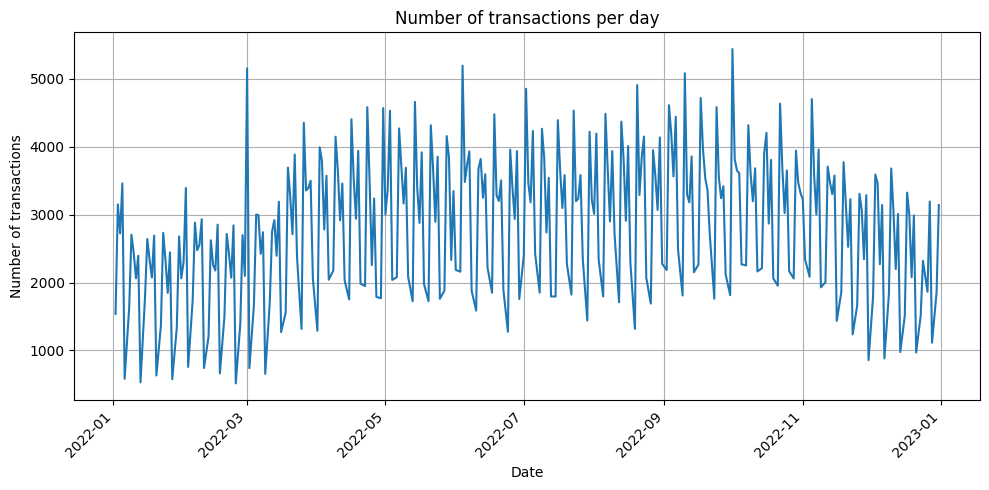

In [42]:
# daily sales

df.groupby('Date').size().plot(figsize=(10, 5), title='Number of transactions per day', fontsize=plots_Title_fontSize)
plt.xlabel('Date', fontsize=subPlots_xAxis_fontSize)
plt.ylabel('Number of transactions', fontsize=subPlots_yAxis_fontSize)
plt.xticks(rotation=45, fontsize=subPlots_xAxis_fontSize)
plt.yticks(fontsize=subPlots_yAxis_fontSize)
plt.grid()
plt.tight_layout()
plt.show()

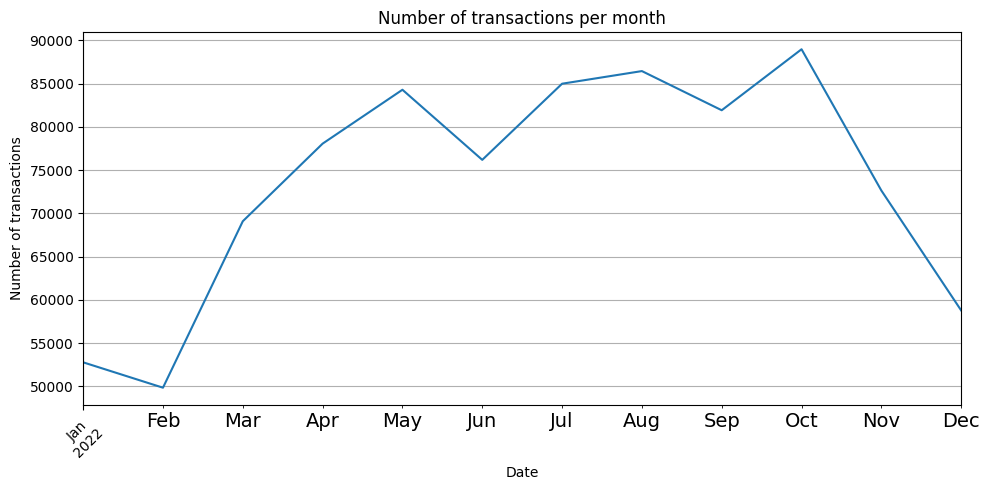

In [43]:
# monthly sales

df.groupby(df['Date'].dt.to_period('M')).size().plot(figsize=(10, 5), title='Number of transactions per month', fontsize=plots_Title_fontSize)
plt.xlabel('Date', fontsize=subPlots_xAxis_fontSize)
plt.ylabel('Number of transactions', fontsize=subPlots_yAxis_fontSize)
plt.xticks(rotation=45, fontsize=subPlots_xAxis_fontSize)
plt.yticks(fontsize=subPlots_yAxis_fontSize)
plt.grid()
plt.tight_layout()
plt.show()


In [44]:
# table with the top 10 clients, the client type and the number of transactions

top10_clients = df.groupby('Client ID').size().sort_values(ascending=False).head(10)
top10_clients_ids = top10_clients.index

top10_clients_df = df[df['Client ID'].isin(top10_clients_ids)][['Client ID', 'ID Client Type']].drop_duplicates()

top10_clients_df['Number of transactions'] = top10_clients.values

top10_clients_df



,Client ID,ID Client Type,Number of transactions
2706,210103706,NaN,13274
23054,210105096,Hotelaria,12700
23814,210104260,Hotelaria,11438
72067,210103651,Hotelaria,9497
111302,210104277,NaN,8674
114295,210103678,Hotelaria,7731
127277,210103141,Hotelaria,7212
129127,210106090,Hotelaria,6562
151621,210103361,Hotelaria,6524
152732,210105456,Hotelaria,5889


In [45]:
# assuming a client would not make multiple orders in the same day, let's see the clients that have the most orders
# while this may not be 100% accurate, it should provide a good approximation of the clients that are making the most orders and the type of client they are

top10_orders = df.groupby(['Client ID', 'Date']).size().reset_index(name='Number of transactions').groupby('Client ID').size().sort_values(ascending=False).head(10)
top10_orders_ids = top10_orders.index

top10_orders_df = df[df['Client ID'].isin(top10_orders_ids)][['Client ID', 'ID Client Type']].drop_duplicates()
top10_orders_df['Number of transactions'] = top10_orders.values

top10_orders_df 

,Client ID,ID Client Type,Number of transactions
978,210105362,NaN,286
1217,210105769,NaN,275
1400,210105969,Coletiva/Instituição/Cantina,238
1744,210101588,Restaurante - Cozinha Portuguesa,207
2456,210103056,NaN,204
2588,210103577,NaN,202
2706,210103706,NaN,200
3485,210105057,NaN,197
10053,210105591,Catering,177
56965,210105149,Restaurante - Cozinha Portuguesa,175


<Axes: title={'center': 'Top 10 ZIP Codes with the most clients'}, xlabel='ZIP Code'>

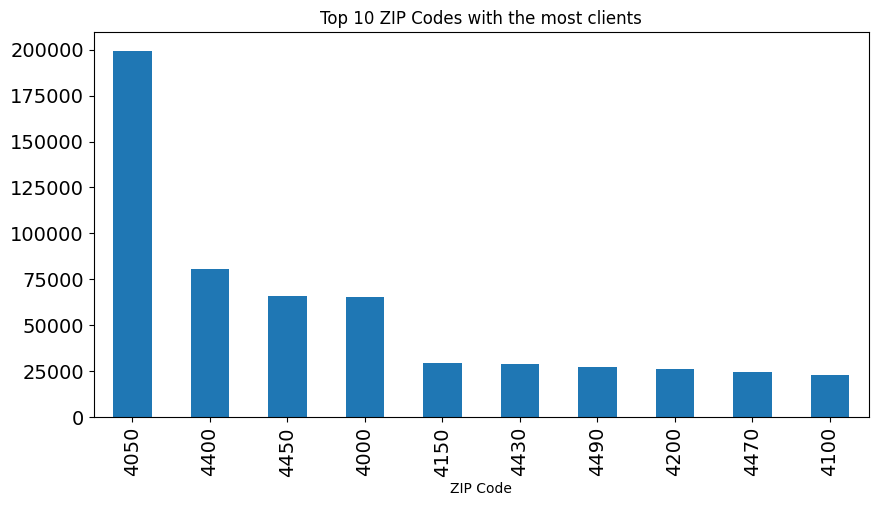

In [46]:
# checking the most common ZIP codes
# the biggest clients all appear to be from the Porto, Braga and Viana do Castelo regions

df['ZIP Code'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 ZIP Codes with the most clients', fontsize=plots_Title_fontSize)

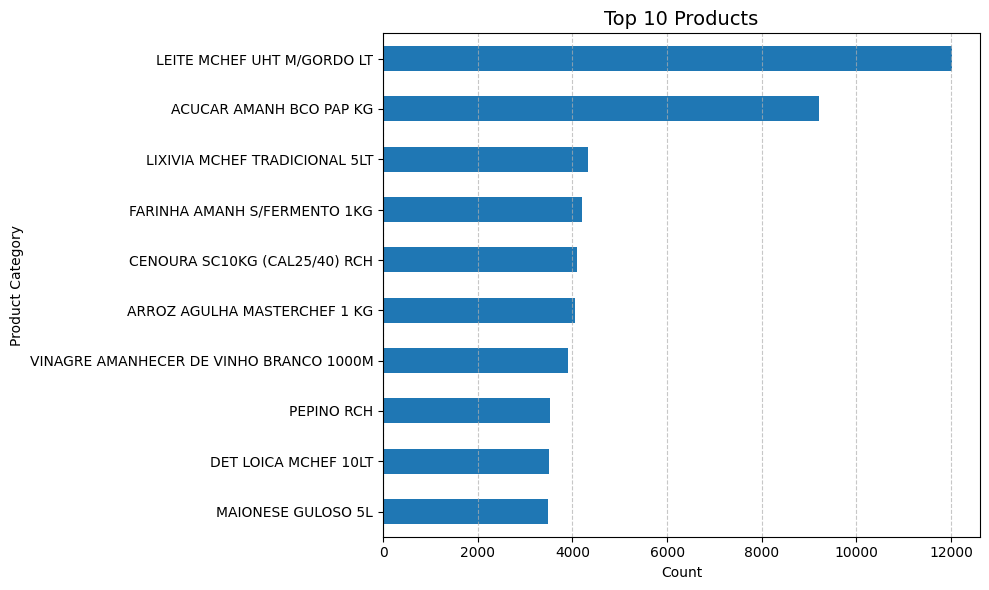

In [47]:
# Top 10 products sold

df['Product Description'].value_counts().head(10).iloc[::-1].plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Products', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Count', fontsize=subPlots_xAxis_fontSize)
plt.ylabel('Product Category', fontsize=subPlots_yAxis_fontSize)
plt.xticks(fontsize=subPlots_xAxis_fontSize)
plt.yticks(fontsize=subPlots_yAxis_fontSize)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
cmap = matplotlib.cm.Reds
mini = min(complete_orders['department'].value_counts())
maxi = max(complete_orders['department'].value_counts())
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in complete_orders['department'].value_counts()]



plt.figure(figsize=(10, 6))
squarify.plot(sizes=complete_orders['department'].value_counts(), label=complete_orders['department'].value_counts().index, color=colors);
plt.title('Sales by department', fontsize=20)
plt.axis('off');
plt.tight_layout()

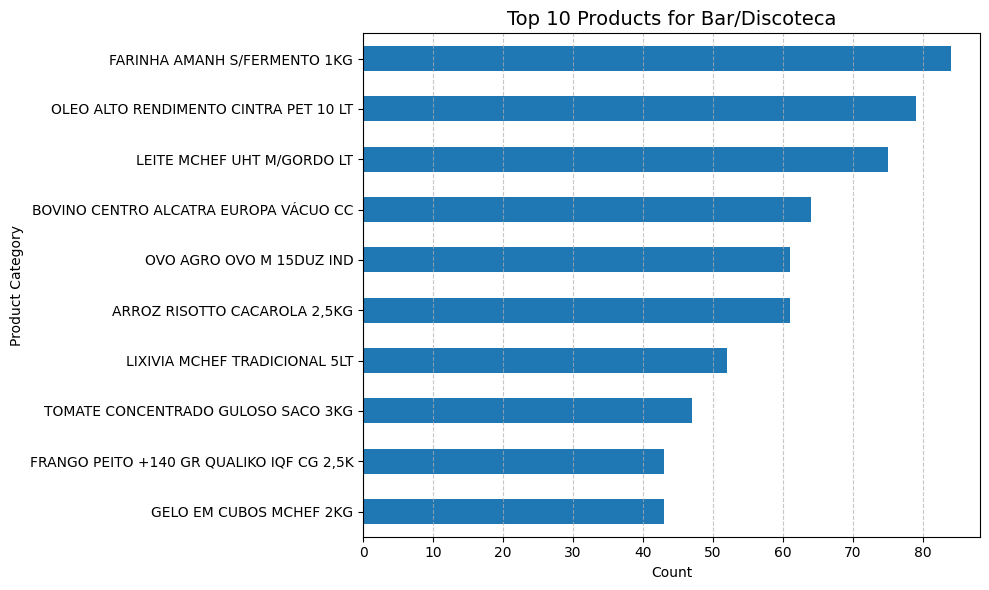

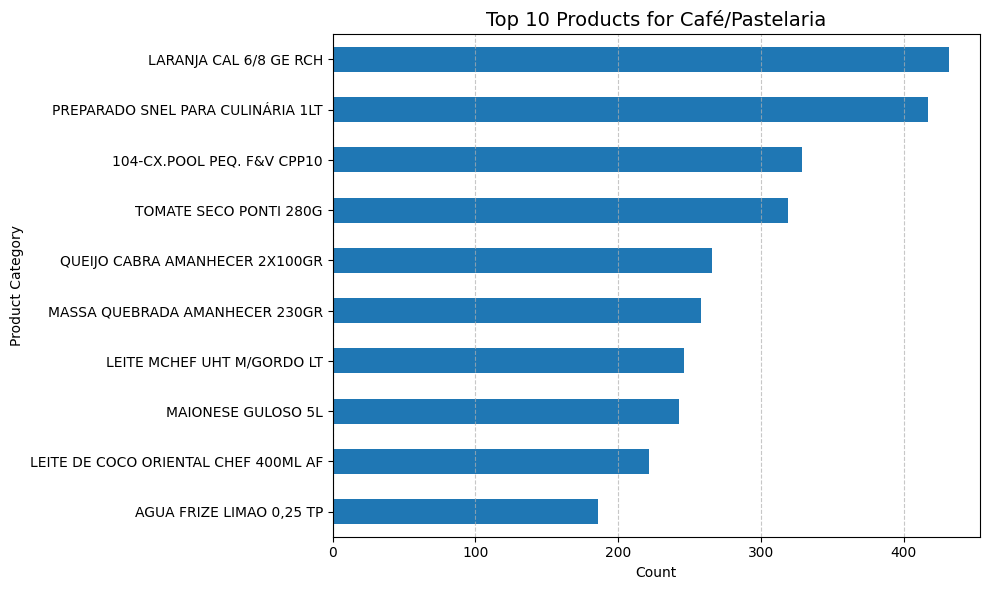

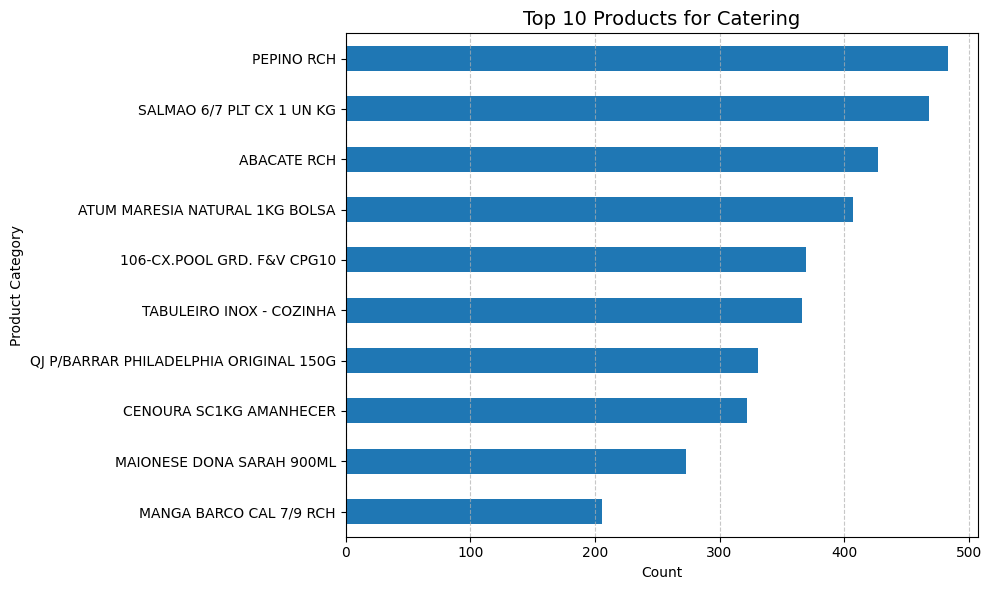

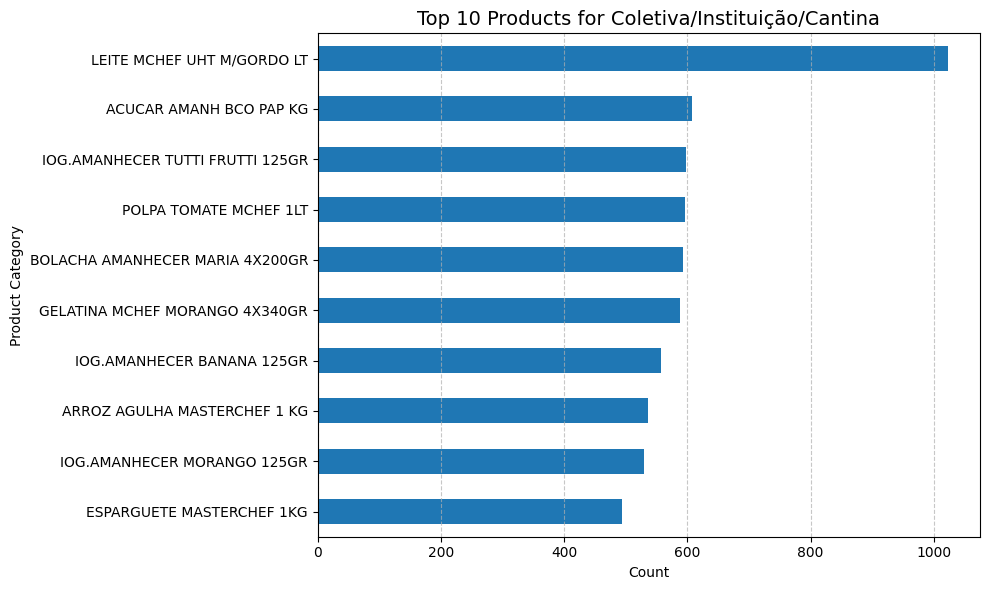

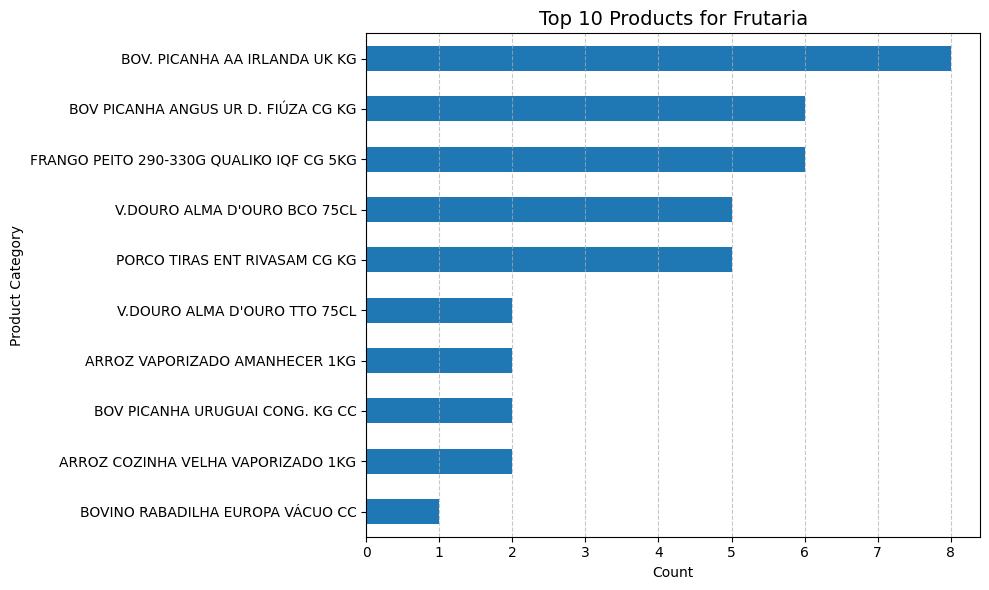

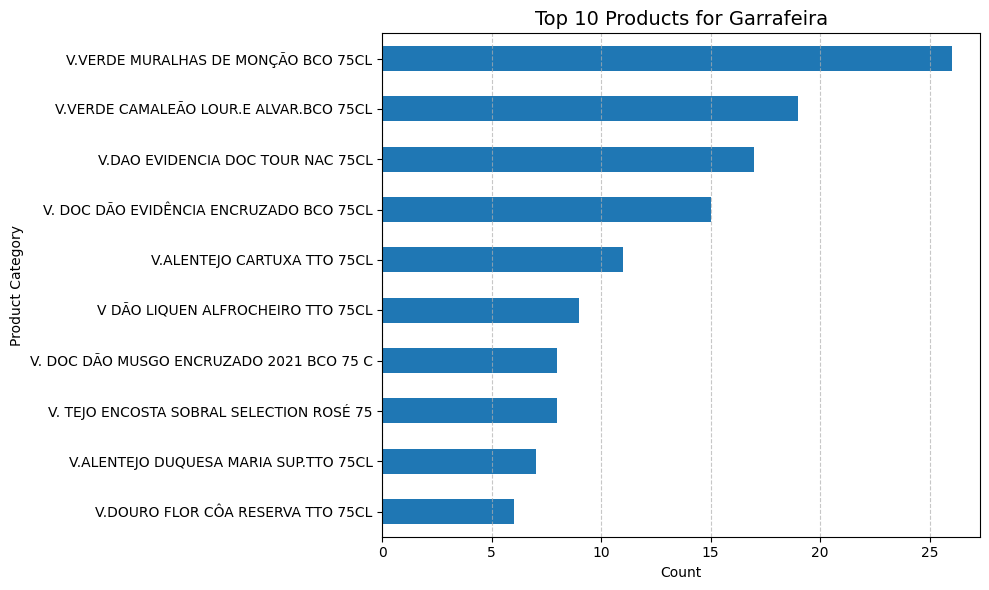

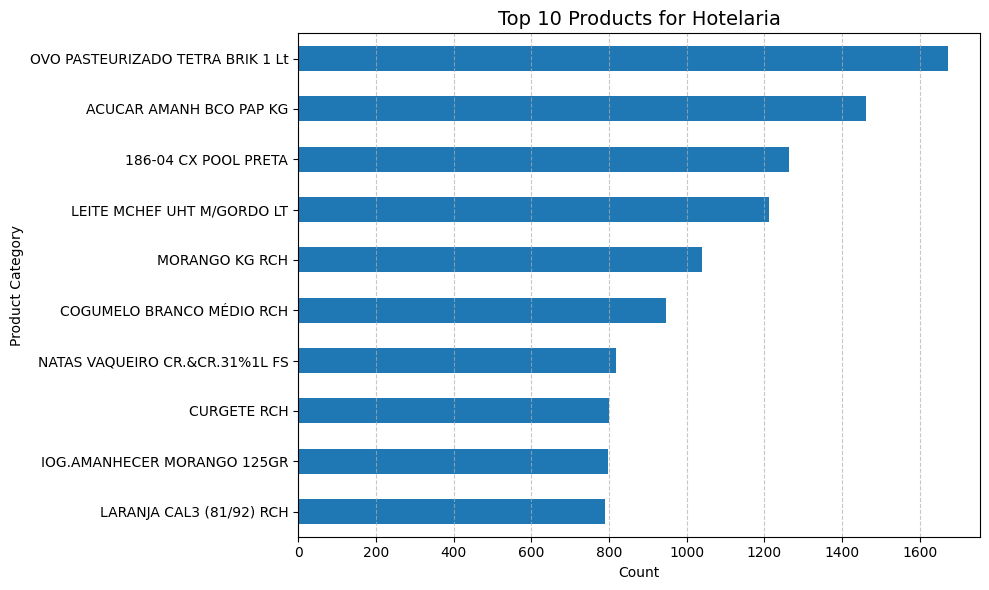

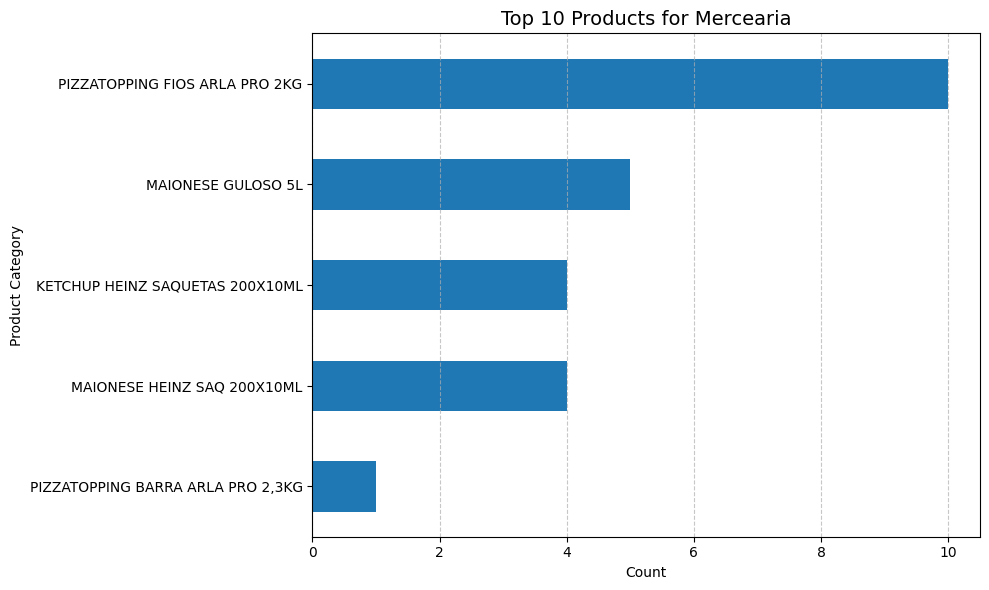

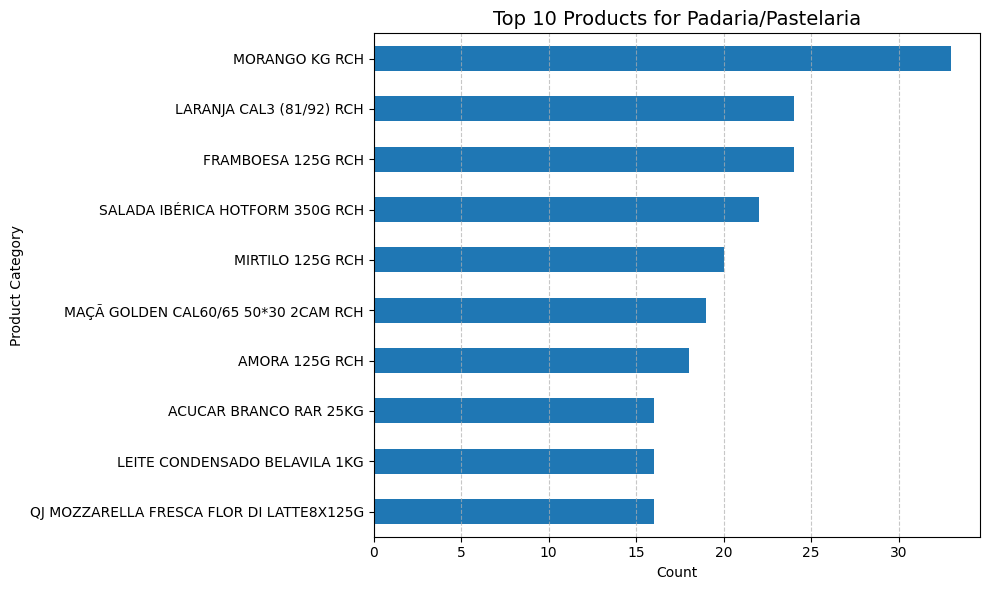

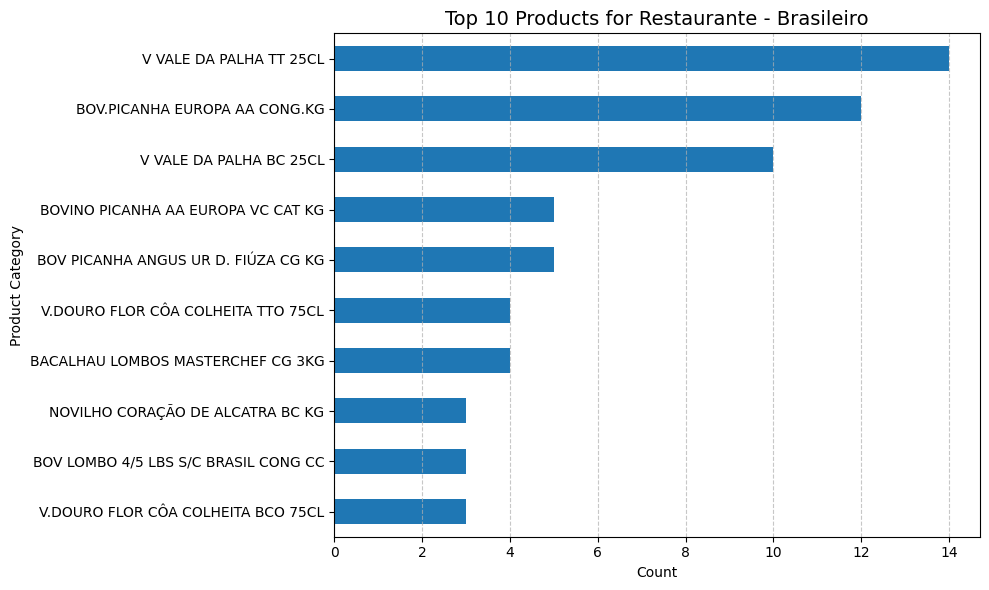

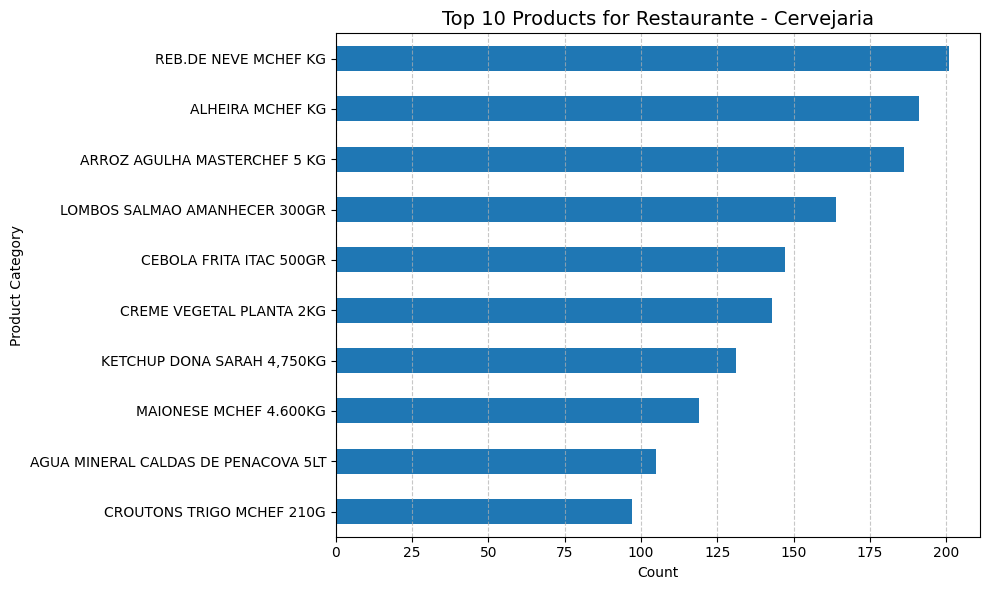

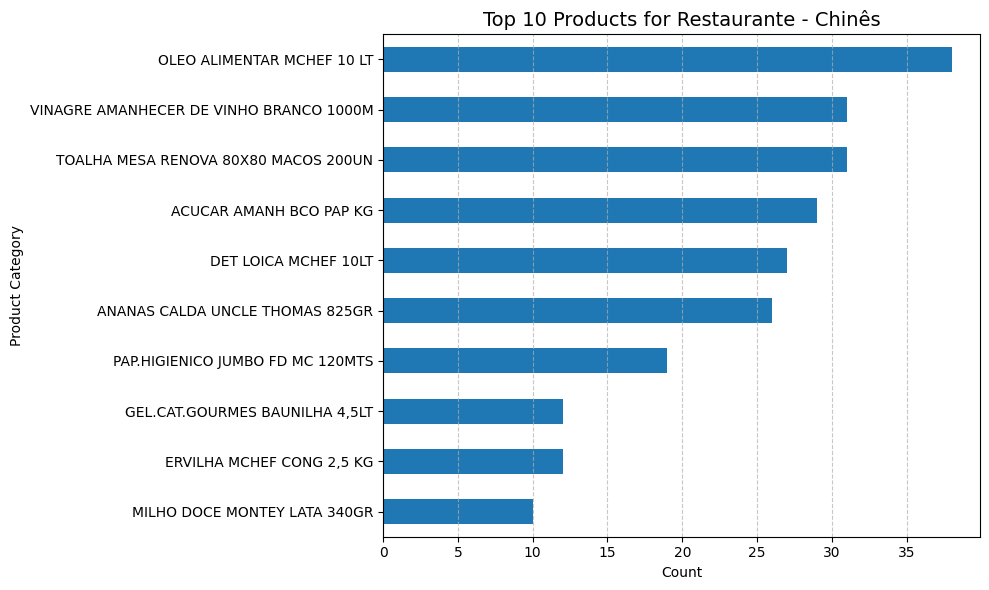

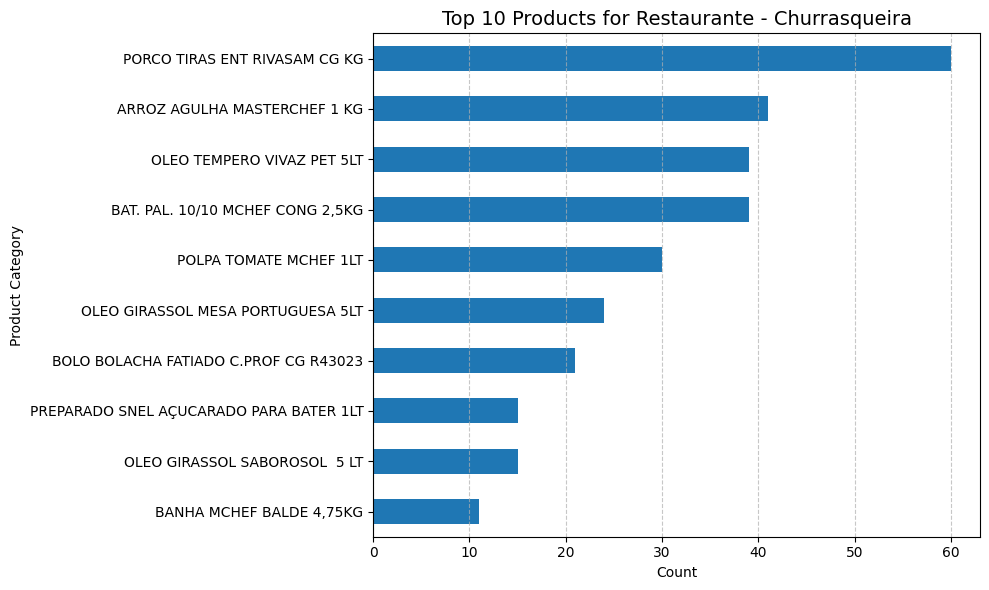

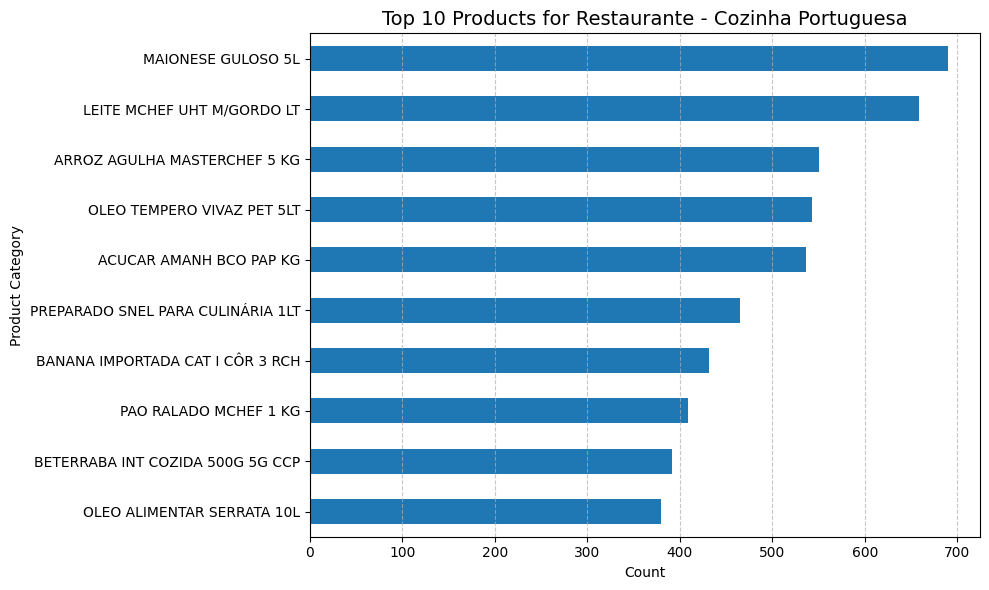

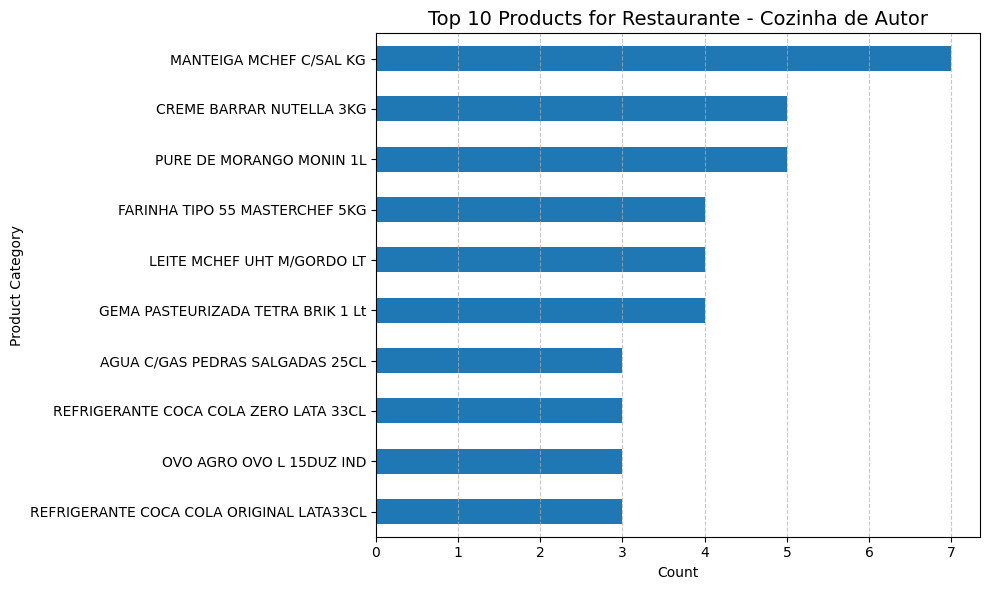

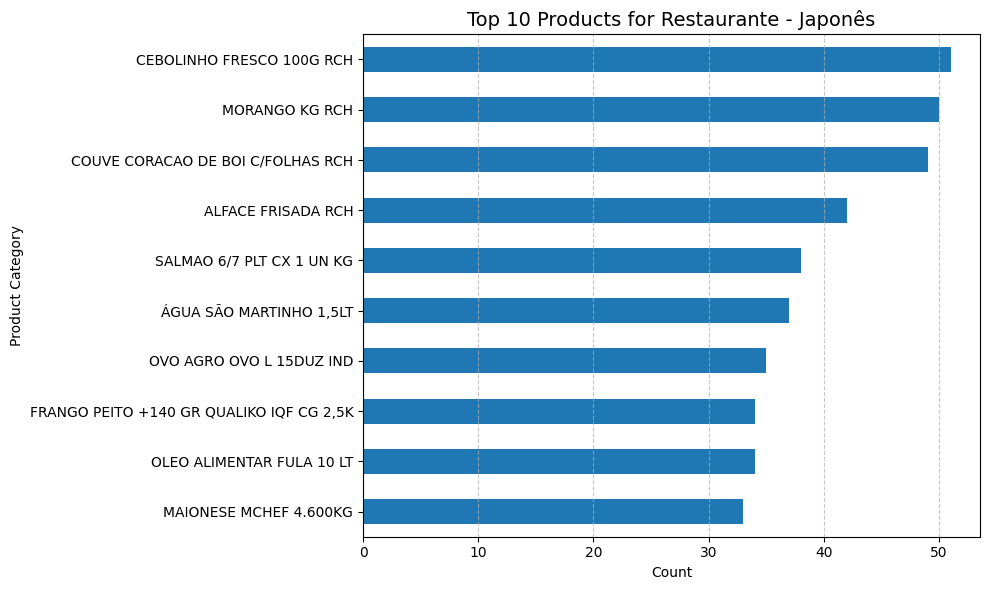

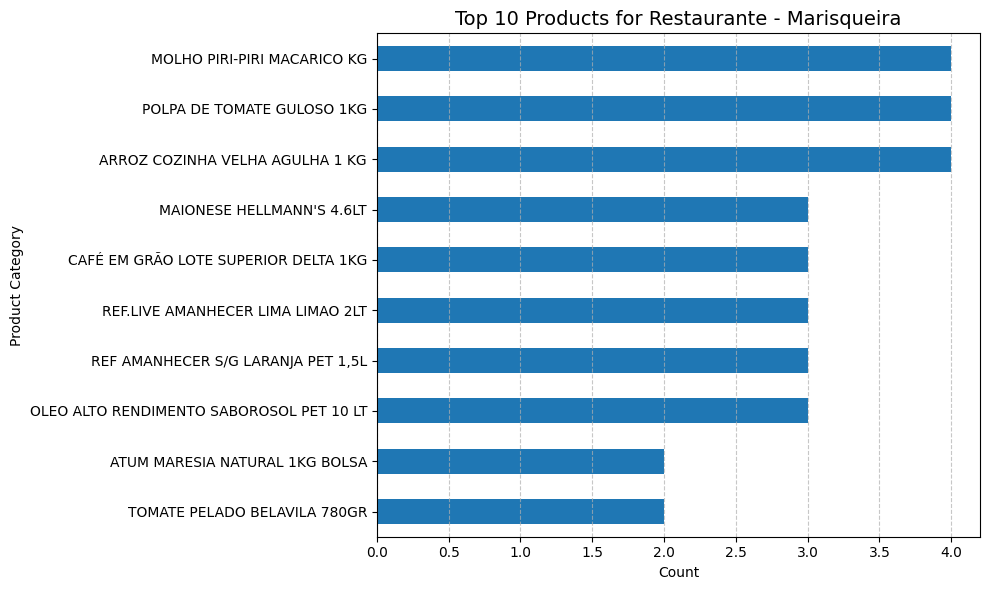

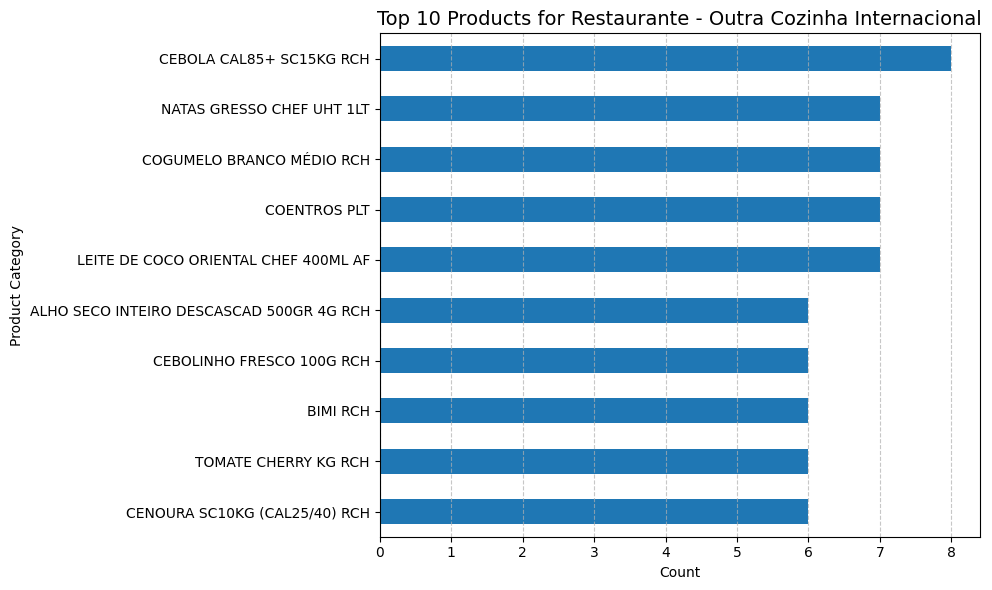

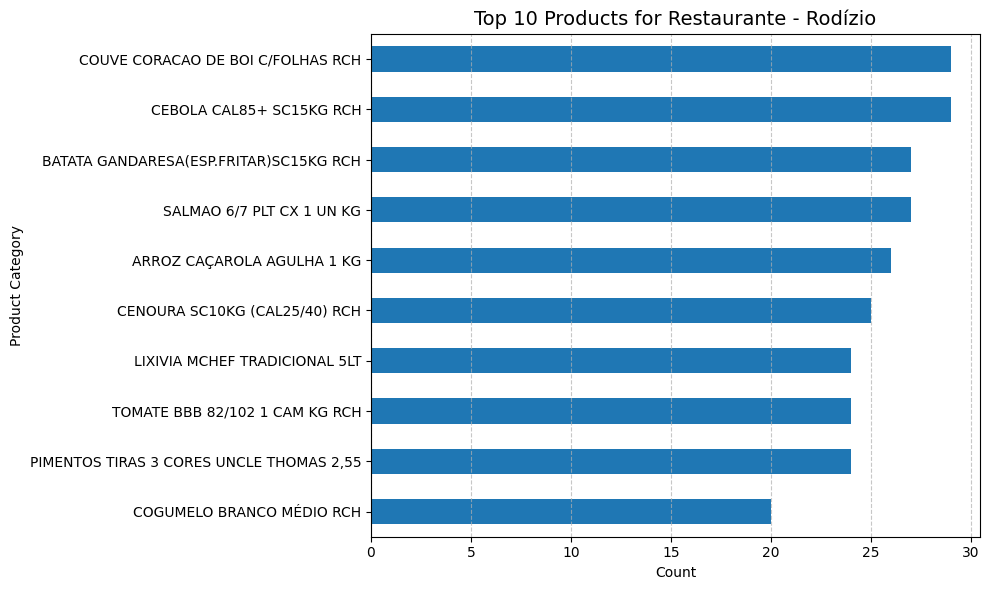

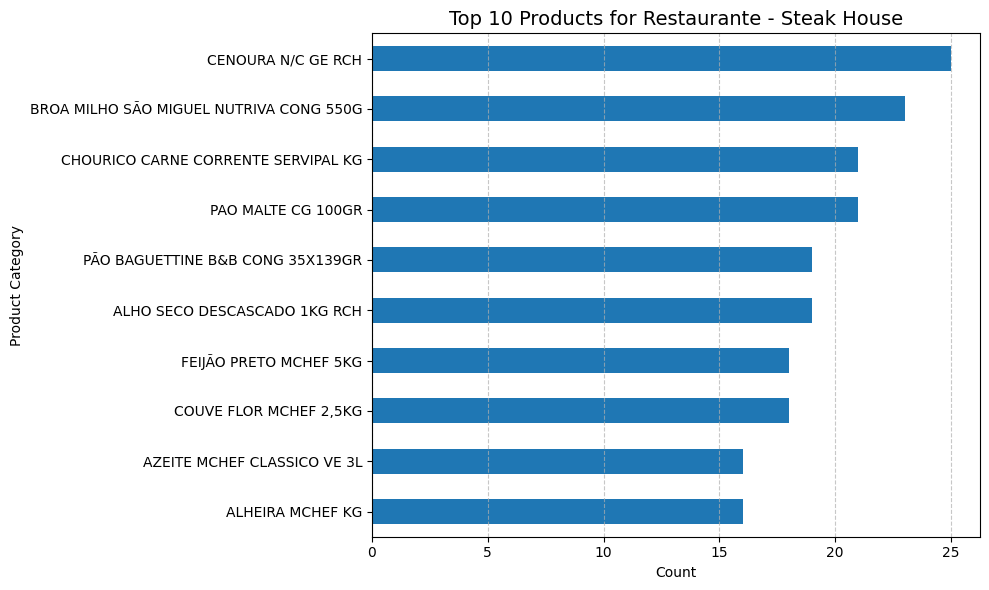

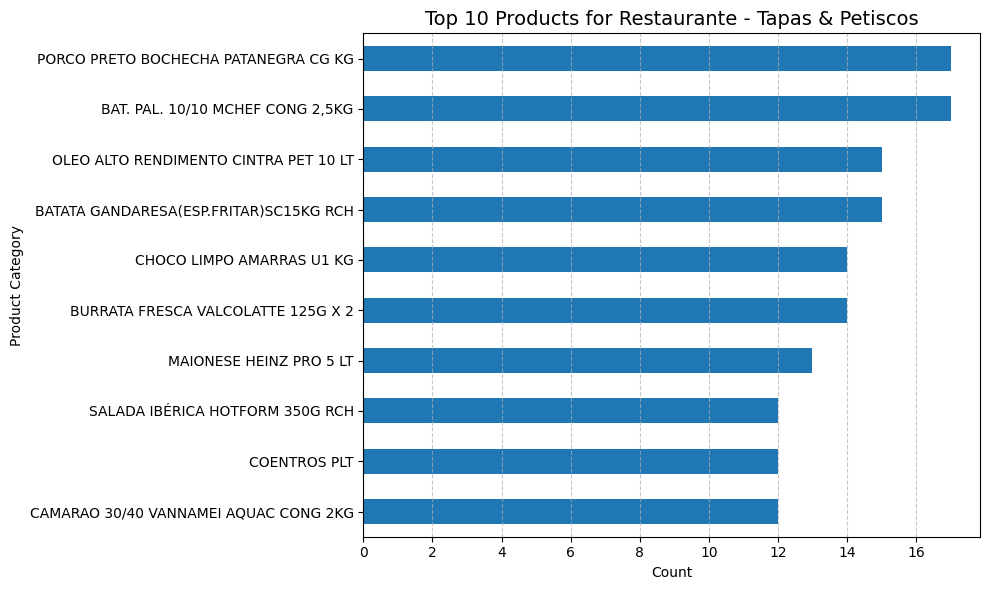

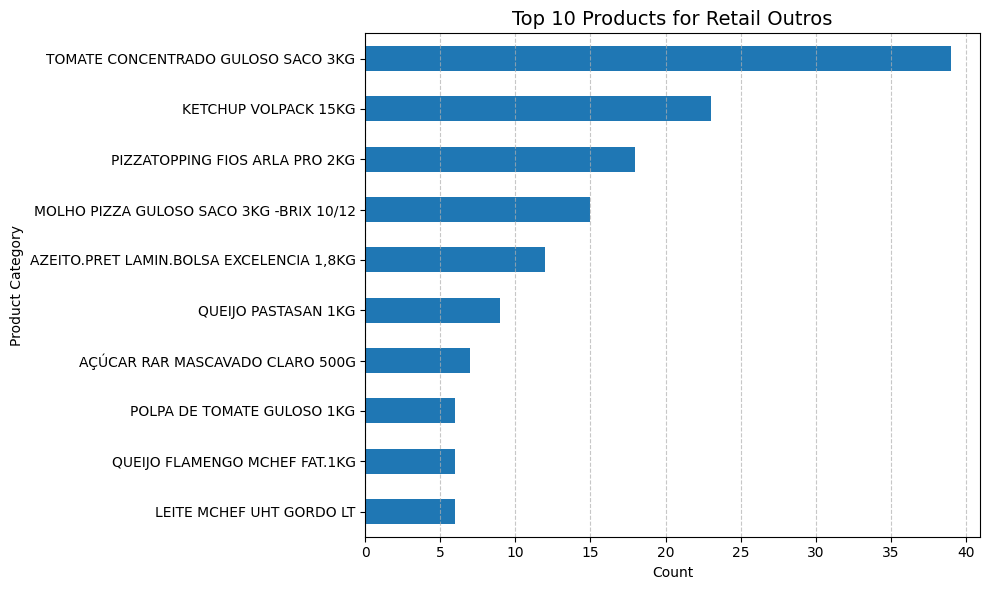

In [48]:
# we now want to see the top 10 products sold for each client type

for i, group in df.groupby('ID Client Type'):
    plt.figure(figsize=(10, 6))
    group['Product Description'].value_counts().head(10).iloc[::-1].plot(kind='barh')
    plt.title(f'Top 10 Products for {i}', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
    plt.xlabel('Count', fontsize=subPlots_xAxis_fontSize)
    plt.ylabel('Product Category', fontsize=subPlots_yAxis_fontSize)
    plt.xticks(fontsize=subPlots_xAxis_fontSize)
    plt.yticks(fontsize=subPlots_yAxis_fontSize)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

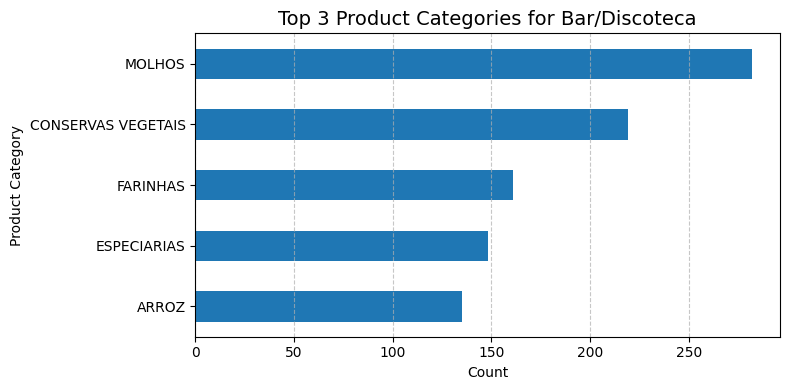

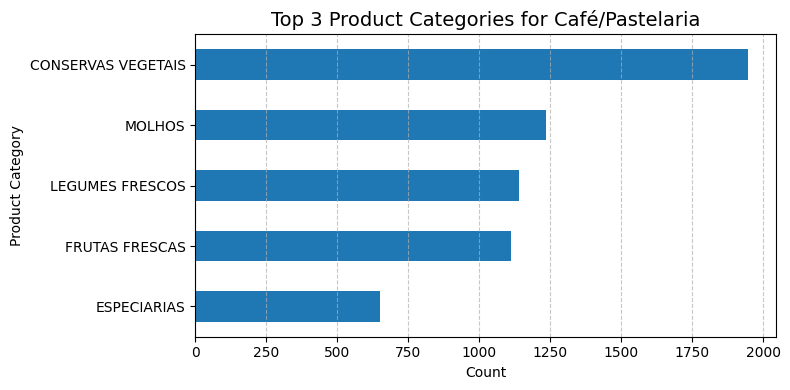

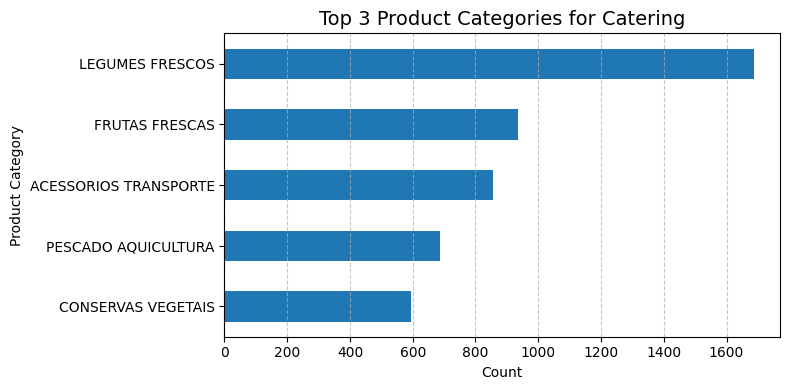

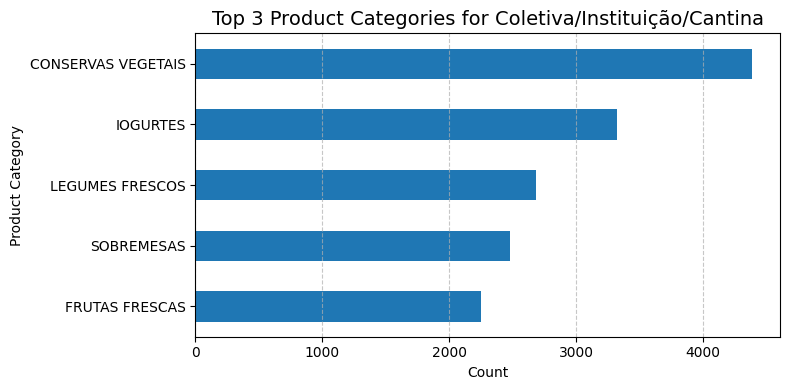

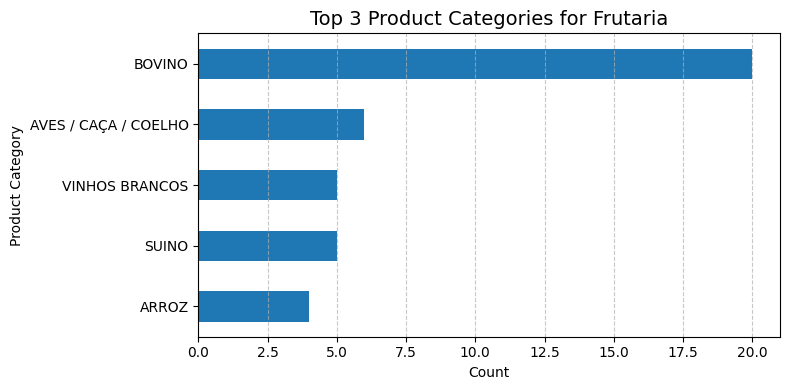

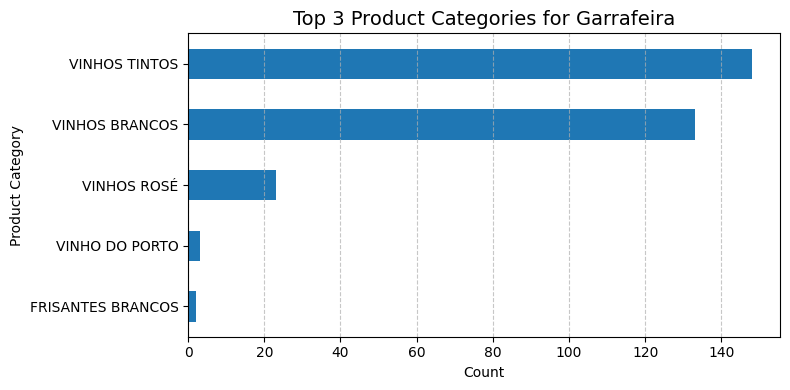

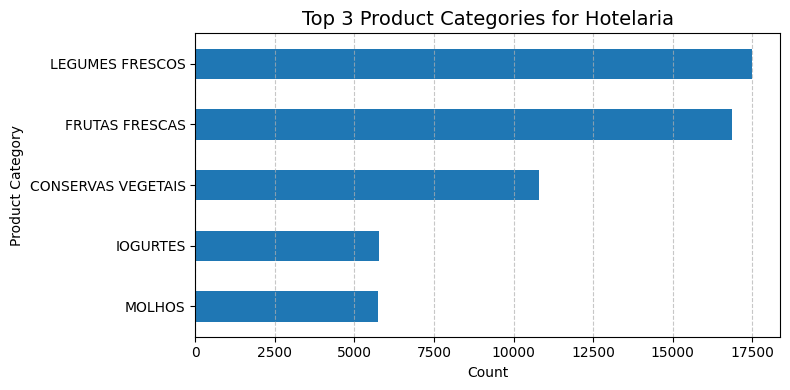

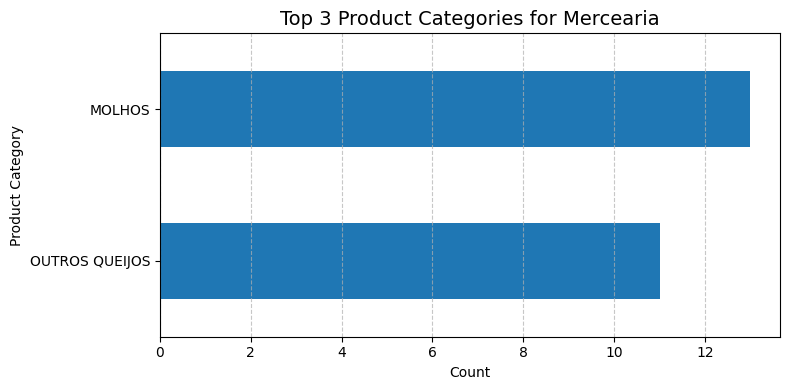

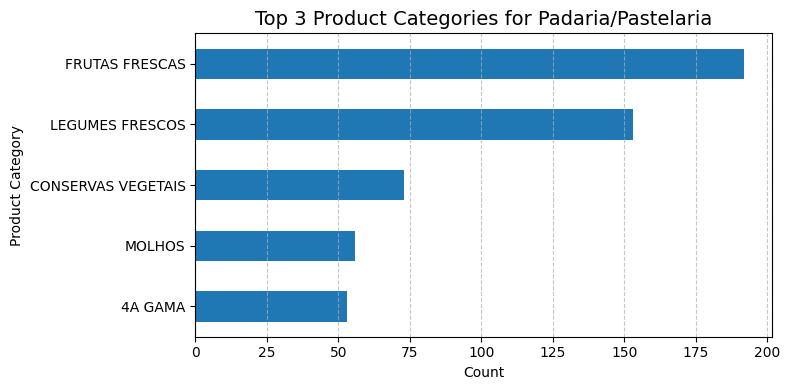

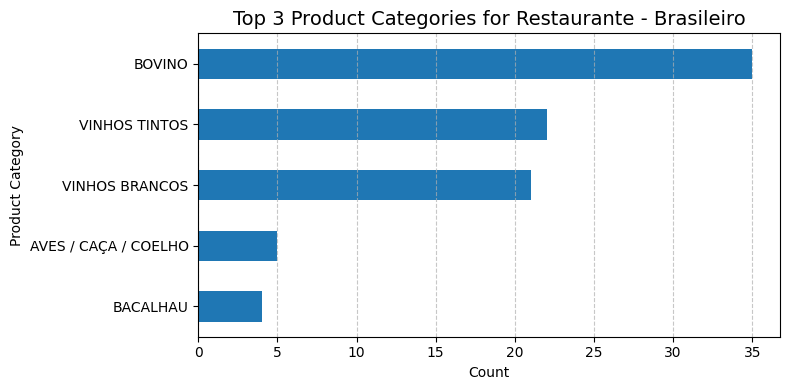

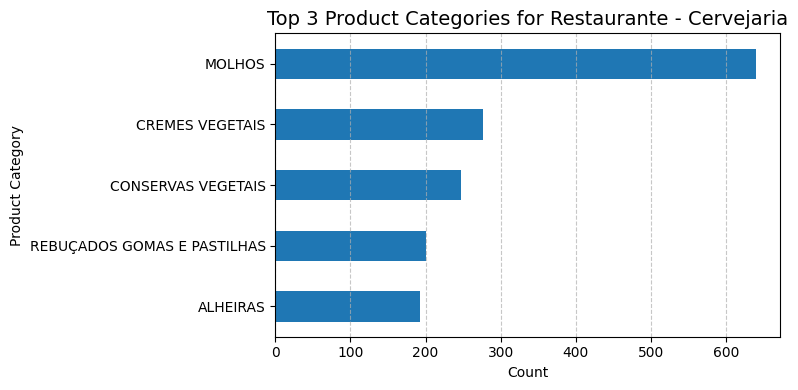

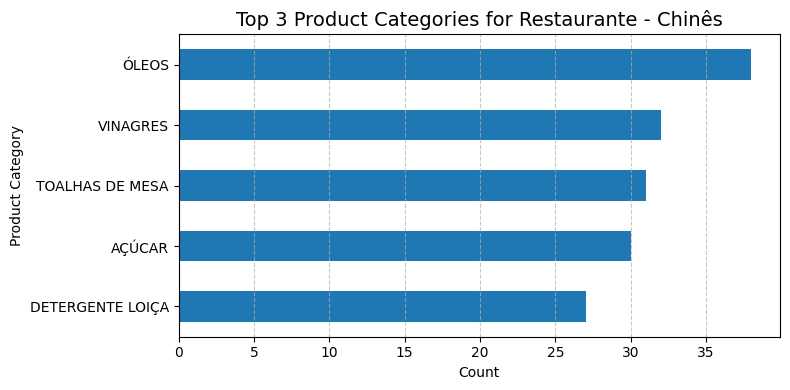

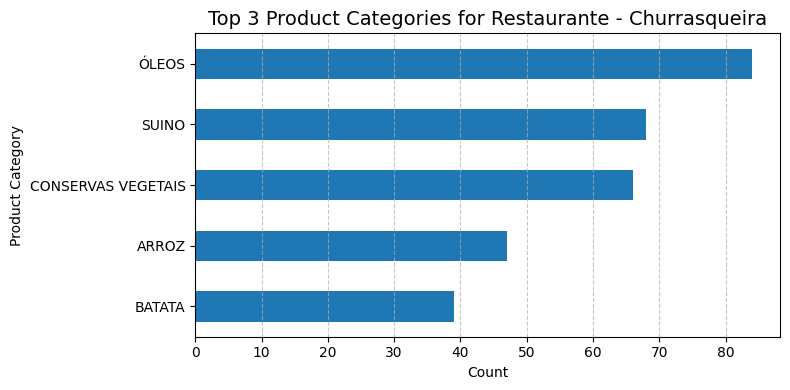

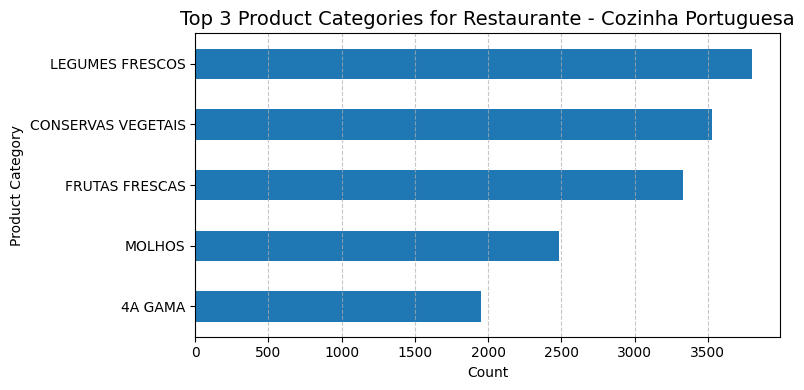

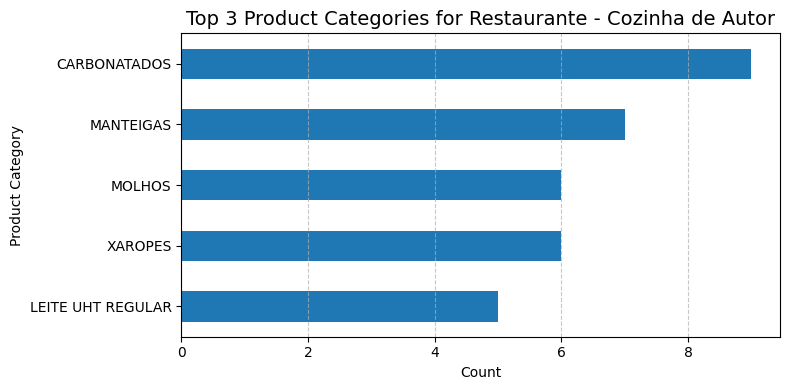

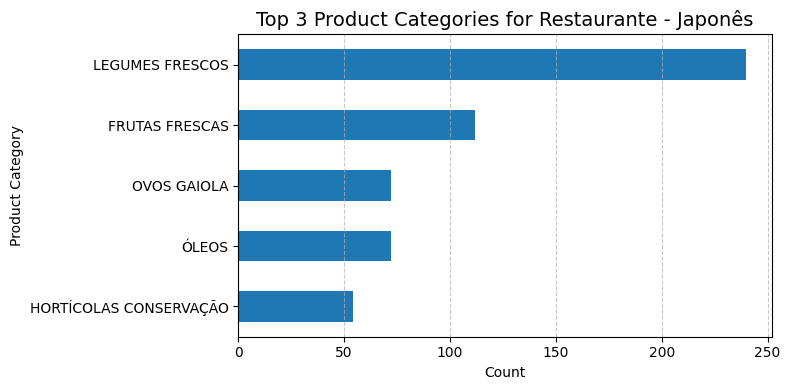

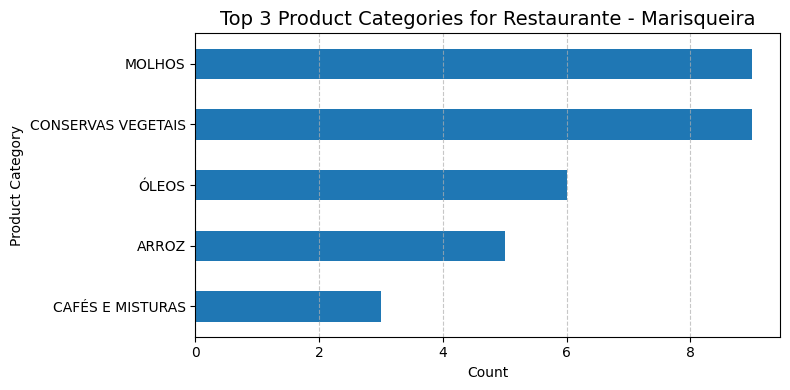

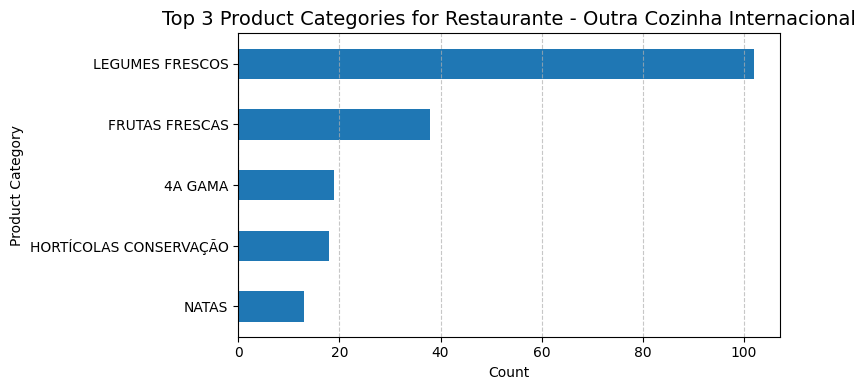

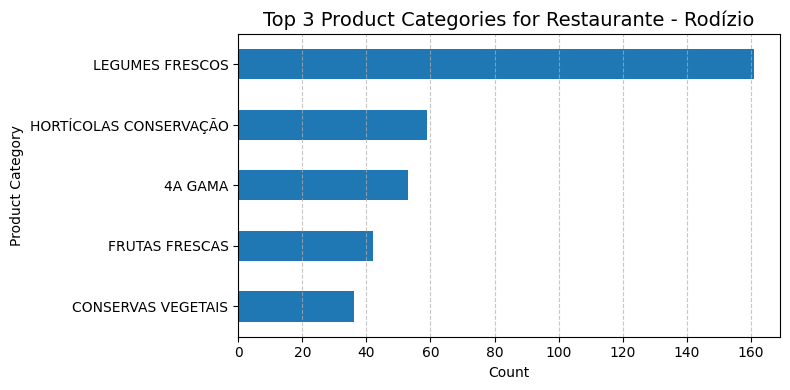

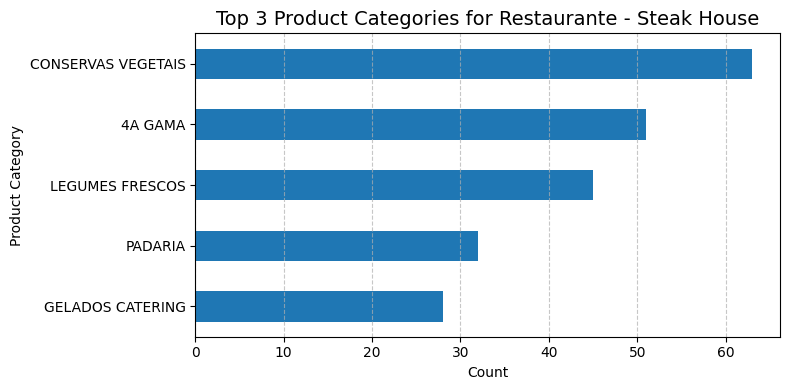

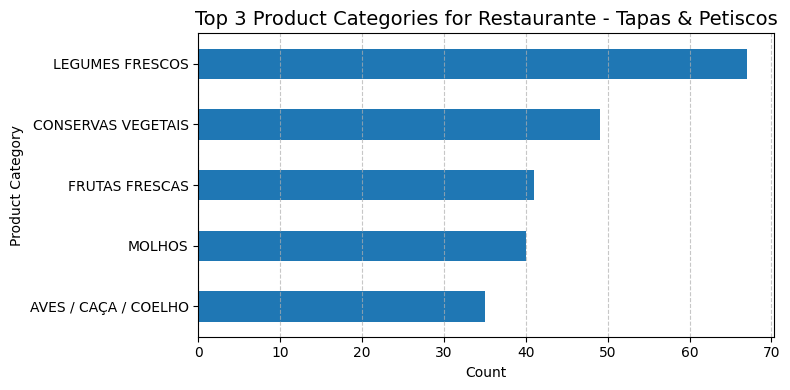

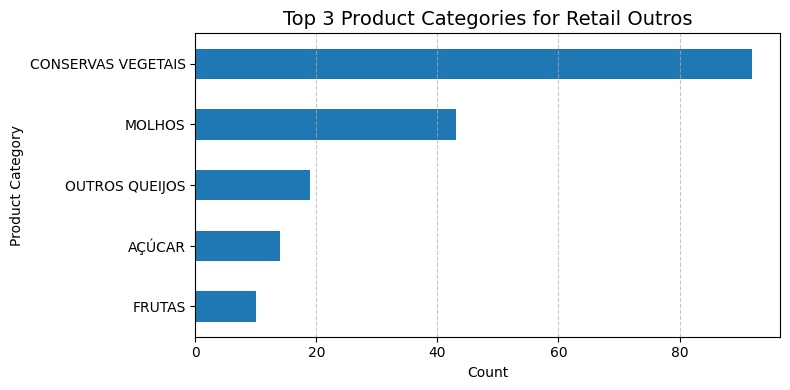

In [49]:
# Now we will see the top 5 product categories sold for each client type

for i, group in df.groupby('ID Client Type'):
    plt.figure(figsize=(8, 4))
    group['ID Product Category'].value_counts().head(5).iloc[::-1].plot(kind='barh')
    plt.title(f'Top 3 Product Categories for {i}', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
    plt.xlabel('Count', fontsize=subPlots_xAxis_fontSize)
    plt.ylabel('Product Category', fontsize=subPlots_yAxis_fontSize)
    plt.xticks(fontsize=subPlots_xAxis_fontSize)
    plt.yticks(fontsize=subPlots_yAxis_fontSize)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Insights

- Some products look weird, like frutaria's top products being meats

- The client type does not seem very reliable

<hr>
<a class="anchor" id="export">

## 3. Export
</a>

We will keep 3 datasets for the rest of our analysis: <br>

- *clients_with_transactions*: client list with only the clients that have made purchases 

- *clients_without_transactions*: client list with only the clients without purchases

- *df*: dataframe with the transactions data, after merging the client and product data

In [130]:
clients_without_transactions = clients[clients['Client ID'].isin(missing_clients)]

clients_with_transactions = clients[~clients['Client ID'].isin(missing_clients)]

In [132]:
clients_with_transactions.to_csv('../Data/clients_with_transactions.csv', index=False)
clients_without_transactions.to_csv('../Data/clients_without_transactions.csv', index=False)
df.to_csv('../Data/df.csv', index=False)